In [3]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[16,16,16,16,16,16] # sliding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccX,AccY,AccZ' # Axis
PathAxis='AccXYZ'

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [4]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [5]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [6]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [7]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [8]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [9]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15914
SourceData's aborting data = 6
window shape is (15914, 128, 3)
(15914, 128, 3)
hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.2306 - val_loss: 0.1764
Epoch 2/50
0s - loss: 0.1348 - val_loss: 0.1003
Epoch 3/50
0s - loss: 0.0793 - val_loss: 0.0633
Epoch 4/50
0s - loss: 0.0541 - val_loss: 0.0468
Epoch 5/50
0s - loss: 0.0421 - val_loss: 0.0381
Epoch 6/50
0s - loss: 0.0353 - val_loss: 0.0328
Epoch 7/50
0s - loss: 0.0309 - val_loss: 0.0292
Epoch 8/50
0s - loss: 0.0278 - val_loss: 0.0266
Epoch 9/50
0s - loss: 0.0256 - val_loss: 0.0248
Epoch 10/50
0s - loss: 0.0240 - val_loss: 0.0233
Epoch 11/50
0s - loss: 0.0228 - val_loss: 0.0222
Epoch 12/50
0s - loss: 0.0218 - val_loss: 0.0213
Epoch 13/50
0s - loss: 0.0209 - val_loss: 0.0206
Epoch 14/50
0s - loss: 0.0203 - val_loss: 0.0200
Epoch 15/50
0s - loss: 0.0197 - val_loss: 0.0194
Epoch 16/50
0s 

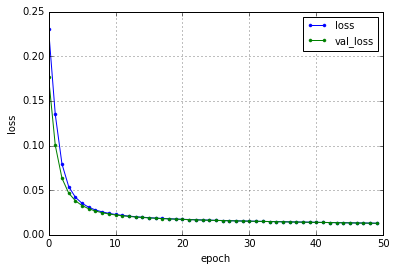

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.4847 - val_loss: 0.2028
Epoch 2/50
0s - loss: 0.1146 - val_loss: 0.0684
Epoch 3/50
0s - loss: 0.0549 - val_loss: 0.0460
Epoch 4/50
0s - loss: 0.0411 - val_loss: 0.0371
Epoch 5/50
0s - loss: 0.0344 - val_loss: 0.0320
Epoch 6/50
0s - loss: 0.0303 - val_loss: 0.0287
Epoch 7/50
0s - loss: 0.0275 - val_loss: 0.0263
Epoch 8/50
0s - loss: 0.0254 - val_loss: 0.0245
Epoch 9/50
0s - loss: 0.0237 - val_loss: 0.0230
Epoch 10/50
0s - loss: 0.0224 - val_loss: 0.0219
Epoch 11/50
0s - loss: 0.0214 - val_loss: 0.0209
Epoch 12/50
0s - loss: 0.0205 - val_loss: 0.0201
Epoch 13/50
0s - loss: 0.0197 - val_loss: 0.0194
Epoch 14/50
0s - loss: 0.0191 - val_loss: 0.0188
Epoch 15/50
0s - loss: 0.0186 - val_loss: 0.0183
Epoch 16/50
0s - loss: 0.0181 - val_loss: 0.0178
Epoch 17/50
0s - loss: 0.0176 - val_loss: 0.0174
Epoch 18/50
0s - loss: 0.0173 - val_loss: 0.0171
Epoch 19/50
0s - loss: 0.0169 - val_loss: 0.0168
Epoch 20/50


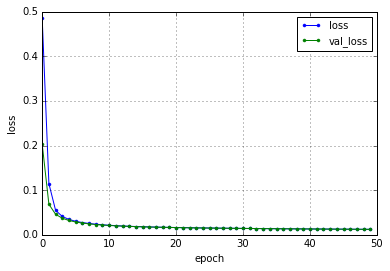

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0880 - val_loss: 0.0773
Epoch 2/50
1s - loss: 0.0696 - val_loss: 0.0625
Epoch 3/50
1s - loss: 0.0562 - val_loss: 0.0502
Epoch 4/50
1s - loss: 0.0448 - val_loss: 0.0397
Epoch 5/50
1s - loss: 0.0353 - val_loss: 0.0314
Epoch 6/50
1s - loss: 0.0282 - val_loss: 0.0253
Epoch 7/50
1s - loss: 0.0232 - val_loss: 0.0212
Epoch 8/50
1s - loss: 0.0198 - val_loss: 0.0185
Epoch 9/50
1s - loss: 0.0175 - val_loss: 0.0167
Epoch 10/50
1s - loss: 0.0160 - val_loss: 0.0154
Epoch 11/50
1s - loss: 0.0149 - val_loss: 0.0145
Epoch 12/50
1s - loss: 0.0141 - val_loss: 0.0138
Epoch 13/50
1s - loss: 0.0135 - val_loss: 0.0132
Epoch 14/50
1s - loss: 0.0130 - val_loss: 0.0127
Epoch 15/50
1s - loss: 0.0125 - val_loss: 0.0123
Epoch 16/50
1s - loss: 0.0121 - val_loss: 0.0120
Epoch 17/50
1s - loss: 0.0118 - val_loss: 0.0117
Epoch 18/50
1s - loss: 0.0115 - val_loss: 0.0114
Epoch 19/50
1s - loss: 0.0112 - val_loss: 0.0111
Epoch 20/50


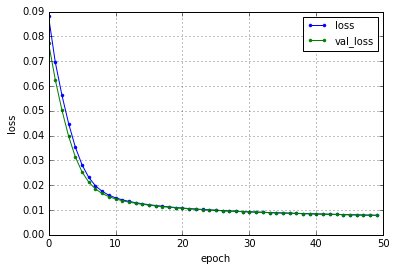

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0535 - val_loss: 0.0136
Epoch 2/50
1s - loss: 0.0103 - val_loss: 0.0078
Epoch 3/50
1s - loss: 0.0065 - val_loss: 0.0056
Epoch 4/50
1s - loss: 0.0051 - val_loss: 0.0047
Epoch 5/50
1s - loss: 0.0044 - val_loss: 0.0039
Epoch 6/50
1s - loss: 0.0039 - val_loss: 0.0034
Epoch 7/50
1s - loss: 0.0035 - val_loss: 0.0031
Epoch 8/50
1s - loss: 0.0033 - val_loss: 0.0030
Epoch 9/50
1s - loss: 0.0030 - val_loss: 0.0026
Epoch 10/50
1s - loss: 0.0027 - val_loss: 0.0024
Epoch 11/50
1s - loss: 0.0026 - val_loss: 0.0022
Epoch 12/50
1s - loss: 0.0024 - val_loss: 0.0020
Epoch 13/50
1s - loss: 0.0023 - val_loss: 0.0025
Epoch 14/50
2s - loss: 0.0022 - val_loss: 0.0019
Epoch 15/50
1s - loss: 0.0021 - val_loss: 0.0017
Epoch 16/50
1s - loss: 0.0019 - val_loss: 0.0025
Epoch 17/50
1s - loss: 0.0018 - val_loss: 0.0015
Epoch 18/50
1s - loss: 0.0018 - val_loss: 0.0014
Epoch 19/50
1s - loss: 0.0017 - val_loss: 0.0014
Epoch 20/50


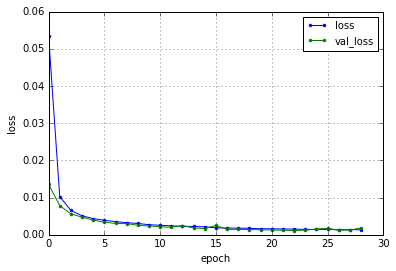

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.1141 - val_loss: 0.0154
Epoch 2/50
1s - loss: 0.0143 - val_loss: 0.0118
Epoch 3/50
2s - loss: 0.0104 - val_loss: 0.0085
Epoch 4/50
2s - loss: 0.0074 - val_loss: 0.0056
Epoch 5/50
2s - loss: 0.0060 - val_loss: 0.0092
Epoch 6/50
2s - loss: 0.0060 - val_loss: 0.0042
Epoch 7/50
2s - loss: 0.0056 - val_loss: 0.0067
Epoch 8/50
2s - loss: 0.0058 - val_loss: 0.0054
Epoch 9/50
1s - loss: 0.0048 - val_loss: 0.0033
Epoch 10/50
1s - loss: 0.0048 - val_loss: 0.0033
Epoch 11/50
2s - loss: 0.0046 - val_loss: 0.0033
Epoch 12/50
1s - loss: 0.0046 - val_loss: 0.0108
Epoch 13/50
1s - loss: 0.0042 - val_loss: 0.0034
Epoch 14/50
2s - loss: 0.0043 - val_loss: 0.0111
Epoch 15/50
2s - loss: 0.0040 - val_loss: 0.0026
Epoch 16/50
2s - loss: 0.0039 - val_loss: 0.0057
Epoch 17/50
2s - loss: 0.0038 - val_loss: 0.0039
Epoch 18/50
1s - loss: 0.0041 - val_loss: 0.0039
Epoch 19/50
2s - loss: 0.0036 - val_loss: 0.0022
Epoch 20/50


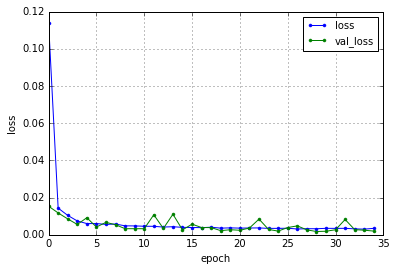

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0187 - val_loss: 0.0066
Epoch 2/50
1s - loss: 0.0048 - val_loss: 0.0038
Epoch 3/50
1s - loss: 0.0034 - val_loss: 0.0031
Epoch 4/50
1s - loss: 0.0028 - val_loss: 0.0026
Epoch 5/50
1s - loss: 0.0024 - val_loss: 0.0023
Epoch 6/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 7/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 8/50
1s - loss: 0.0018 - val_loss: 0.0018
Epoch 9/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 10/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 11/50
1s - loss: 0.0015 - val_loss: 0.0020
Epoch 12/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 13/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 14/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 15/50
1s - loss: 0.0013 - val_loss: 0.0014
Epoch 16/50
1s - loss: 0.0012 - val_loss: 0.0014
Epoch 17/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 18/50
1s - loss: 0.0012 - val_loss: 0.0020
Epoch 19/50
2s - loss: 0.0011 - val_loss: 0.0011
Epoch 20/50


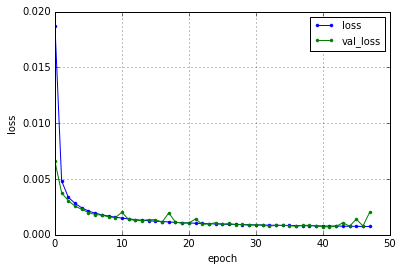

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0322 - val_loss: 0.0108
Epoch 2/50
1s - loss: 0.0083 - val_loss: 0.0068
Epoch 3/50
1s - loss: 0.0054 - val_loss: 0.0044
Epoch 4/50
1s - loss: 0.0040 - val_loss: 0.0033
Epoch 5/50
1s - loss: 0.0029 - val_loss: 0.0024
Epoch 6/50
1s - loss: 0.0020 - val_loss: 0.0017
Epoch 7/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 8/50
1s - loss: 0.0011 - val_loss: 8.4676e-04
Epoch 9/50
1s - loss: 9.1844e-04 - val_loss: 7.3463e-04
Epoch 10/50
1s - loss: 7.7310e-04 - val_loss: 7.6599e-04
Epoch 11/50
1s - loss: 6.8238e-04 - val_loss: 6.5693e-04
Epoch 12/50
2s - loss: 6.3213e-04 - val_loss: 5.9436e-04
Epoch 13/50
2s - loss: 5.7584e-04 - val_loss: 8.2284e-04
Epoch 14/50
2s - loss: 5.3602e-04 - val_loss: 5.2810e-04
Epoch 15/50
2s - loss: 5.2227e-04 - val_loss: 4.4393e-04
Epoch 16/50
2s - loss: 4.7894e-04 - val_loss: 8.2609e-04
Epoch 17/50
2s - loss: 4.7057e-04 - val_loss: 3.7335e-04
Epoch 18/50
2s - loss: 4.2968e-04 

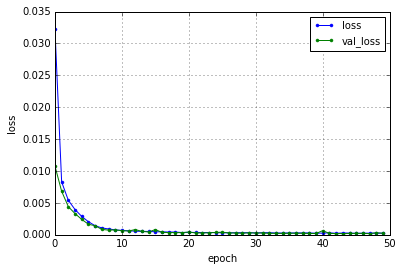

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.0536 - val_loss: 0.0148
Epoch 2/50
1s - loss: 0.0124 - val_loss: 0.0102
Epoch 3/50
1s - loss: 0.0082 - val_loss: 0.0062
Epoch 4/50
1s - loss: 0.0054 - val_loss: 0.0044
Epoch 5/50
2s - loss: 0.0039 - val_loss: 0.0030
Epoch 6/50
1s - loss: 0.0028 - val_loss: 0.0022
Epoch 7/50
1s - loss: 0.0022 - val_loss: 0.0017
Epoch 8/50
2s - loss: 0.0017 - val_loss: 0.0013
Epoch 9/50
2s - loss: 0.0014 - val_loss: 0.0012
Epoch 10/50
2s - loss: 0.0011 - val_loss: 0.0012
Epoch 11/50
2s - loss: 9.5737e-04 - val_loss: 9.1123e-04
Epoch 12/50
2s - loss: 9.1718e-04 - val_loss: 0.0011
Epoch 13/50
2s - loss: 8.1591e-04 - val_loss: 7.4257e-04
Epoch 14/50
2s - loss: 7.1425e-04 - val_loss: 5.7390e-04
Epoch 15/50
2s - loss: 7.0653e-04 - val_loss: 0.0013
Epoch 16/50
2s - loss: 7.5038e-04 - val_loss: 4.7449e-04
Epoch 17/50
2s - loss: 5.9993e-04 - val_loss: 5.0787e-04
Epoch 18/50
2s - loss: 5.8031e-04 - val_loss: 0.0010
Epoch 19/

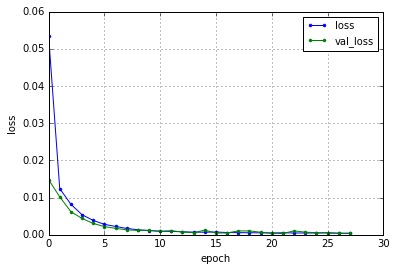

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0108 - val_loss: 0.0036
Epoch 2/50
1s - loss: 0.0029 - val_loss: 0.0023
Epoch 3/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 4/50
1s - loss: 0.0015 - val_loss: 0.0013
Epoch 5/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 6/50
2s - loss: 0.0010 - val_loss: 0.0011
Epoch 7/50
2s - loss: 9.0348e-04 - val_loss: 8.0368e-04
Epoch 8/50
1s - loss: 8.2994e-04 - val_loss: 7.5268e-04
Epoch 9/50
1s - loss: 7.3224e-04 - val_loss: 6.9497e-04
Epoch 10/50
2s - loss: 6.7184e-04 - val_loss: 6.3873e-04
Epoch 11/50
2s - loss: 6.2254e-04 - val_loss: 5.9373e-04
Epoch 12/50
2s - loss: 5.9812e-04 - val_loss: 5.2615e-04
Epoch 13/50
2s - loss: 5.5545e-04 - val_loss: 4.9207e-04
Epoch 14/50
2s - loss: 5.3086e-04 - val_loss: 4.6597e-04
Epoch 15/50
2s - loss: 5.0673e-04 - val_loss: 4.5354e-04
Epoch 16/50
2s - loss: 4.8322e-04 - val_loss: 4.3917e-04
Epoch 17/50
2s - loss: 4.8088e-04 - val_loss: 4.3389e-04
Epoch 18/50
2s - loss:

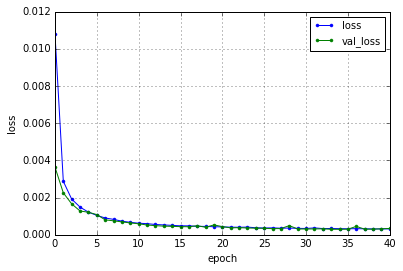

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0313 - val_loss: 0.0083
Epoch 2/50
1s - loss: 0.0061 - val_loss: 0.0059
Epoch 3/50
1s - loss: 0.0039 - val_loss: 0.0042
Epoch 4/50
1s - loss: 0.0028 - val_loss: 0.0022
Epoch 5/50
1s - loss: 0.0020 - val_loss: 0.0021
Epoch 6/50
1s - loss: 0.0016 - val_loss: 0.0012
Epoch 7/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 8/50
1s - loss: 0.0011 - val_loss: 0.0018
Epoch 9/50
1s - loss: 8.5808e-04 - val_loss: 8.8265e-04
Epoch 10/50
1s - loss: 8.1228e-04 - val_loss: 6.5881e-04
Epoch 11/50
1s - loss: 7.3930e-04 - val_loss: 0.0012
Epoch 12/50
1s - loss: 6.6417e-04 - val_loss: 5.6507e-04
Epoch 13/50
1s - loss: 6.4737e-04 - val_loss: 4.9027e-04
Epoch 14/50
1s - loss: 5.9443e-04 - val_loss: 4.5509e-04
Epoch 15/50
1s - loss: 5.8216e-04 - val_loss: 4.6511e-04
Epoch 16/50
1s - loss: 4.9286e-04 - val_loss: 7.0215e-04
Epoch 17/50
1s - loss: 4.4689e-04 - val_loss: 7.5247e-04
Epoch 18/50
1s - loss: 4.6917e-04 - val_lo

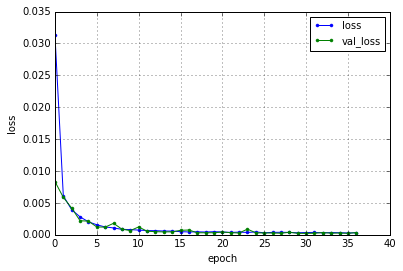

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0690 - val_loss: 0.0122
Epoch 2/50
0s - loss: 0.0093 - val_loss: 0.0064
Epoch 3/50
0s - loss: 0.0055 - val_loss: 0.0086
Epoch 4/50
1s - loss: 0.0042 - val_loss: 0.0041
Epoch 5/50
0s - loss: 0.0033 - val_loss: 0.0027
Epoch 6/50
0s - loss: 0.0028 - val_loss: 0.0030
Epoch 7/50
0s - loss: 0.0023 - val_loss: 0.0019
Epoch 8/50
1s - loss: 0.0020 - val_loss: 0.0016
Epoch 9/50
1s - loss: 0.0018 - val_loss: 0.0014
Epoch 10/50
0s - loss: 0.0015 - val_loss: 0.0011
Epoch 11/50
0s - loss: 0.0014 - val_loss: 0.0013
Epoch 12/50
0s - loss: 0.0011 - val_loss: 9.9008e-04
Epoch 13/50
0s - loss: 0.0011 - val_loss: 9.9449e-04
Epoch 14/50
0s - loss: 9.5357e-04 - val_loss: 6.7307e-04
Epoch 15/50
0s - loss: 8.2160e-04 - val_loss: 6.1037e-04
Epoch 16/50
0s - loss: 8.0586e-04 - val_loss: 6.0172e-04
Epoch 17/50
0s - loss: 7.3291e-04 - val_loss: 7.9978e-04
Epoch 18/50
0s - loss: 6.0999e-04 - val_loss: 7.9796e-04
Epoch 19/50
1

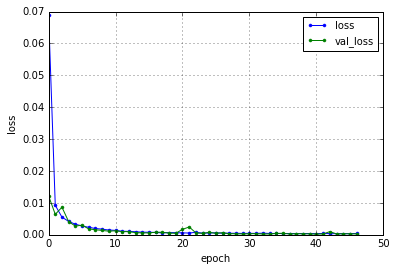

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0128 - val_loss: 0.0031
Epoch 2/50
1s - loss: 0.0023 - val_loss: 0.0018
Epoch 3/50
1s - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
1s - loss: 0.0013 - val_loss: 0.0011
Epoch 5/50
1s - loss: 0.0011 - val_loss: 8.6994e-04
Epoch 6/50
1s - loss: 9.4068e-04 - val_loss: 0.0012
Epoch 7/50
1s - loss: 7.9136e-04 - val_loss: 6.8062e-04
Epoch 8/50
1s - loss: 7.1574e-04 - val_loss: 6.5337e-04
Epoch 9/50
1s - loss: 6.5011e-04 - val_loss: 6.1458e-04
Epoch 10/50
1s - loss: 5.9012e-04 - val_loss: 5.0486e-04
Epoch 11/50
1s - loss: 5.6695e-04 - val_loss: 4.7607e-04
Epoch 12/50
1s - loss: 5.0358e-04 - val_loss: 0.0011
Epoch 13/50
1s - loss: 4.9486e-04 - val_loss: 4.4192e-04
Epoch 14/50
1s - loss: 4.6718e-04 - val_loss: 5.0177e-04
Epoch 15/50
1s - loss: 5.1021e-04 - val_loss: 4.0229e-04
Epoch 16/50
0s - loss: 4.6271e-04 - val_loss: 3.6007e-04
Epoch 17/50
0s - loss: 4.0612e-04 - val_loss: 3.5103e-04
Epoch 18/50
0s - l

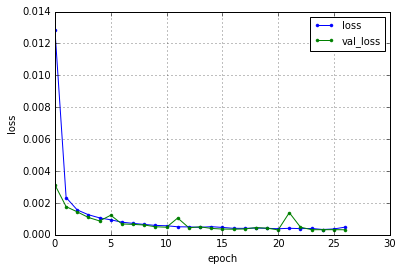

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0196 - val_loss: 0.0090
Epoch 2/50
1s - loss: 0.0075 - val_loss: 0.0063
Epoch 3/50
1s - loss: 0.0056 - val_loss: 0.0081
Epoch 4/50
1s - loss: 0.0046 - val_loss: 0.0043
Epoch 5/50
1s - loss: 0.0041 - val_loss: 0.0038
Epoch 6/50
1s - loss: 0.0037 - val_loss: 0.0036
Epoch 7/50
1s - loss: 0.0033 - val_loss: 0.0033
Epoch 8/50
2s - loss: 0.0031 - val_loss: 0.0029
Epoch 9/50
1s - loss: 0.0028 - val_loss: 0.0027
Epoch 10/50
1s - loss: 0.0026 - val_loss: 0.0029
Epoch 11/50
1s - loss: 0.0025 - val_loss: 0.0023
Epoch 12/50
1s - loss: 0.0023 - val_loss: 0.0022
Epoch 13/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 14/50
1s - loss: 0.0020 - val_loss: 0.0024
Epoch 15/50
1s - loss: 0.0019 - val_loss: 0.0019
Epoch 16/50
1s - loss: 0.0018 - val_loss: 0.0018
Epoch 17/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 18/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 19/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 20/50


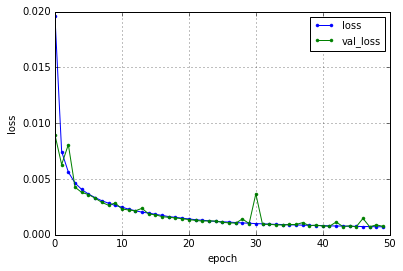

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.0313 - val_loss: 0.0180
Epoch 2/50
1s - loss: 0.0116 - val_loss: 0.0093
Epoch 3/50
1s - loss: 0.0086 - val_loss: 0.0071
Epoch 4/50
1s - loss: 0.0067 - val_loss: 0.0060
Epoch 5/50
1s - loss: 0.0057 - val_loss: 0.0064
Epoch 6/50
1s - loss: 0.0050 - val_loss: 0.0045
Epoch 7/50
1s - loss: 0.0046 - val_loss: 0.0050
Epoch 8/50
1s - loss: 0.0042 - val_loss: 0.0040
Epoch 9/50
1s - loss: 0.0038 - val_loss: 0.0046
Epoch 10/50
1s - loss: 0.0036 - val_loss: 0.0033
Epoch 11/50
1s - loss: 0.0034 - val_loss: 0.0056
Epoch 12/50
1s - loss: 0.0032 - val_loss: 0.0032
Epoch 13/50
1s - loss: 0.0031 - val_loss: 0.0031
Epoch 14/50
1s - loss: 0.0029 - val_loss: 0.0027
Epoch 15/50
2s - loss: 0.0028 - val_loss: 0.0028
Epoch 16/50
1s - loss: 0.0027 - val_loss: 0.0039
Epoch 17/50
1s - loss: 0.0026 - val_loss: 0.0025
Epoch 18/50
1s - loss: 0.0025 - val_loss: 0.0025
Epoch 19/50
1s - loss: 0.0024 - val_loss: 0.0024
Epoch 20/50


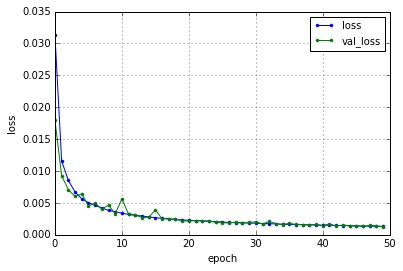

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0063 - val_loss: 0.0030
Epoch 2/50
1s - loss: 0.0025 - val_loss: 0.0021
Epoch 3/50
1s - loss: 0.0020 - val_loss: 0.0021
Epoch 4/50
1s - loss: 0.0018 - val_loss: 0.0020
Epoch 5/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 6/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 7/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 8/50
1s - loss: 0.0013 - val_loss: 0.0014
Epoch 9/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 10/50
1s - loss: 0.0011 - val_loss: 0.0014
Epoch 11/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 12/50
1s - loss: 0.0010 - val_loss: 9.7753e-04
Epoch 13/50
1s - loss: 9.7873e-04 - val_loss: 9.7119e-04
Epoch 14/50
1s - loss: 9.3974e-04 - val_loss: 9.0201e-04
Epoch 15/50
1s - loss: 9.0918e-04 - val_loss: 8.7482e-04
Epoch 16/50
1s - loss: 8.7460e-04 - val_loss: 8.5129e-04
Epoch 17/50
1s - loss: 8.5116e-04 - val_loss: 8.4936e-04
Epoch 18/50
1s - loss: 8.2530e-04 - val_loss: 8.1841e-04
Epoch 19/

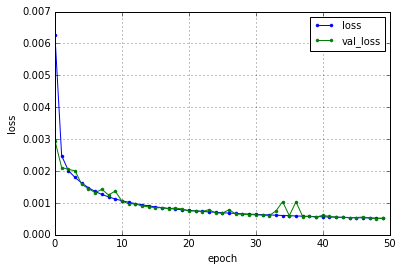

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0245 - val_loss: 0.0056
Epoch 2/50
1s - loss: 0.0058 - val_loss: 0.0073
Epoch 3/50
0s - loss: 0.0045 - val_loss: 0.0028
Epoch 4/50
0s - loss: 0.0037 - val_loss: 0.0030
Epoch 5/50
1s - loss: 0.0033 - val_loss: 0.0018
Epoch 6/50
0s - loss: 0.0031 - val_loss: 0.0035
Epoch 7/50
0s - loss: 0.0030 - val_loss: 0.0051
Epoch 8/50
0s - loss: 0.0029 - val_loss: 0.0086
Epoch 9/50
0s - loss: 0.0027 - val_loss: 0.0021
Epoch 10/50
0s - loss: 0.0027 - val_loss: 0.0013
Epoch 11/50
0s - loss: 0.0026 - val_loss: 0.0037
Epoch 12/50
0s - loss: 0.0026 - val_loss: 0.0031
Epoch 13/50
0s - loss: 0.0025 - val_loss: 0.0013
Epoch 14/50
0s - loss: 0.0025 - val_loss: 0.0042
Epoch 15/50
1s - loss: 0.0024 - val_loss: 0.0017
Epoch 16/50
1s - loss: 0.0024 - val_loss: 0.0029
Epoch 17/50
0s - loss: 0.0024 - val_loss: 0.0040
Epoch 18/50
1s - loss: 0.0023 - val_loss: 0.0077
Epoch 19/50
0s - loss: 0.0024 - val_loss: 0.0010
Epoch 20/50


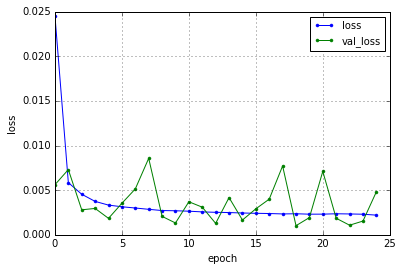

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0588 - val_loss: 0.0162
Epoch 2/50
0s - loss: 0.0109 - val_loss: 0.0080
Epoch 3/50
0s - loss: 0.0092 - val_loss: 0.0124
Epoch 4/50
0s - loss: 0.0085 - val_loss: 0.0117
Epoch 5/50
0s - loss: 0.0080 - val_loss: 0.0055
Epoch 6/50
0s - loss: 0.0078 - val_loss: 0.0123
Epoch 7/50
0s - loss: 0.0075 - val_loss: 0.0044
Epoch 8/50
0s - loss: 0.0073 - val_loss: 0.0053
Epoch 9/50
0s - loss: 0.0071 - val_loss: 0.0034
Epoch 10/50
0s - loss: 0.0069 - val_loss: 0.0052
Epoch 11/50
0s - loss: 0.0069 - val_loss: 0.0040
Epoch 12/50
0s - loss: 0.0067 - val_loss: 0.0098
Epoch 13/50
0s - loss: 0.0066 - val_loss: 0.0061
Epoch 14/50
0s - loss: 0.0065 - val_loss: 0.0063
Epoch 15/50
0s - loss: 0.0063 - val_loss: 0.0155


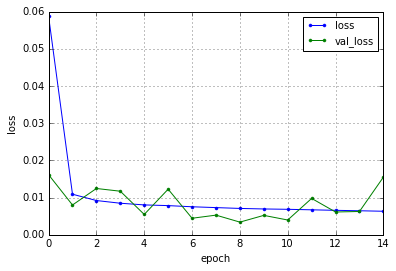

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0088 - val_loss: 0.0019
Epoch 2/50
0s - loss: 0.0020 - val_loss: 0.0014
Epoch 3/50
0s - loss: 0.0017 - val_loss: 0.0013
Epoch 4/50
0s - loss: 0.0016 - val_loss: 0.0014
Epoch 5/50
0s - loss: 0.0015 - val_loss: 0.0067
Epoch 6/50
0s - loss: 0.0014 - val_loss: 0.0011
Epoch 7/50
0s - loss: 0.0014 - val_loss: 0.0039
Epoch 8/50
0s - loss: 0.0013 - val_loss: 8.7478e-04
Epoch 9/50
0s - loss: 0.0013 - val_loss: 8.0833e-04
Epoch 10/50
0s - loss: 0.0012 - val_loss: 7.3743e-04
Epoch 11/50
0s - loss: 0.0012 - val_loss: 0.0015
Epoch 12/50
0s - loss: 0.0012 - val_loss: 0.0010
Epoch 13/50
0s - loss: 0.0012 - val_loss: 7.4851e-04
Epoch 14/50
0s - loss: 0.0012 - val_loss: 0.0015
Epoch 15/50
0s - loss: 0.0012 - val_loss: 6.9334e-04
Epoch 16/50
0s - loss: 0.0011 - val_loss: 0.0013
Epoch 17/50
0s - loss: 0.0011 - val_loss: 0.0013
Epoch 18/50
0s - loss: 0.0011 - val_loss: 8.5802e-04
Epoch 19/50
0s - loss: 0.0011 - val_l

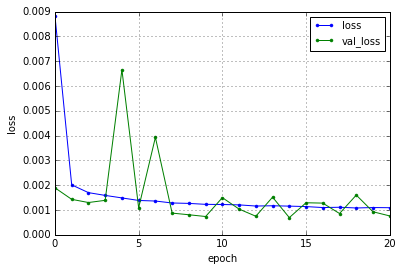

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0231 - val_loss: 0.0067
Epoch 2/50
0s - loss: 0.0063 - val_loss: 0.0150
Epoch 3/50
0s - loss: 0.0046 - val_loss: 0.0051
Epoch 4/50
0s - loss: 0.0035 - val_loss: 0.0030
Epoch 5/50
0s - loss: 0.0027 - val_loss: 0.0015
Epoch 6/50
0s - loss: 0.0024 - val_loss: 0.0015
Epoch 7/50
0s - loss: 0.0021 - val_loss: 0.0015
Epoch 8/50
0s - loss: 0.0018 - val_loss: 0.0014
Epoch 9/50
0s - loss: 0.0018 - val_loss: 0.0014
Epoch 10/50
0s - loss: 0.0018 - val_loss: 0.0022
Epoch 11/50
0s - loss: 0.0016 - val_loss: 9.8277e-04
Epoch 12/50
0s - loss: 0.0014 - val_loss: 7.8523e-04
Epoch 13/50
0s - loss: 0.0015 - val_loss: 9.1745e-04
Epoch 14/50
0s - loss: 0.0013 - val_loss: 6.9176e-04
Epoch 15/50
0s - loss: 0.0014 - val_loss: 0.0159
Epoch 16/50
0s - loss: 0.0013 - val_loss: 9.3651e-04
Epoch 17/50
0s - loss: 0.0012 - val_loss: 0.0013
Epoch 18/50
0s - loss: 0.0011 - val_loss: 0.0046
Epoch 19/50
0s - loss: 0.0012 - val_loss:

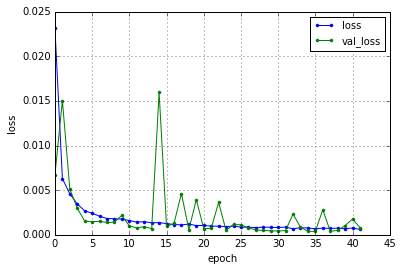

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0426 - val_loss: 0.0129
Epoch 2/50
0s - loss: 0.0128 - val_loss: 0.0094
Epoch 3/50
0s - loss: 0.0102 - val_loss: 0.0147
Epoch 4/50
0s - loss: 0.0084 - val_loss: 0.0046
Epoch 5/50
0s - loss: 0.0073 - val_loss: 0.0128
Epoch 6/50
0s - loss: 0.0061 - val_loss: 0.0278
Epoch 7/50
0s - loss: 0.0057 - val_loss: 0.0099
Epoch 8/50
0s - loss: 0.0053 - val_loss: 0.0027
Epoch 9/50
0s - loss: 0.0045 - val_loss: 0.0023
Epoch 10/50
0s - loss: 0.0042 - val_loss: 0.0050
Epoch 11/50
0s - loss: 0.0038 - val_loss: 0.0018
Epoch 12/50
0s - loss: 0.0034 - val_loss: 0.0021
Epoch 13/50
0s - loss: 0.0034 - val_loss: 0.0043
Epoch 14/50
1s - loss: 0.0027 - val_loss: 0.0013
Epoch 15/50
0s - loss: 0.0026 - val_loss: 0.0016
Epoch 16/50
1s - loss: 0.0026 - val_loss: 0.0011
Epoch 17/50
0s - loss: 0.0022 - val_loss: 0.0124
Epoch 18/50
1s - loss: 0.0023 - val_loss: 0.0020
Epoch 19/50
0s - loss: 0.0022 - val_loss: 0.0010
Epoch 20/50


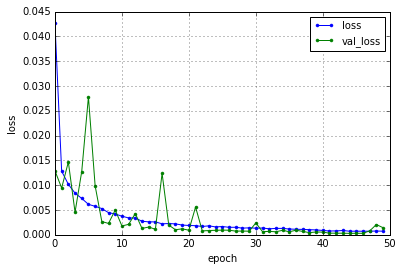

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0067 - val_loss: 0.0021
Epoch 2/50
0s - loss: 0.0021 - val_loss: 0.0014
Epoch 3/50
0s - loss: 0.0018 - val_loss: 0.0011
Epoch 4/50
1s - loss: 0.0015 - val_loss: 0.0013
Epoch 5/50
0s - loss: 0.0013 - val_loss: 0.0010
Epoch 6/50
0s - loss: 0.0012 - val_loss: 8.4538e-04
Epoch 7/50
0s - loss: 0.0012 - val_loss: 0.0014
Epoch 8/50
1s - loss: 0.0010 - val_loss: 0.0011
Epoch 9/50
1s - loss: 9.7635e-04 - val_loss: 6.9531e-04
Epoch 10/50
1s - loss: 9.8708e-04 - val_loss: 5.7781e-04
Epoch 11/50
0s - loss: 8.2307e-04 - val_loss: 0.0043
Epoch 12/50
0s - loss: 8.0413e-04 - val_loss: 5.2669e-04
Epoch 13/50
0s - loss: 7.4981e-04 - val_loss: 9.1511e-04
Epoch 14/50
0s - loss: 7.4860e-04 - val_loss: 6.3046e-04
Epoch 15/50
0s - loss: 7.6788e-04 - val_loss: 5.4024e-04
Epoch 16/50
1s - loss: 6.7866e-04 - val_loss: 7.6209e-04
Epoch 17/50
0s - loss: 5.9584e-04 - val_loss: 3.8965e-04
Epoch 18/50
0s - loss: 7.4438e-04 - va

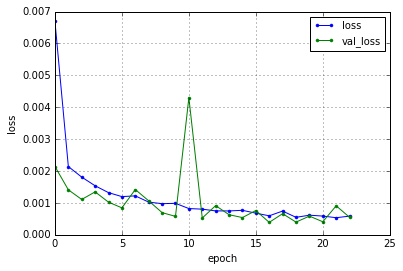

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15906
SourceData's aborting data = 6
window shape is (15906, 256, 3)
(15906, 256, 3)
hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.2732 - val_loss: 0.2350
Epoch 2/50
0s - loss: 0.1998 - val_loss: 0.1661
Epoch 3/50
0s - loss: 0.1392 - val_loss: 0.1159
Epoch 4/50
0s - loss: 0.0994 - val_loss: 0.0855
Epoch 5/50
0s - loss: 0.0759 - val_loss: 0.0678
Epoch 6/50
0s - loss: 0.0619 - val_loss: 0.0568
Epoch 7/50
0s - loss: 0.0529 - val_loss: 0.0495
Epoch 8/50
0s - loss: 0.0468 - val_loss: 0.0443
Epoch 9/50
0s - loss: 0.0423 - val_loss: 0.0405
Epoch 10/50
0s - loss: 0.0390 - val_loss: 0.0376
Epoch 11/50
0s - loss: 0.0365 - val_loss: 0.0355
Epoch 12/50
0s - loss: 0.0346 - val_loss: 0.0337
Epoch 13/50
0s - loss: 0.0330 - val_loss: 0.0323
Epoch 14/50
0s - loss: 0.0317 - val_loss: 0.0312
Epoch 15/50
0s - loss: 0.0307 - val_loss: 0.0302
Epoch 16/50
0s 

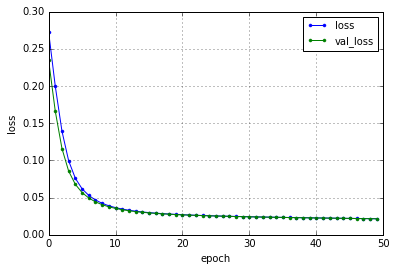

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.5780 - val_loss: 0.3951
Epoch 2/50
0s - loss: 0.2746 - val_loss: 0.1851
Epoch 3/50
0s - loss: 0.1396 - val_loss: 0.1065
Epoch 4/50
0s - loss: 0.0888 - val_loss: 0.0750
Epoch 5/50
0s - loss: 0.0665 - val_loss: 0.0596
Epoch 6/50
0s - loss: 0.0549 - val_loss: 0.0509
Epoch 7/50
0s - loss: 0.0481 - val_loss: 0.0456
Epoch 8/50
0s - loss: 0.0436 - val_loss: 0.0419
Epoch 9/50
0s - loss: 0.0405 - val_loss: 0.0392
Epoch 10/50
0s - loss: 0.0381 - val_loss: 0.0371
Epoch 11/50
0s - loss: 0.0362 - val_loss: 0.0354
Epoch 12/50
0s - loss: 0.0347 - val_loss: 0.0340
Epoch 13/50
0s - loss: 0.0334 - val_loss: 0.0329
Epoch 14/50
0s - loss: 0.0324 - val_loss: 0.0319
Epoch 15/50
0s - loss: 0.0314 - val_loss: 0.0310
Epoch 16/50
0s - loss: 0.0307 - val_loss: 0.0303
Epoch 17/50
0s - loss: 0.0300 - val_loss: 0.0297
Epoch 18/50
0s - loss: 0.0294 - val_loss: 0.0291
Epoch 19/50
0s - loss: 0.0289 - val_loss: 0.0286
Epoch 20/50


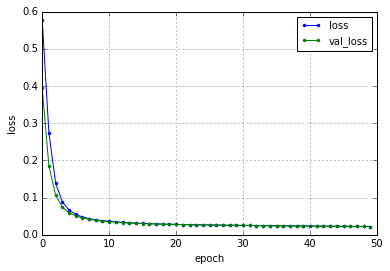

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0850 - val_loss: 0.0797
Epoch 2/50
0s - loss: 0.0765 - val_loss: 0.0739
Epoch 3/50
0s - loss: 0.0715 - val_loss: 0.0692
Epoch 4/50
0s - loss: 0.0666 - val_loss: 0.0640
Epoch 5/50
0s - loss: 0.0613 - val_loss: 0.0585
Epoch 6/50
0s - loss: 0.0557 - val_loss: 0.0529
Epoch 7/50
0s - loss: 0.0501 - val_loss: 0.0474
Epoch 8/50
0s - loss: 0.0449 - val_loss: 0.0425
Epoch 9/50
0s - loss: 0.0403 - val_loss: 0.0382
Epoch 10/50
0s - loss: 0.0363 - val_loss: 0.0345
Epoch 11/50
0s - loss: 0.0330 - val_loss: 0.0315
Epoch 12/50
0s - loss: 0.0302 - val_loss: 0.0290
Epoch 13/50
0s - loss: 0.0279 - val_loss: 0.0269
Epoch 14/50
0s - loss: 0.0261 - val_loss: 0.0253
Epoch 15/50
0s - loss: 0.0245 - val_loss: 0.0239
Epoch 16/50
0s - loss: 0.0233 - val_loss: 0.0227
Epoch 17/50
0s - loss: 0.0222 - val_loss: 0.0218
Epoch 18/50
0s - loss: 0.0213 - val_loss: 0.0209
Epoch 19/50
0s - loss: 0.0206 - val_loss: 0.0202
Epoch 20/50


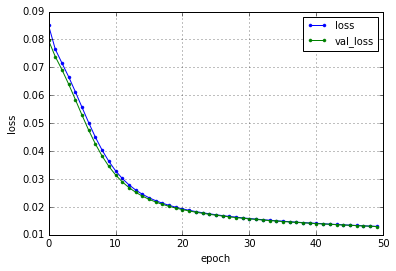

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0573 - val_loss: 0.0207
Epoch 2/50
0s - loss: 0.0162 - val_loss: 0.0222
Epoch 3/50
0s - loss: 0.0120 - val_loss: 0.0102
Epoch 4/50
0s - loss: 0.0100 - val_loss: 0.0088
Epoch 5/50
0s - loss: 0.0088 - val_loss: 0.0095
Epoch 6/50
0s - loss: 0.0079 - val_loss: 0.0079
Epoch 7/50
0s - loss: 0.0072 - val_loss: 0.0082
Epoch 8/50
0s - loss: 0.0066 - val_loss: 0.0096
Epoch 9/50
0s - loss: 0.0065 - val_loss: 0.0097
Epoch 10/50
0s - loss: 0.0061 - val_loss: 0.0063
Epoch 11/50
0s - loss: 0.0058 - val_loss: 0.0060
Epoch 12/50
0s - loss: 0.0055 - val_loss: 0.0055
Epoch 13/50
0s - loss: 0.0054 - val_loss: 0.0103
Epoch 14/50
0s - loss: 0.0052 - val_loss: 0.0051
Epoch 15/50
0s - loss: 0.0050 - val_loss: 0.0052
Epoch 16/50
0s - loss: 0.0052 - val_loss: 0.0050
Epoch 17/50
0s - loss: 0.0048 - val_loss: 0.0045
Epoch 18/50
0s - loss: 0.0047 - val_loss: 0.0038
Epoch 19/50
0s - loss: 0.0045 - val_loss: 0.0044
Epoch 20/50


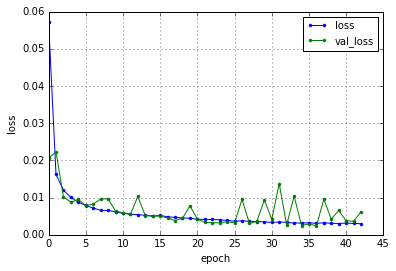

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.1192 - val_loss: 0.0266
Epoch 2/50
0s - loss: 0.0208 - val_loss: 0.0162
Epoch 3/50
0s - loss: 0.0156 - val_loss: 0.0124
Epoch 4/50
0s - loss: 0.0135 - val_loss: 0.0296
Epoch 5/50
0s - loss: 0.0116 - val_loss: 0.0148
Epoch 6/50
0s - loss: 0.0109 - val_loss: 0.0244
Epoch 7/50
0s - loss: 0.0097 - val_loss: 0.0112
Epoch 8/50
0s - loss: 0.0097 - val_loss: 0.0079
Epoch 9/50
0s - loss: 0.0090 - val_loss: 0.0063
Epoch 10/50
0s - loss: 0.0084 - val_loss: 0.0125
Epoch 11/50
0s - loss: 0.0081 - val_loss: 0.0057
Epoch 12/50
0s - loss: 0.0084 - val_loss: 0.0101
Epoch 13/50
0s - loss: 0.0080 - val_loss: 0.0099
Epoch 14/50
0s - loss: 0.0077 - val_loss: 0.0051
Epoch 15/50
0s - loss: 0.0075 - val_loss: 0.0060
Epoch 16/50
0s - loss: 0.0076 - val_loss: 0.0059
Epoch 17/50
0s - loss: 0.0074 - val_loss: 0.0207
Epoch 18/50
0s - loss: 0.0069 - val_loss: 0.0074
Epoch 19/50
0s - loss: 0.0071 - val_loss: 0.0051
Epoch 20/50


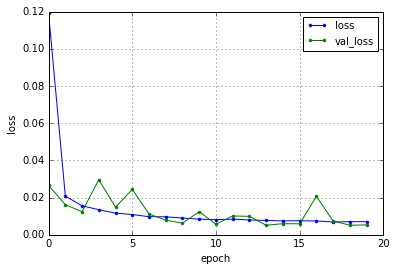

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0214 - val_loss: 0.0102
Epoch 2/50
0s - loss: 0.0075 - val_loss: 0.0061
Epoch 3/50
0s - loss: 0.0054 - val_loss: 0.0064
Epoch 4/50
0s - loss: 0.0046 - val_loss: 0.0054
Epoch 5/50
0s - loss: 0.0041 - val_loss: 0.0039
Epoch 6/50
0s - loss: 0.0037 - val_loss: 0.0035
Epoch 7/50
0s - loss: 0.0034 - val_loss: 0.0032
Epoch 8/50
0s - loss: 0.0031 - val_loss: 0.0037
Epoch 9/50
0s - loss: 0.0029 - val_loss: 0.0031
Epoch 10/50
0s - loss: 0.0027 - val_loss: 0.0028
Epoch 11/50
0s - loss: 0.0026 - val_loss: 0.0032
Epoch 12/50
0s - loss: 0.0025 - val_loss: 0.0026
Epoch 13/50
0s - loss: 0.0024 - val_loss: 0.0025
Epoch 14/50
0s - loss: 0.0023 - val_loss: 0.0072
Epoch 15/50
0s - loss: 0.0022 - val_loss: 0.0072
Epoch 16/50
0s - loss: 0.0021 - val_loss: 0.0023
Epoch 17/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 18/50
0s - loss: 0.0020 - val_loss: 0.0023
Epoch 19/50
0s - loss: 0.0020 - val_loss: 0.0022
Epoch 20/50


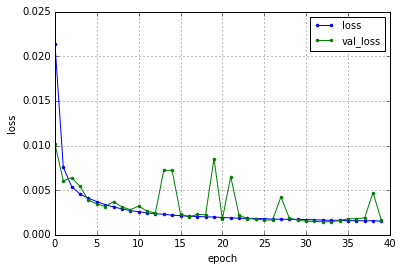

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0315 - val_loss: 0.0140
Epoch 2/50
0s - loss: 0.0114 - val_loss: 0.0093
Epoch 3/50
0s - loss: 0.0078 - val_loss: 0.0069
Epoch 4/50
0s - loss: 0.0056 - val_loss: 0.0052
Epoch 5/50
0s - loss: 0.0042 - val_loss: 0.0038
Epoch 6/50
0s - loss: 0.0033 - val_loss: 0.0027
Epoch 7/50
0s - loss: 0.0027 - val_loss: 0.0029
Epoch 8/50
0s - loss: 0.0023 - val_loss: 0.0019
Epoch 9/50
0s - loss: 0.0020 - val_loss: 0.0020
Epoch 10/50
0s - loss: 0.0017 - val_loss: 0.0014
Epoch 11/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 12/50
0s - loss: 0.0013 - val_loss: 0.0018
Epoch 13/50
0s - loss: 0.0014 - val_loss: 0.0026
Epoch 14/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 15/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 16/50
0s - loss: 0.0011 - val_loss: 0.0013
Epoch 17/50
0s - loss: 0.0011 - val_loss: 0.0014
Epoch 18/50
0s - loss: 0.0011 - val_loss: 9.0179e-04
Epoch 19/50
0s - loss: 0.0010 - val_loss: 0.0013
Epoch 20

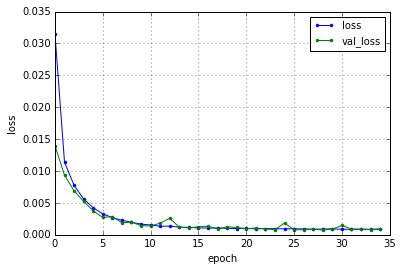

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0568 - val_loss: 0.0256
Epoch 2/50
0s - loss: 0.0170 - val_loss: 0.0116
Epoch 3/50
0s - loss: 0.0093 - val_loss: 0.0117
Epoch 4/50
0s - loss: 0.0068 - val_loss: 0.0058
Epoch 5/50
0s - loss: 0.0053 - val_loss: 0.0073
Epoch 6/50
0s - loss: 0.0041 - val_loss: 0.0038
Epoch 7/50
0s - loss: 0.0032 - val_loss: 0.0034
Epoch 8/50
0s - loss: 0.0026 - val_loss: 0.0025
Epoch 9/50
0s - loss: 0.0021 - val_loss: 0.0018
Epoch 10/50
0s - loss: 0.0020 - val_loss: 0.0025
Epoch 11/50
0s - loss: 0.0017 - val_loss: 0.0014
Epoch 12/50
0s - loss: 0.0016 - val_loss: 0.0021
Epoch 13/50
0s - loss: 0.0016 - val_loss: 0.0020
Epoch 14/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 15/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 16/50
0s - loss: 0.0013 - val_loss: 0.0016
Epoch 17/50
0s - loss: 0.0013 - val_loss: 0.0038
Epoch 18/50
0s - loss: 0.0011 - val_loss: 0.0015
Epoch 19/50
0s - loss: 0.0011 - val_loss: 9.2544e-04
Epoch 20

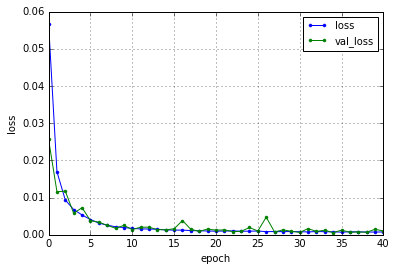

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0121 - val_loss: 0.0047
Epoch 2/50
0s - loss: 0.0038 - val_loss: 0.0030
Epoch 3/50
0s - loss: 0.0026 - val_loss: 0.0023
Epoch 4/50
0s - loss: 0.0021 - val_loss: 0.0021
Epoch 5/50
0s - loss: 0.0018 - val_loss: 0.0019
Epoch 6/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 7/50
0s - loss: 0.0014 - val_loss: 0.0013
Epoch 8/50
0s - loss: 0.0013 - val_loss: 0.0014
Epoch 9/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
0s - loss: 0.0011 - val_loss: 0.0013
Epoch 11/50
0s - loss: 0.0011 - val_loss: 9.7351e-04
Epoch 12/50
0s - loss: 0.0010 - val_loss: 0.0010
Epoch 13/50
0s - loss: 0.0010 - val_loss: 9.2257e-04
Epoch 14/50
0s - loss: 9.6566e-04 - val_loss: 0.0014
Epoch 15/50
0s - loss: 9.2221e-04 - val_loss: 8.8767e-04
Epoch 16/50
0s - loss: 8.8459e-04 - val_loss: 8.2849e-04
Epoch 17/50
0s - loss: 8.6411e-04 - val_loss: 9.7378e-04
Epoch 18/50
0s - loss: 8.3493e-04 - val_loss: 7.4372e-04
Epoch 19/50
0s - 

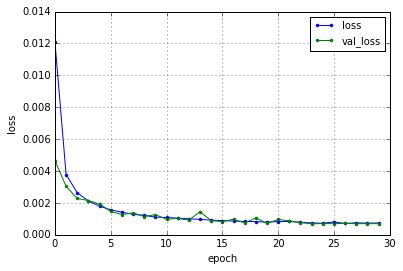

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0339 - val_loss: 0.0119
Epoch 2/50
0s - loss: 0.0093 - val_loss: 0.0069
Epoch 3/50
0s - loss: 0.0061 - val_loss: 0.0058
Epoch 4/50
0s - loss: 0.0048 - val_loss: 0.0077
Epoch 5/50
0s - loss: 0.0039 - val_loss: 0.0033
Epoch 6/50
0s - loss: 0.0031 - val_loss: 0.0038
Epoch 7/50
0s - loss: 0.0027 - val_loss: 0.0022
Epoch 8/50
0s - loss: 0.0022 - val_loss: 0.0020
Epoch 9/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 10/50
0s - loss: 0.0019 - val_loss: 0.0020
Epoch 11/50
0s - loss: 0.0014 - val_loss: 0.0019
Epoch 12/50
0s - loss: 0.0012 - val_loss: 0.0018
Epoch 13/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 14/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 15/50
0s - loss: 0.0011 - val_loss: 0.0012
Epoch 16/50
0s - loss: 0.0016 - val_loss: 0.0011
Epoch 17/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 18/50
0s - loss: 0.0011 - val_loss: 8.8367e-04
Epoch 19/50
0s - loss: 0.0011 - val_loss: 8.9835e-04
Epoc

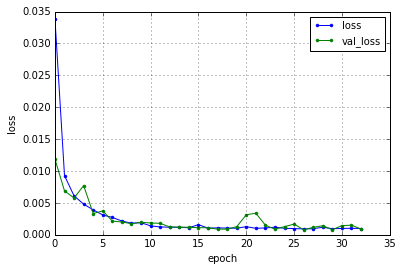

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0694 - val_loss: 0.0221
Epoch 2/50
0s - loss: 0.0138 - val_loss: 0.0096
Epoch 3/50
0s - loss: 0.0085 - val_loss: 0.0066
Epoch 4/50
0s - loss: 0.0063 - val_loss: 0.0055
Epoch 5/50
0s - loss: 0.0050 - val_loss: 0.0072
Epoch 6/50
0s - loss: 0.0042 - val_loss: 0.0097
Epoch 7/50
0s - loss: 0.0034 - val_loss: 0.0050
Epoch 8/50
0s - loss: 0.0030 - val_loss: 0.0028
Epoch 9/50
0s - loss: 0.0025 - val_loss: 0.0021
Epoch 10/50
0s - loss: 0.0024 - val_loss: 0.0018
Epoch 11/50
0s - loss: 0.0021 - val_loss: 0.0023
Epoch 12/50
0s - loss: 0.0020 - val_loss: 0.0036
Epoch 13/50
0s - loss: 0.0018 - val_loss: 0.0056
Epoch 14/50
0s - loss: 0.0016 - val_loss: 0.0012
Epoch 15/50
0s - loss: 0.0015 - val_loss: 0.0016
Epoch 16/50
0s - loss: 0.0015 - val_loss: 0.0034
Epoch 17/50
0s - loss: 0.0013 - val_loss: 9.8062e-04
Epoch 18/50
0s - loss: 0.0014 - val_loss: 0.0030
Epoch 19/50
0s - loss: 0.0013 - val_loss: 0.0036
Epoch 20

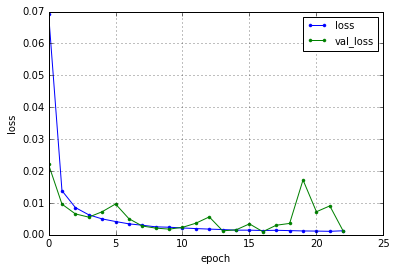

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0109 - val_loss: 0.0037
Epoch 2/50
0s - loss: 0.0030 - val_loss: 0.0025
Epoch 3/50
0s - loss: 0.0023 - val_loss: 0.0019
Epoch 4/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 5/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 6/50
0s - loss: 0.0014 - val_loss: 0.0015
Epoch 7/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 8/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 9/50
0s - loss: 0.0011 - val_loss: 9.6719e-04
Epoch 10/50
0s - loss: 9.9613e-04 - val_loss: 0.0014
Epoch 11/50
0s - loss: 9.9407e-04 - val_loss: 0.0012
Epoch 12/50
0s - loss: 9.7956e-04 - val_loss: 9.5332e-04
Epoch 13/50
0s - loss: 9.2600e-04 - val_loss: 7.8106e-04
Epoch 14/50
0s - loss: 9.6833e-04 - val_loss: 9.2647e-04
Epoch 15/50
0s - loss: 8.7583e-04 - val_loss: 7.3896e-04
Epoch 16/50
0s - loss: 9.2742e-04 - val_loss: 0.0017
Epoch 17/50
0s - loss: 9.1699e-04 - val_loss: 7.2355e-04
Epoch 18/50
0s - loss: 8.8040e-04 - val_loss: 7.8105e-

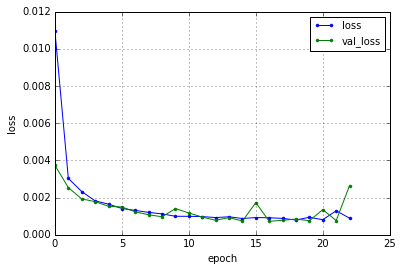

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0242 - val_loss: 0.0213
Epoch 2/50
0s - loss: 0.0113 - val_loss: 0.0104
Epoch 3/50
0s - loss: 0.0088 - val_loss: 0.0077
Epoch 4/50
0s - loss: 0.0075 - val_loss: 0.0071
Epoch 5/50
0s - loss: 0.0066 - val_loss: 0.0060
Epoch 6/50
0s - loss: 0.0060 - val_loss: 0.0055
Epoch 7/50
0s - loss: 0.0054 - val_loss: 0.0057
Epoch 8/50
0s - loss: 0.0051 - val_loss: 0.0055
Epoch 9/50
0s - loss: 0.0048 - val_loss: 0.0050
Epoch 10/50
0s - loss: 0.0046 - val_loss: 0.0043
Epoch 11/50
0s - loss: 0.0043 - val_loss: 0.0041
Epoch 12/50
0s - loss: 0.0042 - val_loss: 0.0042
Epoch 13/50
0s - loss: 0.0040 - val_loss: 0.0038
Epoch 14/50
0s - loss: 0.0039 - val_loss: 0.0063
Epoch 15/50
0s - loss: 0.0038 - val_loss: 0.0035
Epoch 16/50
0s - loss: 0.0036 - val_loss: 0.0055
Epoch 17/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 18/50
0s - loss: 0.0034 - val_loss: 0.0033
Epoch 19/50
0s - loss: 0.0033 - val_loss: 0.0127
Epoch 20/50


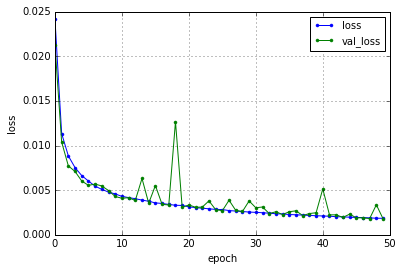

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0409 - val_loss: 0.0249
Epoch 2/50
0s - loss: 0.0186 - val_loss: 0.0304
Epoch 3/50
0s - loss: 0.0141 - val_loss: 0.0155
Epoch 4/50
0s - loss: 0.0114 - val_loss: 0.0163
Epoch 5/50
0s - loss: 0.0096 - val_loss: 0.0086
Epoch 6/50
0s - loss: 0.0086 - val_loss: 0.0091
Epoch 7/50
0s - loss: 0.0076 - val_loss: 0.0080
Epoch 8/50
0s - loss: 0.0070 - val_loss: 0.0062
Epoch 9/50
0s - loss: 0.0065 - val_loss: 0.0086
Epoch 10/50
0s - loss: 0.0061 - val_loss: 0.0056
Epoch 11/50
0s - loss: 0.0058 - val_loss: 0.0055
Epoch 12/50
0s - loss: 0.0054 - val_loss: 0.0049
Epoch 13/50
0s - loss: 0.0053 - val_loss: 0.0080
Epoch 14/50
0s - loss: 0.0051 - val_loss: 0.0050
Epoch 15/50
0s - loss: 0.0048 - val_loss: 0.0046
Epoch 16/50
0s - loss: 0.0046 - val_loss: 0.0046
Epoch 17/50
0s - loss: 0.0044 - val_loss: 0.0045
Epoch 18/50
0s - loss: 0.0043 - val_loss: 0.0047
Epoch 19/50
0s - loss: 0.0041 - val_loss: 0.0038
Epoch 20/50


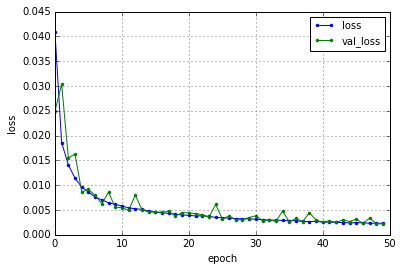

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0079 - val_loss: 0.0047
Epoch 2/50
1s - loss: 0.0036 - val_loss: 0.0031
Epoch 3/50
1s - loss: 0.0029 - val_loss: 0.0026
Epoch 4/50
1s - loss: 0.0025 - val_loss: 0.0024
Epoch 5/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 6/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 7/50
1s - loss: 0.0019 - val_loss: 0.0023
Epoch 8/50
1s - loss: 0.0018 - val_loss: 0.0091
Epoch 9/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 10/50
1s - loss: 0.0017 - val_loss: 0.0017
Epoch 11/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 12/50
1s - loss: 0.0016 - val_loss: 0.0018
Epoch 13/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 14/50
1s - loss: 0.0015 - val_loss: 0.0016
Epoch 15/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 16/50
1s - loss: 0.0014 - val_loss: 0.0100
Epoch 17/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 18/50
0s - loss: 0.0014 - val_loss: 0.0014
Epoch 19/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 20/50


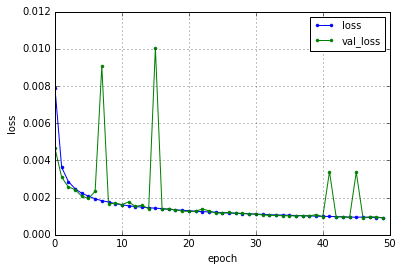

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0289 - val_loss: 0.0102
Epoch 2/50
0s - loss: 0.0104 - val_loss: 0.0125
Epoch 3/50
0s - loss: 0.0089 - val_loss: 0.0205
Epoch 4/50
0s - loss: 0.0080 - val_loss: 0.0158
Epoch 5/50
0s - loss: 0.0073 - val_loss: 0.0114
Epoch 6/50
0s - loss: 0.0067 - val_loss: 0.0153
Epoch 7/50
0s - loss: 0.0064 - val_loss: 0.0049
Epoch 8/50
0s - loss: 0.0060 - val_loss: 0.0099
Epoch 9/50
0s - loss: 0.0057 - val_loss: 0.0073
Epoch 10/50
0s - loss: 0.0055 - val_loss: 0.0051
Epoch 11/50
0s - loss: 0.0055 - val_loss: 0.0032
Epoch 12/50
0s - loss: 0.0052 - val_loss: 0.0048
Epoch 13/50
0s - loss: 0.0051 - val_loss: 0.0056
Epoch 14/50
0s - loss: 0.0050 - val_loss: 0.0049
Epoch 15/50
0s - loss: 0.0050 - val_loss: 0.0094
Epoch 16/50
0s - loss: 0.0049 - val_loss: 0.0045
Epoch 17/50
0s - loss: 0.0048 - val_loss: 0.0139


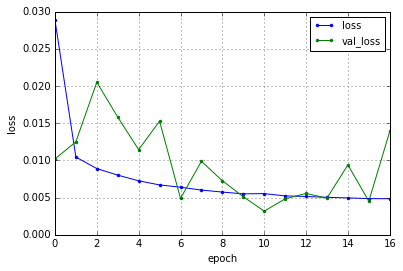

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0625 - val_loss: 0.0146
Epoch 2/50
0s - loss: 0.0167 - val_loss: 0.0120
Epoch 3/50
0s - loss: 0.0147 - val_loss: 0.0114
Epoch 4/50
0s - loss: 0.0143 - val_loss: 0.0167
Epoch 5/50
0s - loss: 0.0136 - val_loss: 0.0105
Epoch 6/50
1s - loss: 0.0132 - val_loss: 0.0556
Epoch 7/50
1s - loss: 0.0129 - val_loss: 0.0137
Epoch 8/50
1s - loss: 0.0124 - val_loss: 0.0089
Epoch 9/50
1s - loss: 0.0121 - val_loss: 0.0178
Epoch 10/50
1s - loss: 0.0118 - val_loss: 0.0138
Epoch 11/50
1s - loss: 0.0117 - val_loss: 0.0237
Epoch 12/50
1s - loss: 0.0113 - val_loss: 0.0167
Epoch 13/50
1s - loss: 0.0110 - val_loss: 0.0107
Epoch 14/50
1s - loss: 0.0107 - val_loss: 0.0158


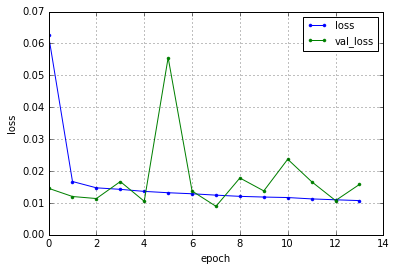

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0096 - val_loss: 0.0033
Epoch 2/50
1s - loss: 0.0036 - val_loss: 0.0023
Epoch 3/50
1s - loss: 0.0030 - val_loss: 0.0024
Epoch 4/50
1s - loss: 0.0029 - val_loss: 0.0080
Epoch 5/50
1s - loss: 0.0027 - val_loss: 0.0024
Epoch 6/50
1s - loss: 0.0026 - val_loss: 0.0018
Epoch 7/50
1s - loss: 0.0025 - val_loss: 0.0021
Epoch 8/50
1s - loss: 0.0025 - val_loss: 0.0024
Epoch 9/50
1s - loss: 0.0025 - val_loss: 0.0018
Epoch 10/50
1s - loss: 0.0024 - val_loss: 0.0022
Epoch 11/50
1s - loss: 0.0024 - val_loss: 0.0026
Epoch 12/50
1s - loss: 0.0024 - val_loss: 0.0064


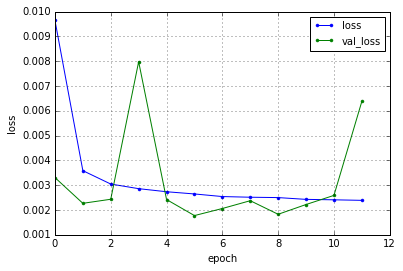

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0279 - val_loss: 0.0174
Epoch 2/50
1s - loss: 0.0109 - val_loss: 0.0248
Epoch 3/50
1s - loss: 0.0082 - val_loss: 0.0165
Epoch 4/50
1s - loss: 0.0066 - val_loss: 0.0178
Epoch 5/50
1s - loss: 0.0059 - val_loss: 0.0084
Epoch 6/50
1s - loss: 0.0049 - val_loss: 0.0063
Epoch 7/50
1s - loss: 0.0046 - val_loss: 0.0027
Epoch 8/50
1s - loss: 0.0041 - val_loss: 0.0071
Epoch 9/50
1s - loss: 0.0040 - val_loss: 0.0138
Epoch 10/50
1s - loss: 0.0036 - val_loss: 0.0025
Epoch 11/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 12/50
1s - loss: 0.0032 - val_loss: 0.0027
Epoch 13/50
1s - loss: 0.0031 - val_loss: 0.0079
Epoch 14/50
1s - loss: 0.0030 - val_loss: 0.0025
Epoch 15/50
1s - loss: 0.0030 - val_loss: 0.0017
Epoch 16/50
1s - loss: 0.0028 - val_loss: 0.0044
Epoch 17/50
1s - loss: 0.0027 - val_loss: 0.0021
Epoch 18/50
1s - loss: 0.0027 - val_loss: 0.0070
Epoch 19/50
1s - loss: 0.0026 - val_loss: 0.0081
Epoch 20/50


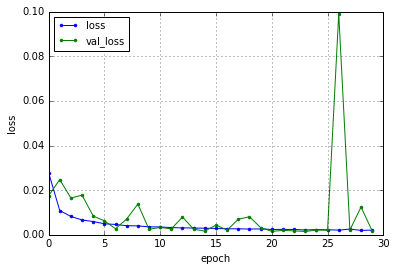

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0526 - val_loss: 0.0199
Epoch 2/50
1s - loss: 0.0189 - val_loss: 0.0279
Epoch 3/50
1s - loss: 0.0155 - val_loss: 0.0605
Epoch 4/50
1s - loss: 0.0135 - val_loss: 0.0095
Epoch 5/50
1s - loss: 0.0118 - val_loss: 0.0316
Epoch 6/50
1s - loss: 0.0104 - val_loss: 0.0116
Epoch 7/50
1s - loss: 0.0093 - val_loss: 0.0081
Epoch 8/50
1s - loss: 0.0085 - val_loss: 0.0190
Epoch 9/50
1s - loss: 0.0077 - val_loss: 0.0129
Epoch 10/50
1s - loss: 0.0071 - val_loss: 0.0055
Epoch 11/50
0s - loss: 0.0064 - val_loss: 0.0137
Epoch 12/50
0s - loss: 0.0060 - val_loss: 0.0083
Epoch 13/50
0s - loss: 0.0056 - val_loss: 0.0371
Epoch 14/50
0s - loss: 0.0055 - val_loss: 0.0142
Epoch 15/50
0s - loss: 0.0050 - val_loss: 0.0225
Epoch 16/50
0s - loss: 0.0049 - val_loss: 0.0030
Epoch 17/50
1s - loss: 0.0045 - val_loss: 0.0038
Epoch 18/50
1s - loss: 0.0044 - val_loss: 0.0026
Epoch 19/50
1s - loss: 0.0040 - val_loss: 0.0035
Epoch 20/50


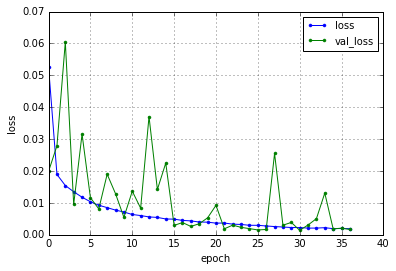

hiden node = 16
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0087 - val_loss: 0.0077
Epoch 2/50
1s - loss: 0.0037 - val_loss: 0.0030
Epoch 3/50
1s - loss: 0.0031 - val_loss: 0.0027
Epoch 4/50
1s - loss: 0.0028 - val_loss: 0.0022
Epoch 5/50
1s - loss: 0.0025 - val_loss: 0.0023
Epoch 6/50
1s - loss: 0.0023 - val_loss: 0.0254
Epoch 7/50
1s - loss: 0.0022 - val_loss: 0.0013
Epoch 8/50
1s - loss: 0.0020 - val_loss: 0.0223
Epoch 9/50
1s - loss: 0.0018 - val_loss: 0.0012
Epoch 10/50
1s - loss: 0.0018 - val_loss: 0.0016
Epoch 11/50
1s - loss: 0.0018 - val_loss: 0.0016
Epoch 12/50
1s - loss: 0.0017 - val_loss: 0.0011
Epoch 13/50
1s - loss: 0.0016 - val_loss: 0.0013
Epoch 14/50
1s - loss: 0.0015 - val_loss: 0.0073
Epoch 15/50
1s - loss: 0.0015 - val_loss: 0.0011
Epoch 16/50
1s - loss: 0.0016 - val_loss: 0.0026
Epoch 17/50
1s - loss: 0.0016 - val_loss: 0.0014
Epoch 18/50
1s - loss: 0.0013 - val_loss: 8.6141e-04
Epoch 19/50
1s - loss: 0.0013 - val_loss: 0.0010
Epoch 20

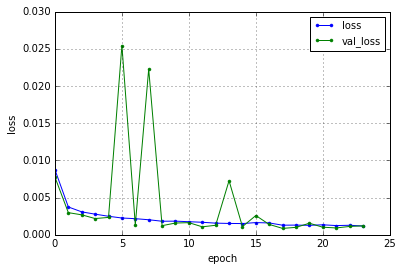

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15890
SourceData's aborting data = 6
window shape is (15890, 512, 3)
(15890, 512, 3)
hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.2799 - val_loss: 0.2597
Epoch 2/50
1s - loss: 0.2388 - val_loss: 0.2174
Epoch 3/50
1s - loss: 0.1972 - val_loss: 0.1780
Epoch 4/50
1s - loss: 0.1614 - val_loss: 0.1462
Epoch 5/50
1s - loss: 0.1338 - val_loss: 0.1225
Epoch 6/50
1s - loss: 0.1134 - val_loss: 0.1051
Epoch 7/50
0s - loss: 0.0984 - val_loss: 0.0921
Epoch 8/50
0s - loss: 0.0870 - val_loss: 0.0821
Epoch 9/50
1s - loss: 0.0780 - val_loss: 0.0742
Epoch 10/50
1s - loss: 0.0709 - val_loss: 0.0678
Epoch 11/50
0s - loss: 0.0652 - val_loss: 0.0627
Epoch 12/50
0s - loss: 0.0605 - val_loss: 0.0584
Epoch 13/50
1s - loss: 0.0566 - val_loss: 0.0549
Epoch 14/50
0s - loss: 0.0534 - val_loss: 0.0519
Epoch 15/50
1s - loss: 0.0507 - val_loss: 0.0494
Epoch 16/50
1s 

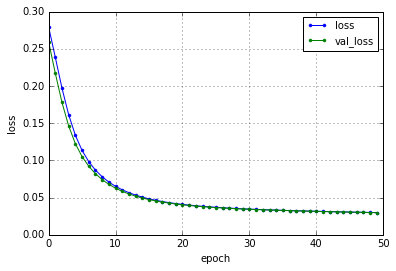

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.6487 - val_loss: 0.5268
Epoch 2/50
1s - loss: 0.4264 - val_loss: 0.3406
Epoch 3/50
1s - loss: 0.2801 - val_loss: 0.2288
Epoch 4/50
1s - loss: 0.1929 - val_loss: 0.1626
Epoch 5/50
1s - loss: 0.1414 - val_loss: 0.1233
Epoch 6/50
1s - loss: 0.1101 - val_loss: 0.0987
Epoch 7/50
1s - loss: 0.0903 - val_loss: 0.0829
Epoch 8/50
2s - loss: 0.0774 - val_loss: 0.0724
Epoch 9/50
1s - loss: 0.0686 - val_loss: 0.0652
Epoch 10/50
1s - loss: 0.0625 - val_loss: 0.0600
Epoch 11/50
1s - loss: 0.0580 - val_loss: 0.0561
Epoch 12/50
0s - loss: 0.0546 - val_loss: 0.0532
Epoch 13/50
1s - loss: 0.0520 - val_loss: 0.0508
Epoch 14/50
1s - loss: 0.0499 - val_loss: 0.0489
Epoch 15/50
1s - loss: 0.0481 - val_loss: 0.0474
Epoch 16/50
1s - loss: 0.0467 - val_loss: 0.0461
Epoch 17/50
1s - loss: 0.0455 - val_loss: 0.0450
Epoch 18/50
1s - loss: 0.0445 - val_loss: 0.0440
Epoch 19/50
1s - loss: 0.0436 - val_loss: 0.0432
Epoch 20/50


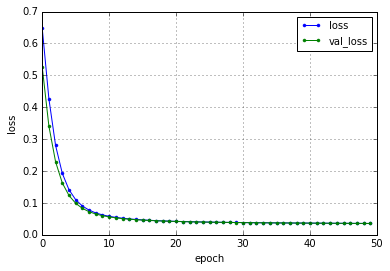

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0834 - val_loss: 0.0807
Epoch 2/50
0s - loss: 0.0792 - val_loss: 0.0779
Epoch 3/50
1s - loss: 0.0766 - val_loss: 0.0752
Epoch 4/50
1s - loss: 0.0737 - val_loss: 0.0721
Epoch 5/50
1s - loss: 0.0704 - val_loss: 0.0686
Epoch 6/50
0s - loss: 0.0667 - val_loss: 0.0648
Epoch 7/50
0s - loss: 0.0628 - val_loss: 0.0609
Epoch 8/50
1s - loss: 0.0589 - val_loss: 0.0570
Epoch 9/50
1s - loss: 0.0551 - val_loss: 0.0532
Epoch 10/50
1s - loss: 0.0515 - val_loss: 0.0498
Epoch 11/50
1s - loss: 0.0482 - val_loss: 0.0466
Epoch 12/50
1s - loss: 0.0452 - val_loss: 0.0438
Epoch 13/50
1s - loss: 0.0426 - val_loss: 0.0414
Epoch 14/50
1s - loss: 0.0403 - val_loss: 0.0392
Epoch 15/50
1s - loss: 0.0383 - val_loss: 0.0374
Epoch 16/50
0s - loss: 0.0365 - val_loss: 0.0358
Epoch 17/50
1s - loss: 0.0350 - val_loss: 0.0344
Epoch 18/50
1s - loss: 0.0337 - val_loss: 0.0332
Epoch 19/50
1s - loss: 0.0326 - val_loss: 0.0321
Epoch 20/50


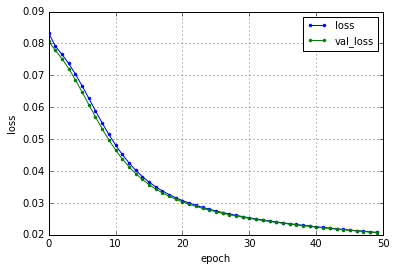

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0616 - val_loss: 0.0272
Epoch 2/50
0s - loss: 0.0240 - val_loss: 0.0213
Epoch 3/50
1s - loss: 0.0199 - val_loss: 0.0170
Epoch 4/50
0s - loss: 0.0167 - val_loss: 0.0146
Epoch 5/50
0s - loss: 0.0151 - val_loss: 0.0132
Epoch 6/50
0s - loss: 0.0139 - val_loss: 0.0120
Epoch 7/50
1s - loss: 0.0129 - val_loss: 0.0114
Epoch 8/50
0s - loss: 0.0122 - val_loss: 0.0112
Epoch 9/50
1s - loss: 0.0118 - val_loss: 0.0103
Epoch 10/50
0s - loss: 0.0112 - val_loss: 0.0117
Epoch 11/50
1s - loss: 0.0107 - val_loss: 0.0118
Epoch 12/50
1s - loss: 0.0106 - val_loss: 0.0088
Epoch 13/50
0s - loss: 0.0101 - val_loss: 0.0102
Epoch 14/50
1s - loss: 0.0101 - val_loss: 0.0083
Epoch 15/50
1s - loss: 0.0095 - val_loss: 0.0095
Epoch 16/50
1s - loss: 0.0093 - val_loss: 0.0078
Epoch 17/50
1s - loss: 0.0094 - val_loss: 0.0076
Epoch 18/50
0s - loss: 0.0090 - val_loss: 0.0188
Epoch 19/50
0s - loss: 0.0088 - val_loss: 0.0075
Epoch 20/50


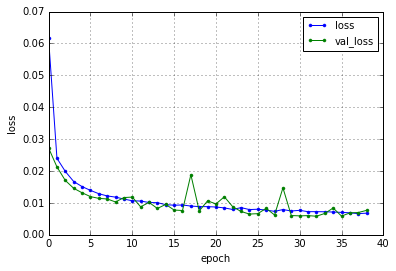

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.1187 - val_loss: 0.0391
Epoch 2/50
1s - loss: 0.0365 - val_loss: 0.0314
Epoch 3/50
1s - loss: 0.0280 - val_loss: 0.0372
Epoch 4/50
1s - loss: 0.0229 - val_loss: 0.0175
Epoch 5/50
1s - loss: 0.0198 - val_loss: 0.0225
Epoch 6/50
1s - loss: 0.0180 - val_loss: 0.0158
Epoch 7/50
1s - loss: 0.0168 - val_loss: 0.0202
Epoch 8/50
1s - loss: 0.0158 - val_loss: 0.0181
Epoch 9/50
0s - loss: 0.0152 - val_loss: 0.0252
Epoch 10/50
1s - loss: 0.0145 - val_loss: 0.0145
Epoch 11/50
1s - loss: 0.0144 - val_loss: 0.0127
Epoch 12/50
1s - loss: 0.0138 - val_loss: 0.0113
Epoch 13/50
0s - loss: 0.0141 - val_loss: 0.0128
Epoch 14/50
1s - loss: 0.0135 - val_loss: 0.0110
Epoch 15/50
1s - loss: 0.0133 - val_loss: 0.0130
Epoch 16/50
1s - loss: 0.0129 - val_loss: 0.0127
Epoch 17/50
1s - loss: 0.0126 - val_loss: 0.0200
Epoch 18/50
1s - loss: 0.0121 - val_loss: 0.0116
Epoch 19/50
0s - loss: 0.0121 - val_loss: 0.0106
Epoch 20/50


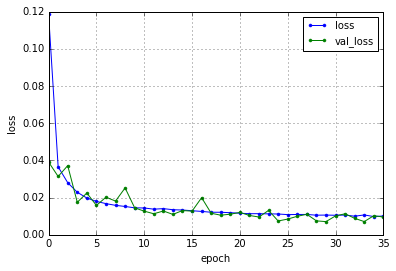

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0294 - val_loss: 0.0160
Epoch 2/50
1s - loss: 0.0129 - val_loss: 0.0108
Epoch 3/50
2s - loss: 0.0097 - val_loss: 0.0087
Epoch 4/50
1s - loss: 0.0082 - val_loss: 0.0075
Epoch 5/50
1s - loss: 0.0072 - val_loss: 0.0070
Epoch 6/50
1s - loss: 0.0064 - val_loss: 0.0072
Epoch 7/50
1s - loss: 0.0059 - val_loss: 0.0054
Epoch 8/50
1s - loss: 0.0054 - val_loss: 0.0051
Epoch 9/50
1s - loss: 0.0051 - val_loss: 0.0050
Epoch 10/50
1s - loss: 0.0049 - val_loss: 0.0050
Epoch 11/50
1s - loss: 0.0047 - val_loss: 0.0045
Epoch 12/50
1s - loss: 0.0045 - val_loss: 0.0058
Epoch 13/50
1s - loss: 0.0044 - val_loss: 0.0045
Epoch 14/50
1s - loss: 0.0043 - val_loss: 0.0044
Epoch 15/50
1s - loss: 0.0041 - val_loss: 0.0042
Epoch 16/50
0s - loss: 0.0041 - val_loss: 0.0039
Epoch 17/50
1s - loss: 0.0039 - val_loss: 0.0055
Epoch 18/50
1s - loss: 0.0039 - val_loss: 0.0036
Epoch 19/50
0s - loss: 0.0037 - val_loss: 0.0042
Epoch 20/50


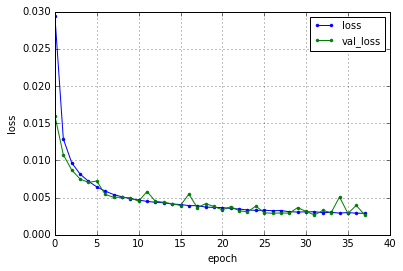

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0398 - val_loss: 0.0198
Epoch 2/50
0s - loss: 0.0165 - val_loss: 0.0132
Epoch 3/50
1s - loss: 0.0114 - val_loss: 0.0098
Epoch 4/50
1s - loss: 0.0086 - val_loss: 0.0075
Epoch 5/50
1s - loss: 0.0068 - val_loss: 0.0061
Epoch 6/50
1s - loss: 0.0055 - val_loss: 0.0059
Epoch 7/50
0s - loss: 0.0050 - val_loss: 0.0053
Epoch 8/50
0s - loss: 0.0044 - val_loss: 0.0052
Epoch 9/50
0s - loss: 0.0041 - val_loss: 0.0041
Epoch 10/50
1s - loss: 0.0038 - val_loss: 0.0037
Epoch 11/50
1s - loss: 0.0036 - val_loss: 0.0057
Epoch 12/50
1s - loss: 0.0037 - val_loss: 0.0032
Epoch 13/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 14/50
0s - loss: 0.0034 - val_loss: 0.0031
Epoch 15/50
0s - loss: 0.0034 - val_loss: 0.0041
Epoch 16/50
0s - loss: 0.0033 - val_loss: 0.0031
Epoch 17/50
1s - loss: 0.0033 - val_loss: 0.0031
Epoch 18/50
0s - loss: 0.0032 - val_loss: 0.0030
Epoch 19/50
1s - loss: 0.0032 - val_loss: 0.0030
Epoch 20/50


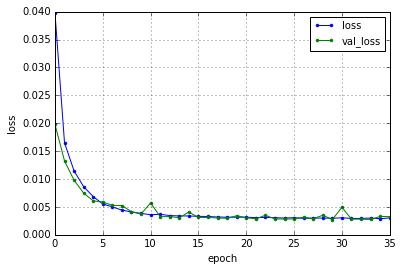

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0630 - val_loss: 0.0325
Epoch 2/50
1s - loss: 0.0244 - val_loss: 0.0174
Epoch 3/50
1s - loss: 0.0145 - val_loss: 0.0120
Epoch 4/50
1s - loss: 0.0105 - val_loss: 0.0082
Epoch 5/50
1s - loss: 0.0077 - val_loss: 0.0067
Epoch 6/50
1s - loss: 0.0062 - val_loss: 0.0049
Epoch 7/50
1s - loss: 0.0047 - val_loss: 0.0040
Epoch 8/50
1s - loss: 0.0042 - val_loss: 0.0035
Epoch 9/50
1s - loss: 0.0035 - val_loss: 0.0057
Epoch 10/50
1s - loss: 0.0033 - val_loss: 0.0033
Epoch 11/50
1s - loss: 0.0029 - val_loss: 0.0027
Epoch 12/50
1s - loss: 0.0029 - val_loss: 0.0027
Epoch 13/50
1s - loss: 0.0028 - val_loss: 0.0022
Epoch 14/50
1s - loss: 0.0025 - val_loss: 0.0022
Epoch 15/50
1s - loss: 0.0025 - val_loss: 0.0020
Epoch 16/50
1s - loss: 0.0023 - val_loss: 0.0023
Epoch 17/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 18/50
1s - loss: 0.0022 - val_loss: 0.0025
Epoch 19/50
1s - loss: 0.0022 - val_loss: 0.0020
Epoch 20/50


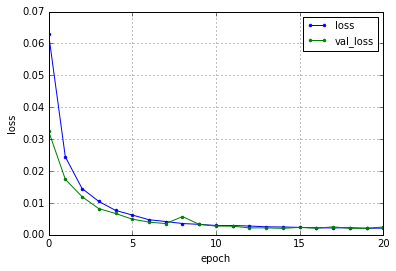

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0145 - val_loss: 0.0068
Epoch 2/50
1s - loss: 0.0056 - val_loss: 0.0044
Epoch 3/50
1s - loss: 0.0038 - val_loss: 0.0033
Epoch 4/50
1s - loss: 0.0030 - val_loss: 0.0026
Epoch 5/50
1s - loss: 0.0025 - val_loss: 0.0028
Epoch 6/50
1s - loss: 0.0023 - val_loss: 0.0020
Epoch 7/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 8/50
0s - loss: 0.0019 - val_loss: 0.0017
Epoch 9/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 10/50
1s - loss: 0.0019 - val_loss: 0.0016
Epoch 11/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 12/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 13/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 14/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 15/50
0s - loss: 0.0016 - val_loss: 0.0014
Epoch 16/50
1s - loss: 0.0015 - val_loss: 0.0017
Epoch 17/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 18/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 19/50
0s - loss: 0.0015 - val_loss: 0.0016
Epoch 20/50


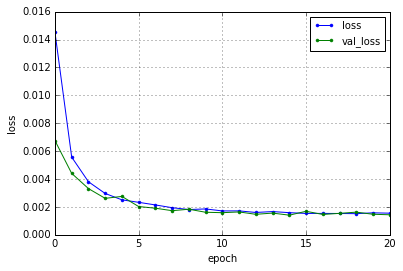

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0394 - val_loss: 0.0164
Epoch 2/50
0s - loss: 0.0132 - val_loss: 0.0109
Epoch 3/50
1s - loss: 0.0093 - val_loss: 0.0084
Epoch 4/50
1s - loss: 0.0074 - val_loss: 0.0060
Epoch 5/50
1s - loss: 0.0069 - val_loss: 0.0054
Epoch 6/50
1s - loss: 0.0053 - val_loss: 0.0044
Epoch 7/50
1s - loss: 0.0048 - val_loss: 0.0041
Epoch 8/50
1s - loss: 0.0043 - val_loss: 0.0037
Epoch 9/50
1s - loss: 0.0039 - val_loss: 0.0039
Epoch 10/50
1s - loss: 0.0047 - val_loss: 0.0039
Epoch 11/50
1s - loss: 0.0035 - val_loss: 0.0038
Epoch 12/50
1s - loss: 0.0038 - val_loss: 0.0037
Epoch 13/50
1s - loss: 0.0036 - val_loss: 0.0033
Epoch 14/50
1s - loss: 0.0035 - val_loss: 0.0031
Epoch 15/50
1s - loss: 0.0040 - val_loss: 0.0036
Epoch 16/50
1s - loss: 0.0033 - val_loss: 0.0032
Epoch 17/50
1s - loss: 0.0036 - val_loss: 0.0031
Epoch 18/50
1s - loss: 0.0032 - val_loss: 0.0033
Epoch 19/50
1s - loss: 0.0035 - val_loss: 0.0030
Epoch 20/50


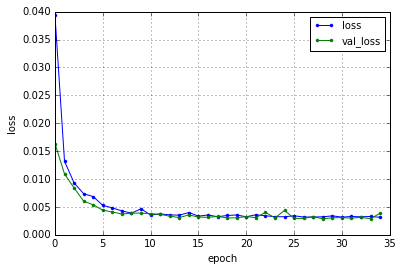

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0743 - val_loss: 0.0264
Epoch 2/50
0s - loss: 0.0190 - val_loss: 0.0152
Epoch 3/50
0s - loss: 0.0126 - val_loss: 0.0098
Epoch 4/50
0s - loss: 0.0087 - val_loss: 0.0069
Epoch 5/50
1s - loss: 0.0071 - val_loss: 0.0055
Epoch 6/50
1s - loss: 0.0056 - val_loss: 0.0044
Epoch 7/50
1s - loss: 0.0049 - val_loss: 0.0039
Epoch 8/50
1s - loss: 0.0043 - val_loss: 0.0034
Epoch 9/50
0s - loss: 0.0040 - val_loss: 0.0045
Epoch 10/50
0s - loss: 0.0037 - val_loss: 0.0034
Epoch 11/50
0s - loss: 0.0032 - val_loss: 0.0029
Epoch 12/50
0s - loss: 0.0030 - val_loss: 0.0026
Epoch 13/50
0s - loss: 0.0031 - val_loss: 0.0022
Epoch 14/50
0s - loss: 0.0030 - val_loss: 0.0036
Epoch 15/50
0s - loss: 0.0027 - val_loss: 0.0021
Epoch 16/50
0s - loss: 0.0027 - val_loss: 0.0020
Epoch 17/50
0s - loss: 0.0023 - val_loss: 0.0020
Epoch 18/50
0s - loss: 0.0024 - val_loss: 0.0037
Epoch 19/50
0s - loss: 0.0025 - val_loss: 0.0018
Epoch 20/50


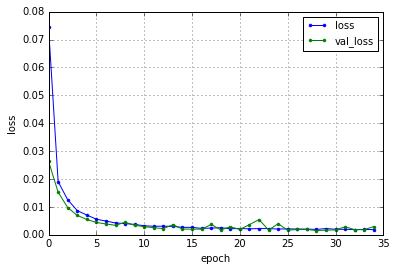

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0134 - val_loss: 0.0058
Epoch 2/50
0s - loss: 0.0045 - val_loss: 0.0037
Epoch 3/50
0s - loss: 0.0033 - val_loss: 0.0028
Epoch 4/50
1s - loss: 0.0027 - val_loss: 0.0026
Epoch 5/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 6/50
0s - loss: 0.0021 - val_loss: 0.0019
Epoch 7/50
0s - loss: 0.0021 - val_loss: 0.0026
Epoch 8/50
0s - loss: 0.0023 - val_loss: 0.0018
Epoch 9/50
0s - loss: 0.0020 - val_loss: 0.0017
Epoch 10/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 11/50
0s - loss: 0.0018 - val_loss: 0.0021
Epoch 12/50
0s - loss: 0.0020 - val_loss: 0.0017
Epoch 13/50
0s - loss: 0.0017 - val_loss: 0.0037
Epoch 14/50
0s - loss: 0.0020 - val_loss: 0.0020
Epoch 15/50
0s - loss: 0.0018 - val_loss: 0.0018


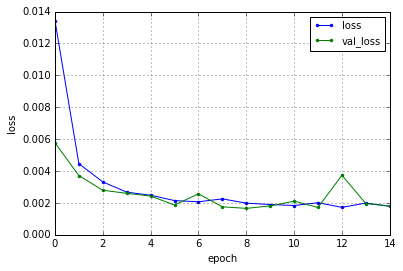

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0316 - val_loss: 0.0179
Epoch 2/50
0s - loss: 0.0162 - val_loss: 0.0143
Epoch 3/50
0s - loss: 0.0131 - val_loss: 0.0117
Epoch 4/50
0s - loss: 0.0114 - val_loss: 0.0231
Epoch 5/50
0s - loss: 0.0104 - val_loss: 0.0123
Epoch 6/50
0s - loss: 0.0096 - val_loss: 0.0086
Epoch 7/50
0s - loss: 0.0089 - val_loss: 0.0080
Epoch 8/50
0s - loss: 0.0083 - val_loss: 0.0080
Epoch 9/50
0s - loss: 0.0080 - val_loss: 0.0072
Epoch 10/50
0s - loss: 0.0075 - val_loss: 0.0076
Epoch 11/50
0s - loss: 0.0071 - val_loss: 0.0067
Epoch 12/50
0s - loss: 0.0070 - val_loss: 0.0067
Epoch 13/50
0s - loss: 0.0065 - val_loss: 0.0061
Epoch 14/50
0s - loss: 0.0065 - val_loss: 0.0064
Epoch 15/50
0s - loss: 0.0062 - val_loss: 0.0058
Epoch 16/50
0s - loss: 0.0060 - val_loss: 0.0064
Epoch 17/50
0s - loss: 0.0057 - val_loss: 0.0057
Epoch 18/50
0s - loss: 0.0058 - val_loss: 0.0062
Epoch 19/50
0s - loss: 0.0057 - val_loss: 0.0053
Epoch 20/50


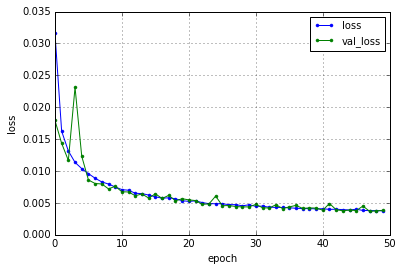

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0552 - val_loss: 0.0308
Epoch 2/50
0s - loss: 0.0275 - val_loss: 0.0207
Epoch 3/50
0s - loss: 0.0200 - val_loss: 0.0166
Epoch 4/50
0s - loss: 0.0165 - val_loss: 0.0197
Epoch 5/50
0s - loss: 0.0148 - val_loss: 0.0199
Epoch 6/50
0s - loss: 0.0133 - val_loss: 0.0120
Epoch 7/50
0s - loss: 0.0119 - val_loss: 0.0135
Epoch 8/50
0s - loss: 0.0111 - val_loss: 0.0095
Epoch 9/50
0s - loss: 0.0103 - val_loss: 0.0097
Epoch 10/50
0s - loss: 0.0097 - val_loss: 0.0084
Epoch 11/50
0s - loss: 0.0090 - val_loss: 0.0080
Epoch 12/50
0s - loss: 0.0085 - val_loss: 0.0080
Epoch 13/50
0s - loss: 0.0082 - val_loss: 0.0100
Epoch 14/50
0s - loss: 0.0077 - val_loss: 0.0072
Epoch 15/50
0s - loss: 0.0076 - val_loss: 0.0066
Epoch 16/50
0s - loss: 0.0072 - val_loss: 0.0064
Epoch 17/50
0s - loss: 0.0069 - val_loss: 0.0070
Epoch 18/50
0s - loss: 0.0066 - val_loss: 0.0084
Epoch 19/50
0s - loss: 0.0065 - val_loss: 0.0059
Epoch 20/50


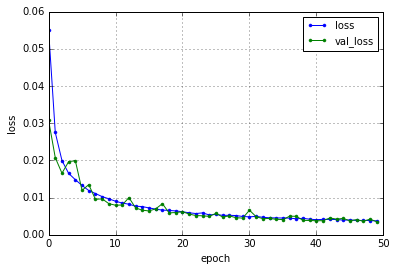

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0110 - val_loss: 0.0058
Epoch 2/50
0s - loss: 0.0054 - val_loss: 0.0049
Epoch 3/50
0s - loss: 0.0044 - val_loss: 0.0044
Epoch 4/50
0s - loss: 0.0040 - val_loss: 0.0044
Epoch 5/50
0s - loss: 0.0035 - val_loss: 0.0042
Epoch 6/50
0s - loss: 0.0032 - val_loss: 0.0030
Epoch 7/50
0s - loss: 0.0029 - val_loss: 0.0027
Epoch 8/50
0s - loss: 0.0028 - val_loss: 0.0026
Epoch 9/50
0s - loss: 0.0026 - val_loss: 0.0025
Epoch 10/50
0s - loss: 0.0025 - val_loss: 0.0043
Epoch 11/50
0s - loss: 0.0024 - val_loss: 0.0022
Epoch 12/50
0s - loss: 0.0023 - val_loss: 0.0023
Epoch 13/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 14/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 15/50
0s - loss: 0.0021 - val_loss: 0.0021
Epoch 16/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 17/50
0s - loss: 0.0021 - val_loss: 0.0021
Epoch 18/50
0s - loss: 0.0020 - val_loss: 0.0029
Epoch 19/50
0s - loss: 0.0020 - val_loss: 0.0020
Epoch 20/50


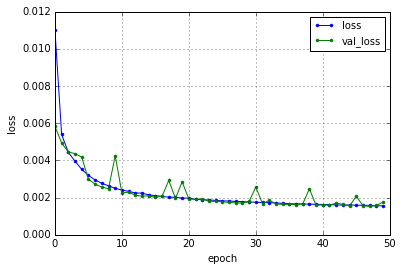

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0371 - val_loss: 0.0173
Epoch 2/50
0s - loss: 0.0174 - val_loss: 0.0113
Epoch 3/50
0s - loss: 0.0148 - val_loss: 0.0099
Epoch 4/50
0s - loss: 0.0136 - val_loss: 0.0091
Epoch 5/50
0s - loss: 0.0126 - val_loss: 0.0213
Epoch 6/50
0s - loss: 0.0120 - val_loss: 0.0080
Epoch 7/50
0s - loss: 0.0114 - val_loss: 0.0267
Epoch 8/50
0s - loss: 0.0111 - val_loss: 0.0079
Epoch 9/50
0s - loss: 0.0109 - val_loss: 0.0093
Epoch 10/50
0s - loss: 0.0106 - val_loss: 0.0152
Epoch 11/50
0s - loss: 0.0104 - val_loss: 0.0278
Epoch 12/50
0s - loss: 0.0102 - val_loss: 0.0097
Epoch 13/50
0s - loss: 0.0101 - val_loss: 0.0093
Epoch 14/50
0s - loss: 0.0099 - val_loss: 0.0091


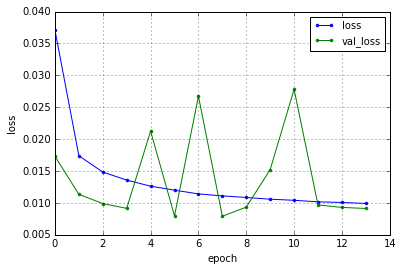

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0672 - val_loss: 0.0639
Epoch 2/50
0s - loss: 0.0269 - val_loss: 0.0349
Epoch 3/50
0s - loss: 0.0225 - val_loss: 0.0177
Epoch 4/50
0s - loss: 0.0209 - val_loss: 0.0225
Epoch 5/50
0s - loss: 0.0199 - val_loss: 0.0224
Epoch 6/50
0s - loss: 0.0192 - val_loss: 0.0169
Epoch 7/50
0s - loss: 0.0185 - val_loss: 0.0129
Epoch 8/50
0s - loss: 0.0178 - val_loss: 0.0272
Epoch 9/50
0s - loss: 0.0174 - val_loss: 0.0529
Epoch 10/50
0s - loss: 0.0169 - val_loss: 0.0182
Epoch 11/50
0s - loss: 0.0165 - val_loss: 0.0105
Epoch 12/50
0s - loss: 0.0158 - val_loss: 0.0139
Epoch 13/50
0s - loss: 0.0156 - val_loss: 0.0099
Epoch 14/50
0s - loss: 0.0151 - val_loss: 0.0101
Epoch 15/50
0s - loss: 0.0147 - val_loss: 0.0184
Epoch 16/50
0s - loss: 0.0146 - val_loss: 0.0163
Epoch 17/50
0s - loss: 0.0143 - val_loss: 0.0166
Epoch 18/50
0s - loss: 0.0140 - val_loss: 0.0152
Epoch 19/50
0s - loss: 0.0139 - val_loss: 0.0128


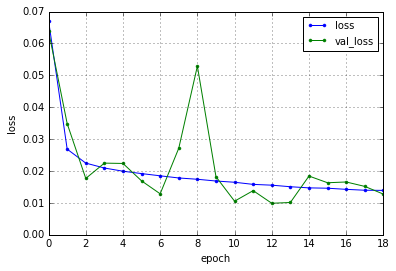

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0126 - val_loss: 0.0062
Epoch 2/50
0s - loss: 0.0060 - val_loss: 0.0046
Epoch 3/50
0s - loss: 0.0053 - val_loss: 0.0034
Epoch 4/50
0s - loss: 0.0050 - val_loss: 0.0034
Epoch 5/50
0s - loss: 0.0049 - val_loss: 0.0031
Epoch 6/50
0s - loss: 0.0047 - val_loss: 0.0029
Epoch 7/50
0s - loss: 0.0047 - val_loss: 0.0047
Epoch 8/50
0s - loss: 0.0047 - val_loss: 0.0052
Epoch 9/50
0s - loss: 0.0045 - val_loss: 0.0035
Epoch 10/50
0s - loss: 0.0045 - val_loss: 0.0029
Epoch 11/50
0s - loss: 0.0045 - val_loss: 0.0048
Epoch 12/50
0s - loss: 0.0044 - val_loss: 0.0051
Epoch 13/50
0s - loss: 0.0044 - val_loss: 0.0163
Epoch 14/50
0s - loss: 0.0043 - val_loss: 0.0030
Epoch 15/50
0s - loss: 0.0044 - val_loss: 0.0041
Epoch 16/50
0s - loss: 0.0043 - val_loss: 0.0031


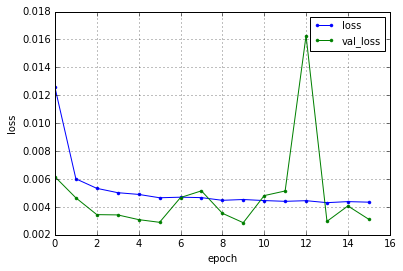

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0350 - val_loss: 0.0156
Epoch 2/50
0s - loss: 0.0179 - val_loss: 0.0188
Epoch 3/50
0s - loss: 0.0133 - val_loss: 0.0094
Epoch 4/50
0s - loss: 0.0121 - val_loss: 0.0079
Epoch 5/50
0s - loss: 0.0102 - val_loss: 0.0079
Epoch 6/50
0s - loss: 0.0096 - val_loss: 0.0159
Epoch 7/50
0s - loss: 0.0091 - val_loss: 0.0067
Epoch 8/50
0s - loss: 0.0086 - val_loss: 0.0136
Epoch 9/50
0s - loss: 0.0083 - val_loss: 0.0081
Epoch 10/50
0s - loss: 0.0080 - val_loss: 0.0078
Epoch 11/50
0s - loss: 0.0078 - val_loss: 0.0057
Epoch 12/50
0s - loss: 0.0076 - val_loss: 0.0072
Epoch 13/50
0s - loss: 0.0073 - val_loss: 0.0053
Epoch 14/50
0s - loss: 0.0071 - val_loss: 0.0063
Epoch 15/50
0s - loss: 0.0070 - val_loss: 0.0050
Epoch 16/50
0s - loss: 0.0068 - val_loss: 0.0098
Epoch 17/50
0s - loss: 0.0069 - val_loss: 0.0050
Epoch 18/50
0s - loss: 0.0065 - val_loss: 0.0046
Epoch 19/50
0s - loss: 0.0062 - val_loss: 0.0047
Epoch 20/50


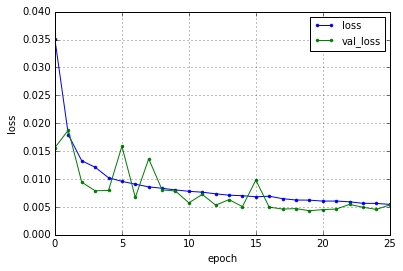

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0700 - val_loss: 0.0352
Epoch 2/50
0s - loss: 0.0288 - val_loss: 0.0905
Epoch 3/50
0s - loss: 0.0239 - val_loss: 0.0273
Epoch 4/50
0s - loss: 0.0187 - val_loss: 0.0136
Epoch 5/50
0s - loss: 0.0170 - val_loss: 0.0183
Epoch 6/50
0s - loss: 0.0148 - val_loss: 0.0347
Epoch 7/50
0s - loss: 0.0135 - val_loss: 0.0093
Epoch 8/50
0s - loss: 0.0123 - val_loss: 0.0134
Epoch 9/50
0s - loss: 0.0112 - val_loss: 0.0076
Epoch 10/50
0s - loss: 0.0108 - val_loss: 0.0070
Epoch 11/50
0s - loss: 0.0100 - val_loss: 0.0071
Epoch 12/50
0s - loss: 0.0097 - val_loss: 0.0092
Epoch 13/50
0s - loss: 0.0093 - val_loss: 0.0069
Epoch 14/50
0s - loss: 0.0088 - val_loss: 0.0106
Epoch 15/50
0s - loss: 0.0084 - val_loss: 0.0087
Epoch 16/50
0s - loss: 0.0080 - val_loss: 0.0048
Epoch 17/50
0s - loss: 0.0080 - val_loss: 0.0238
Epoch 18/50
0s - loss: 0.0075 - val_loss: 0.0045
Epoch 19/50
0s - loss: 0.0064 - val_loss: 0.0049
Epoch 20/50


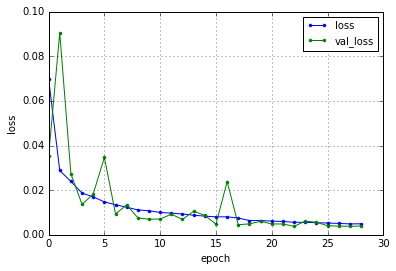

hiden node = 16
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0120 - val_loss: 0.0052
Epoch 2/50
0s - loss: 0.0064 - val_loss: 0.0045
Epoch 3/50
0s - loss: 0.0057 - val_loss: 0.0041
Epoch 4/50
0s - loss: 0.0050 - val_loss: 0.0031
Epoch 5/50
0s - loss: 0.0044 - val_loss: 0.0032
Epoch 6/50
0s - loss: 0.0044 - val_loss: 0.0027
Epoch 7/50
0s - loss: 0.0039 - val_loss: 0.0119
Epoch 8/50
0s - loss: 0.0041 - val_loss: 0.0037
Epoch 9/50
0s - loss: 0.0035 - val_loss: 0.0023
Epoch 10/50
0s - loss: 0.0034 - val_loss: 0.0021
Epoch 11/50
0s - loss: 0.0032 - val_loss: 0.0027
Epoch 12/50
0s - loss: 0.0030 - val_loss: 0.0024
Epoch 13/50
0s - loss: 0.0025 - val_loss: 0.0035
Epoch 14/50
0s - loss: 0.0025 - val_loss: 0.0020
Epoch 15/50
0s - loss: 0.0022 - val_loss: 0.0089
Epoch 16/50
0s - loss: 0.0024 - val_loss: 0.0016
Epoch 17/50
0s - loss: 0.0026 - val_loss: 0.0032
Epoch 18/50
0s - loss: 0.0020 - val_loss: 0.0016
Epoch 19/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 20/50


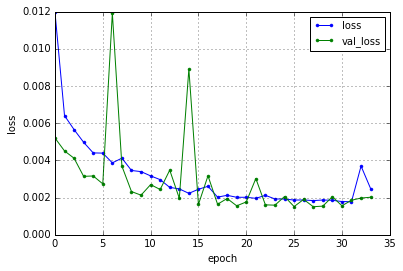

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15858
SourceData's aborting data = 6
window shape is (15858, 1024, 3)
(15858, 1024, 3)
hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.2943 - val_loss: 0.2847
Epoch 2/50
1s - loss: 0.2735 - val_loss: 0.2615
Epoch 3/50
1s - loss: 0.2490 - val_loss: 0.2363
Epoch 4/50
1s - loss: 0.2241 - val_loss: 0.2122
Epoch 5/50
1s - loss: 0.2011 - val_loss: 0.1906
Epoch 6/50
1s - loss: 0.1811 - val_loss: 0.1721
Epoch 7/50
1s - loss: 0.1641 - val_loss: 0.1565
Epoch 8/50
1s - loss: 0.1497 - val_loss: 0.1433
Epoch 9/50
1s - loss: 0.1376 - val_loss: 0.1322
Epoch 10/50
1s - loss: 0.1273 - val_loss: 0.1226
Epoch 11/50
1s - loss: 0.1184 - val_loss: 0.1143
Epoch 12/50
1s - loss: 0.1106 - val_loss: 0.1071
Epoch 13/50
1s - loss: 0.1038 - val_loss: 0.1007
Epoch 14/50
1s - loss: 0.0979 - val_loss: 0.0951
Epoch 15/50
1s - loss: 0.0926 - val_loss: 0.0901
Epoch 16/50
1

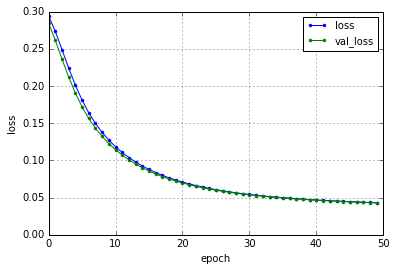

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.6898 - val_loss: 0.6200
Epoch 2/50
1s - loss: 0.5522 - val_loss: 0.4886
Epoch 3/50
1s - loss: 0.4359 - val_loss: 0.3878
Epoch 4/50
1s - loss: 0.3484 - val_loss: 0.3125
Epoch 5/50
1s - loss: 0.2832 - val_loss: 0.2563
Epoch 6/50
1s - loss: 0.2342 - val_loss: 0.2140
Epoch 7/50
1s - loss: 0.1971 - val_loss: 0.1815
Epoch 8/50
1s - loss: 0.1684 - val_loss: 0.1563
Epoch 9/50
1s - loss: 0.1461 - val_loss: 0.1366
Epoch 10/50
1s - loss: 0.1286 - val_loss: 0.1211
Epoch 11/50
1s - loss: 0.1148 - val_loss: 0.1089
Epoch 12/50
1s - loss: 0.1038 - val_loss: 0.0991
Epoch 13/50
1s - loss: 0.0950 - val_loss: 0.0912
Epoch 14/50
1s - loss: 0.0879 - val_loss: 0.0848
Epoch 15/50
1s - loss: 0.0821 - val_loss: 0.0795
Epoch 16/50
1s - loss: 0.0773 - val_loss: 0.0752
Epoch 17/50
1s - loss: 0.0733 - val_loss: 0.0715
Epoch 18/50
1s - loss: 0.0699 - val_loss: 0.0684
Epoch 19/50
1s - loss: 0.0671 - val_loss: 0.0658
Epoch 20/50


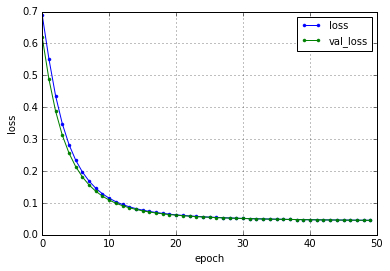

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0841 - val_loss: 0.0829
Epoch 2/50
1s - loss: 0.0822 - val_loss: 0.0816
Epoch 3/50
1s - loss: 0.0812 - val_loss: 0.0807
Epoch 4/50
1s - loss: 0.0802 - val_loss: 0.0796
Epoch 5/50
1s - loss: 0.0791 - val_loss: 0.0784
Epoch 6/50
1s - loss: 0.0778 - val_loss: 0.0771
Epoch 7/50
1s - loss: 0.0763 - val_loss: 0.0755
Epoch 8/50
1s - loss: 0.0746 - val_loss: 0.0737
Epoch 9/50
1s - loss: 0.0728 - val_loss: 0.0718
Epoch 10/50
1s - loss: 0.0709 - val_loss: 0.0699
Epoch 11/50
1s - loss: 0.0689 - val_loss: 0.0678
Epoch 12/50
1s - loss: 0.0668 - val_loss: 0.0658
Epoch 13/50
1s - loss: 0.0648 - val_loss: 0.0637
Epoch 14/50
1s - loss: 0.0627 - val_loss: 0.0617
Epoch 15/50
1s - loss: 0.0608 - val_loss: 0.0598
Epoch 16/50
1s - loss: 0.0589 - val_loss: 0.0579
Epoch 17/50
1s - loss: 0.0571 - val_loss: 0.0562
Epoch 18/50
1s - loss: 0.0554 - val_loss: 0.0545
Epoch 19/50
1s - loss: 0.0538 - val_loss: 0.0530
Epoch 20/50


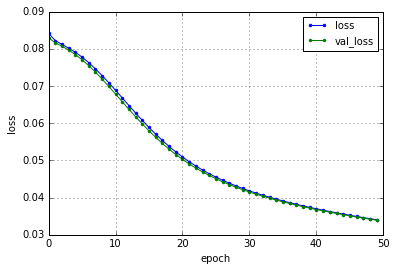

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0745 - val_loss: 0.0396
Epoch 2/50
1s - loss: 0.0329 - val_loss: 0.0295
Epoch 3/50
1s - loss: 0.0288 - val_loss: 0.0257
Epoch 4/50
1s - loss: 0.0255 - val_loss: 0.0251
Epoch 5/50
1s - loss: 0.0238 - val_loss: 0.0214
Epoch 6/50
1s - loss: 0.0225 - val_loss: 0.0218
Epoch 7/50
1s - loss: 0.0213 - val_loss: 0.0237
Epoch 8/50
1s - loss: 0.0206 - val_loss: 0.0221
Epoch 9/50
1s - loss: 0.0197 - val_loss: 0.0190
Epoch 10/50
1s - loss: 0.0191 - val_loss: 0.0197
Epoch 11/50
1s - loss: 0.0186 - val_loss: 0.0247
Epoch 12/50
1s - loss: 0.0183 - val_loss: 0.0165
Epoch 13/50
1s - loss: 0.0178 - val_loss: 0.0234
Epoch 14/50
1s - loss: 0.0180 - val_loss: 0.0225
Epoch 15/50
1s - loss: 0.0174 - val_loss: 0.0147
Epoch 16/50
1s - loss: 0.0167 - val_loss: 0.0143
Epoch 17/50
1s - loss: 0.0165 - val_loss: 0.0263
Epoch 18/50
1s - loss: 0.0159 - val_loss: 0.0200
Epoch 19/50
1s - loss: 0.0158 - val_loss: 0.0137
Epoch 20/50


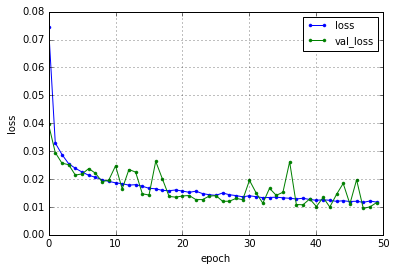

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.1261 - val_loss: 0.0466
Epoch 2/50
1s - loss: 0.0444 - val_loss: 0.0402
Epoch 3/50
1s - loss: 0.0414 - val_loss: 0.0395
Epoch 4/50
1s - loss: 0.0397 - val_loss: 0.0414
Epoch 5/50
1s - loss: 0.0367 - val_loss: 0.0387
Epoch 6/50
1s - loss: 0.0331 - val_loss: 0.0281
Epoch 7/50
1s - loss: 0.0299 - val_loss: 0.0244
Epoch 8/50
1s - loss: 0.0281 - val_loss: 0.0284
Epoch 9/50
1s - loss: 0.0272 - val_loss: 0.0263
Epoch 10/50
1s - loss: 0.0263 - val_loss: 0.0226
Epoch 11/50
1s - loss: 0.0255 - val_loss: 0.0283
Epoch 12/50
1s - loss: 0.0242 - val_loss: 0.0254
Epoch 13/50
1s - loss: 0.0241 - val_loss: 0.0194
Epoch 14/50
1s - loss: 0.0230 - val_loss: 0.0230
Epoch 15/50
1s - loss: 0.0231 - val_loss: 0.0275
Epoch 16/50
1s - loss: 0.0218 - val_loss: 0.0183
Epoch 17/50
1s - loss: 0.0215 - val_loss: 0.0233
Epoch 18/50
1s - loss: 0.0211 - val_loss: 0.0229
Epoch 19/50
1s - loss: 0.0204 - val_loss: 0.0190
Epoch 20/50


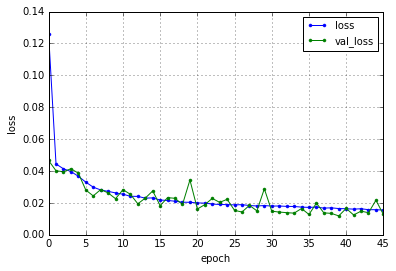

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0408 - val_loss: 0.0261
Epoch 2/50
1s - loss: 0.0216 - val_loss: 0.0184
Epoch 3/50
1s - loss: 0.0166 - val_loss: 0.0151
Epoch 4/50
1s - loss: 0.0141 - val_loss: 0.0131
Epoch 5/50
1s - loss: 0.0125 - val_loss: 0.0117
Epoch 6/50
1s - loss: 0.0114 - val_loss: 0.0110
Epoch 7/50
1s - loss: 0.0105 - val_loss: 0.0101
Epoch 8/50
1s - loss: 0.0098 - val_loss: 0.0093
Epoch 9/50
1s - loss: 0.0093 - val_loss: 0.0091
Epoch 10/50
1s - loss: 0.0089 - val_loss: 0.0085
Epoch 11/50
1s - loss: 0.0085 - val_loss: 0.0080
Epoch 12/50
1s - loss: 0.0082 - val_loss: 0.0085
Epoch 13/50
1s - loss: 0.0079 - val_loss: 0.0075
Epoch 14/50
1s - loss: 0.0076 - val_loss: 0.0092
Epoch 15/50
1s - loss: 0.0074 - val_loss: 0.0070
Epoch 16/50
1s - loss: 0.0073 - val_loss: 0.0070
Epoch 17/50
1s - loss: 0.0071 - val_loss: 0.0071
Epoch 18/50
1s - loss: 0.0069 - val_loss: 0.0064
Epoch 19/50
1s - loss: 0.0068 - val_loss: 0.0069
Epoch 20/50


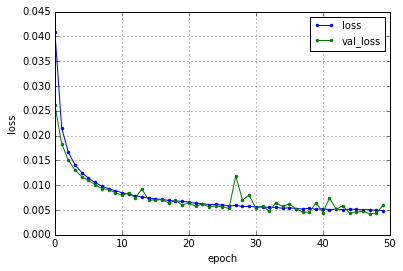

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0402 - val_loss: 0.0263
Epoch 2/50
1s - loss: 0.0196 - val_loss: 0.0165
Epoch 3/50
1s - loss: 0.0152 - val_loss: 0.0131
Epoch 4/50
1s - loss: 0.0116 - val_loss: 0.0111
Epoch 5/50
1s - loss: 0.0098 - val_loss: 0.0085
Epoch 6/50
1s - loss: 0.0085 - val_loss: 0.0080
Epoch 7/50
1s - loss: 0.0077 - val_loss: 0.0070
Epoch 8/50
1s - loss: 0.0070 - val_loss: 0.0087
Epoch 9/50
1s - loss: 0.0070 - val_loss: 0.0063
Epoch 10/50
1s - loss: 0.0066 - val_loss: 0.0067
Epoch 11/50
1s - loss: 0.0070 - val_loss: 0.0061
Epoch 12/50
1s - loss: 0.0063 - val_loss: 0.0064
Epoch 13/50
1s - loss: 0.0065 - val_loss: 0.0075
Epoch 14/50
1s - loss: 0.0063 - val_loss: 0.0058
Epoch 15/50
1s - loss: 0.0060 - val_loss: 0.0057
Epoch 16/50
1s - loss: 0.0063 - val_loss: 0.0060
Epoch 17/50
1s - loss: 0.0059 - val_loss: 0.0060
Epoch 18/50
1s - loss: 0.0062 - val_loss: 0.0059
Epoch 19/50
1s - loss: 0.0057 - val_loss: 0.0057
Epoch 20/50


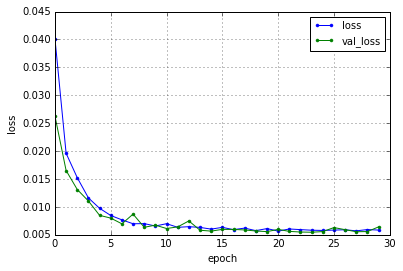

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0739 - val_loss: 0.0387
Epoch 2/50
1s - loss: 0.0328 - val_loss: 0.0248
Epoch 3/50
1s - loss: 0.0211 - val_loss: 0.0181
Epoch 4/50
1s - loss: 0.0157 - val_loss: 0.0137
Epoch 5/50
1s - loss: 0.0117 - val_loss: 0.0097
Epoch 6/50
1s - loss: 0.0093 - val_loss: 0.0082
Epoch 7/50
1s - loss: 0.0081 - val_loss: 0.0065
Epoch 8/50
1s - loss: 0.0068 - val_loss: 0.0068
Epoch 9/50
1s - loss: 0.0064 - val_loss: 0.0083
Epoch 10/50
1s - loss: 0.0061 - val_loss: 0.0051
Epoch 11/50
1s - loss: 0.0057 - val_loss: 0.0047
Epoch 12/50
1s - loss: 0.0052 - val_loss: 0.0100
Epoch 13/50
1s - loss: 0.0051 - val_loss: 0.0056
Epoch 14/50
1s - loss: 0.0051 - val_loss: 0.0049
Epoch 15/50
1s - loss: 0.0049 - val_loss: 0.0050
Epoch 16/50
1s - loss: 0.0048 - val_loss: 0.0043
Epoch 17/50
1s - loss: 0.0044 - val_loss: 0.0039
Epoch 18/50
1s - loss: 0.0045 - val_loss: 0.0040
Epoch 19/50
1s - loss: 0.0047 - val_loss: 0.0042
Epoch 20/50


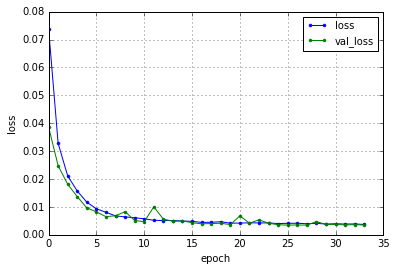

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0164 - val_loss: 0.0086
Epoch 2/50
1s - loss: 0.0071 - val_loss: 0.0059
Epoch 3/50
1s - loss: 0.0053 - val_loss: 0.0057
Epoch 4/50
1s - loss: 0.0045 - val_loss: 0.0040
Epoch 5/50
1s - loss: 0.0038 - val_loss: 0.0034
Epoch 6/50
1s - loss: 0.0038 - val_loss: 0.0033
Epoch 7/50
1s - loss: 0.0036 - val_loss: 0.0032
Epoch 8/50
1s - loss: 0.0032 - val_loss: 0.0031
Epoch 9/50
1s - loss: 0.0033 - val_loss: 0.0043
Epoch 10/50
1s - loss: 0.0032 - val_loss: 0.0029
Epoch 11/50
1s - loss: 0.0032 - val_loss: 0.0029
Epoch 12/50
1s - loss: 0.0031 - val_loss: 0.0032
Epoch 13/50
1s - loss: 0.0031 - val_loss: 0.0034
Epoch 14/50
1s - loss: 0.0032 - val_loss: 0.0028
Epoch 15/50
1s - loss: 0.0030 - val_loss: 0.0033
Epoch 16/50
1s - loss: 0.0031 - val_loss: 0.0029
Epoch 17/50
1s - loss: 0.0030 - val_loss: 0.0029
Epoch 18/50
1s - loss: 0.0031 - val_loss: 0.0029
Epoch 19/50
1s - loss: 0.0030 - val_loss: 0.0030
Epoch 20/50


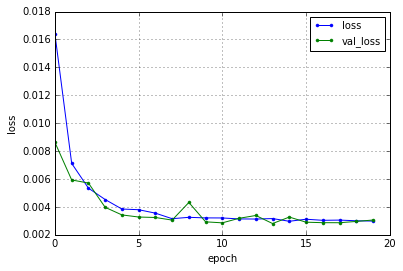

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0441 - val_loss: 0.0214
Epoch 2/50
1s - loss: 0.0176 - val_loss: 0.0147
Epoch 3/50
1s - loss: 0.0133 - val_loss: 0.0112
Epoch 4/50
1s - loss: 0.0108 - val_loss: 0.0092
Epoch 5/50
1s - loss: 0.0099 - val_loss: 0.0119
Epoch 6/50
1s - loss: 0.0086 - val_loss: 0.0099
Epoch 7/50
1s - loss: 0.0083 - val_loss: 0.0127
Epoch 8/50
1s - loss: 0.0073 - val_loss: 0.0066
Epoch 9/50
1s - loss: 0.0074 - val_loss: 0.0066
Epoch 10/50
1s - loss: 0.0071 - val_loss: 0.0066
Epoch 11/50
1s - loss: 0.0069 - val_loss: 0.0113
Epoch 12/50
1s - loss: 0.0073 - val_loss: 0.0061
Epoch 13/50
1s - loss: 0.0067 - val_loss: 0.0061
Epoch 14/50
1s - loss: 0.0073 - val_loss: 0.0071
Epoch 15/50
1s - loss: 0.0072 - val_loss: 0.0076
Epoch 16/50
1s - loss: 0.0066 - val_loss: 0.0060
Epoch 17/50
1s - loss: 0.0068 - val_loss: 0.0084
Epoch 18/50
1s - loss: 0.0065 - val_loss: 0.0061
Epoch 19/50
1s - loss: 0.0069 - val_loss: 0.0061
Epoch 20/50


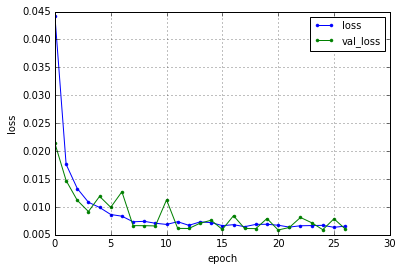

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0809 - val_loss: 0.0354
Epoch 2/50
1s - loss: 0.0283 - val_loss: 0.0198
Epoch 3/50
1s - loss: 0.0188 - val_loss: 0.0149
Epoch 4/50
1s - loss: 0.0143 - val_loss: 0.0111
Epoch 5/50
1s - loss: 0.0115 - val_loss: 0.0102
Epoch 6/50
1s - loss: 0.0100 - val_loss: 0.0080
Epoch 7/50
1s - loss: 0.0086 - val_loss: 0.0084
Epoch 8/50
1s - loss: 0.0077 - val_loss: 0.0089
Epoch 9/50
1s - loss: 0.0078 - val_loss: 0.0065
Epoch 10/50
1s - loss: 0.0064 - val_loss: 0.0063
Epoch 11/50
1s - loss: 0.0061 - val_loss: 0.0121
Epoch 12/50
1s - loss: 0.0062 - val_loss: 0.0048
Epoch 13/50
1s - loss: 0.0062 - val_loss: 0.0049
Epoch 14/50
1s - loss: 0.0058 - val_loss: 0.0045
Epoch 15/50
1s - loss: 0.0053 - val_loss: 0.0050
Epoch 16/50
1s - loss: 0.0057 - val_loss: 0.0068
Epoch 17/50
1s - loss: 0.0052 - val_loss: 0.0045
Epoch 18/50
1s - loss: 0.0050 - val_loss: 0.0042
Epoch 19/50
1s - loss: 0.0049 - val_loss: 0.0042
Epoch 20/50


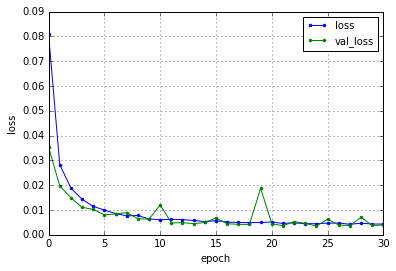

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0165 - val_loss: 0.0078
Epoch 2/50
1s - loss: 0.0069 - val_loss: 0.0091
Epoch 3/50
1s - loss: 0.0052 - val_loss: 0.0047
Epoch 4/50
1s - loss: 0.0048 - val_loss: 0.0043
Epoch 5/50
1s - loss: 0.0045 - val_loss: 0.0042
Epoch 6/50
1s - loss: 0.0041 - val_loss: 0.0037
Epoch 7/50
1s - loss: 0.0041 - val_loss: 0.0039
Epoch 8/50
1s - loss: 0.0037 - val_loss: 0.0031
Epoch 9/50
1s - loss: 0.0039 - val_loss: 0.0033
Epoch 10/50
1s - loss: 0.0036 - val_loss: 0.0033
Epoch 11/50
1s - loss: 0.0037 - val_loss: 0.0030
Epoch 12/50
1s - loss: 0.0040 - val_loss: 0.0036
Epoch 13/50
1s - loss: 0.0037 - val_loss: 0.0033
Epoch 14/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 15/50
1s - loss: 0.0038 - val_loss: 0.0032
Epoch 16/50
1s - loss: 0.0040 - val_loss: 0.0038
Epoch 17/50
1s - loss: 0.0035 - val_loss: 0.0030
Epoch 18/50
1s - loss: 0.0037 - val_loss: 0.0030
Epoch 19/50
1s - loss: 0.0036 - val_loss: 0.0030
Epoch 20/50


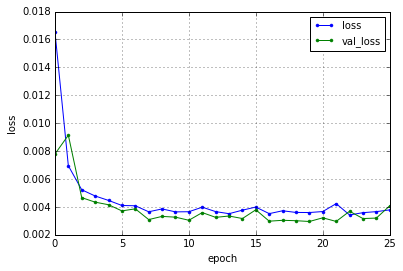

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0380 - val_loss: 0.0226
Epoch 2/50
1s - loss: 0.0217 - val_loss: 0.0206
Epoch 3/50
1s - loss: 0.0181 - val_loss: 0.0165
Epoch 4/50
1s - loss: 0.0162 - val_loss: 0.0178
Epoch 5/50
1s - loss: 0.0148 - val_loss: 0.0146
Epoch 6/50
1s - loss: 0.0139 - val_loss: 0.0121
Epoch 7/50
1s - loss: 0.0127 - val_loss: 0.0141
Epoch 8/50
1s - loss: 0.0121 - val_loss: 0.0108
Epoch 9/50
1s - loss: 0.0118 - val_loss: 0.0103
Epoch 10/50
1s - loss: 0.0111 - val_loss: 0.0105
Epoch 11/50
1s - loss: 0.0108 - val_loss: 0.0097
Epoch 12/50
1s - loss: 0.0105 - val_loss: 0.0094
Epoch 13/50
1s - loss: 0.0101 - val_loss: 0.0138
Epoch 14/50
1s - loss: 0.0101 - val_loss: 0.0091
Epoch 15/50
1s - loss: 0.0095 - val_loss: 0.0090
Epoch 16/50
1s - loss: 0.0095 - val_loss: 0.0085
Epoch 17/50
1s - loss: 0.0091 - val_loss: 0.0084
Epoch 18/50
1s - loss: 0.0089 - val_loss: 0.0088
Epoch 19/50
1s - loss: 0.0089 - val_loss: 0.0081
Epoch 20/50


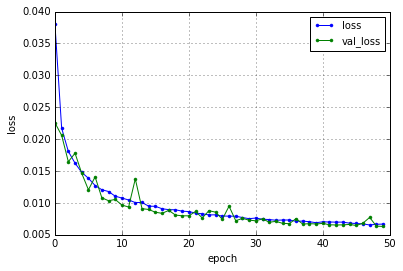

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0715 - val_loss: 0.0402
Epoch 2/50
1s - loss: 0.0399 - val_loss: 0.0337
Epoch 3/50
1s - loss: 0.0336 - val_loss: 0.0286
Epoch 4/50
1s - loss: 0.0276 - val_loss: 0.0226
Epoch 5/50
1s - loss: 0.0238 - val_loss: 0.0206
Epoch 6/50
1s - loss: 0.0214 - val_loss: 0.0210
Epoch 7/50
1s - loss: 0.0200 - val_loss: 0.0191
Epoch 8/50
1s - loss: 0.0183 - val_loss: 0.0237
Epoch 9/50
1s - loss: 0.0172 - val_loss: 0.0155
Epoch 10/50
1s - loss: 0.0162 - val_loss: 0.0140
Epoch 11/50
1s - loss: 0.0153 - val_loss: 0.0135
Epoch 12/50
1s - loss: 0.0146 - val_loss: 0.0130
Epoch 13/50
1s - loss: 0.0139 - val_loss: 0.0147
Epoch 14/50
1s - loss: 0.0135 - val_loss: 0.0173
Epoch 15/50
1s - loss: 0.0129 - val_loss: 0.0115
Epoch 16/50
1s - loss: 0.0123 - val_loss: 0.0118
Epoch 17/50
1s - loss: 0.0120 - val_loss: 0.0140
Epoch 18/50
1s - loss: 0.0119 - val_loss: 0.0105
Epoch 19/50
1s - loss: 0.0114 - val_loss: 0.0151
Epoch 20/50


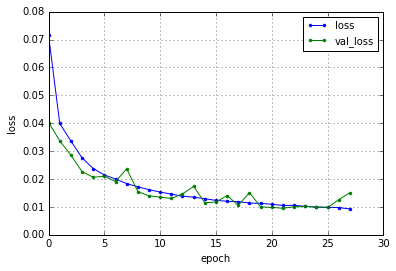

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0161 - val_loss: 0.0115
Epoch 2/50
1s - loss: 0.0086 - val_loss: 0.0082
Epoch 3/50
1s - loss: 0.0070 - val_loss: 0.0061
Epoch 4/50
1s - loss: 0.0060 - val_loss: 0.0053
Epoch 5/50
1s - loss: 0.0054 - val_loss: 0.0048
Epoch 6/50
1s - loss: 0.0050 - val_loss: 0.0047
Epoch 7/50
1s - loss: 0.0049 - val_loss: 0.0046
Epoch 8/50
1s - loss: 0.0045 - val_loss: 0.0042
Epoch 9/50
1s - loss: 0.0044 - val_loss: 0.0041
Epoch 10/50
1s - loss: 0.0043 - val_loss: 0.0061
Epoch 11/50
1s - loss: 0.0042 - val_loss: 0.0038
Epoch 12/50
1s - loss: 0.0040 - val_loss: 0.0038
Epoch 13/50
1s - loss: 0.0040 - val_loss: 0.0039
Epoch 14/50
1s - loss: 0.0038 - val_loss: 0.0043
Epoch 15/50
1s - loss: 0.0037 - val_loss: 0.0035
Epoch 16/50
1s - loss: 0.0037 - val_loss: 0.0034
Epoch 17/50
1s - loss: 0.0036 - val_loss: 0.0038
Epoch 18/50
1s - loss: 0.0035 - val_loss: 0.0034
Epoch 19/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 20/50


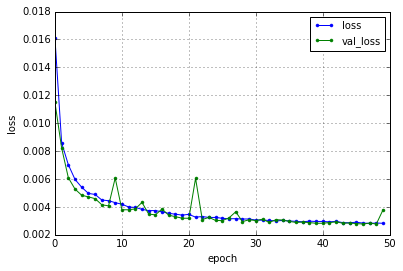

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0455 - val_loss: 0.0521
Epoch 2/50
1s - loss: 0.0282 - val_loss: 0.0656
Epoch 3/50
1s - loss: 0.0250 - val_loss: 0.0229
Epoch 4/50
1s - loss: 0.0232 - val_loss: 0.0148
Epoch 5/50
1s - loss: 0.0218 - val_loss: 0.0170
Epoch 6/50
1s - loss: 0.0206 - val_loss: 0.0149
Epoch 7/50
1s - loss: 0.0198 - val_loss: 0.0267
Epoch 8/50
1s - loss: 0.0193 - val_loss: 0.0257
Epoch 9/50
1s - loss: 0.0186 - val_loss: 0.0242
Epoch 10/50
1s - loss: 0.0182 - val_loss: 0.0271


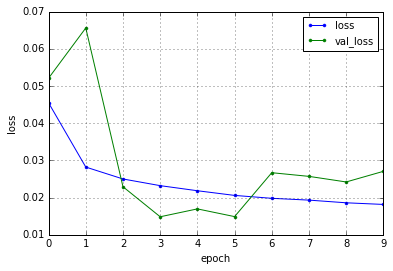

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0846 - val_loss: 0.0583
Epoch 2/50
1s - loss: 0.0439 - val_loss: 0.0374
Epoch 3/50
1s - loss: 0.0381 - val_loss: 0.0746
Epoch 4/50
1s - loss: 0.0360 - val_loss: 0.0344
Epoch 5/50
1s - loss: 0.0343 - val_loss: 0.0239
Epoch 6/50
1s - loss: 0.0324 - val_loss: 0.0248
Epoch 7/50
1s - loss: 0.0313 - val_loss: 0.0292
Epoch 8/50
1s - loss: 0.0295 - val_loss: 0.0415
Epoch 9/50
1s - loss: 0.0283 - val_loss: 0.0351
Epoch 10/50
1s - loss: 0.0272 - val_loss: 0.0237
Epoch 11/50
1s - loss: 0.0264 - val_loss: 0.0217
Epoch 12/50
1s - loss: 0.0251 - val_loss: 0.0471
Epoch 13/50
1s - loss: 0.0246 - val_loss: 0.0204
Epoch 14/50
1s - loss: 0.0238 - val_loss: 0.0367
Epoch 15/50
1s - loss: 0.0236 - val_loss: 0.0179
Epoch 16/50
1s - loss: 0.0231 - val_loss: 0.0765
Epoch 17/50
1s - loss: 0.0227 - val_loss: 0.0242
Epoch 18/50
1s - loss: 0.0224 - val_loss: 0.0142
Epoch 19/50
1s - loss: 0.0221 - val_loss: 0.0239
Epoch 20/50


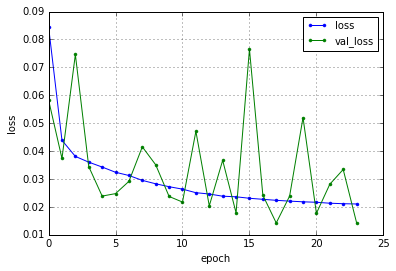

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0170 - val_loss: 0.0093
Epoch 2/50
1s - loss: 0.0100 - val_loss: 0.0070
Epoch 3/50
1s - loss: 0.0091 - val_loss: 0.0082
Epoch 4/50
1s - loss: 0.0089 - val_loss: 0.0064
Epoch 5/50
1s - loss: 0.0085 - val_loss: 0.0059
Epoch 6/50
1s - loss: 0.0084 - val_loss: 0.0063
Epoch 7/50
1s - loss: 0.0082 - val_loss: 0.0087
Epoch 8/50
1s - loss: 0.0083 - val_loss: 0.0075
Epoch 9/50
1s - loss: 0.0082 - val_loss: 0.0088
Epoch 10/50
1s - loss: 0.0083 - val_loss: 0.0057
Epoch 11/50
1s - loss: 0.0081 - val_loss: 0.0338
Epoch 12/50
1s - loss: 0.0082 - val_loss: 0.0066
Epoch 13/50
1s - loss: 0.0081 - val_loss: 0.0056
Epoch 14/50
1s - loss: 0.0081 - val_loss: 0.0120
Epoch 15/50
1s - loss: 0.0081 - val_loss: 0.0158
Epoch 16/50
1s - loss: 0.0082 - val_loss: 0.0057
Epoch 17/50
1s - loss: 0.0081 - val_loss: 0.0098
Epoch 18/50
1s - loss: 0.0081 - val_loss: 0.0054
Epoch 19/50
1s - loss: 0.0082 - val_loss: 0.0060
Epoch 20/50


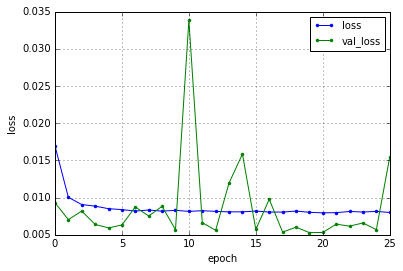

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0491 - val_loss: 0.0245
Epoch 2/50
1s - loss: 0.0315 - val_loss: 0.0202
Epoch 3/50
1s - loss: 0.0250 - val_loss: 0.0320
Epoch 4/50
1s - loss: 0.0236 - val_loss: 0.0150
Epoch 5/50
1s - loss: 0.0217 - val_loss: 0.0150
Epoch 6/50
1s - loss: 0.0203 - val_loss: 0.0346
Epoch 7/50
1s - loss: 0.0199 - val_loss: 0.0163
Epoch 8/50
1s - loss: 0.0169 - val_loss: 0.0130
Epoch 9/50
1s - loss: 0.0158 - val_loss: 0.0167
Epoch 10/50
1s - loss: 0.0164 - val_loss: 0.0133
Epoch 11/50
1s - loss: 0.0144 - val_loss: 0.0108
Epoch 12/50
1s - loss: 0.0164 - val_loss: 0.0115
Epoch 13/50
1s - loss: 0.0140 - val_loss: 0.0175
Epoch 14/50
1s - loss: 0.0149 - val_loss: 0.0118
Epoch 15/50
1s - loss: 0.0126 - val_loss: 0.0191
Epoch 16/50
1s - loss: 0.0120 - val_loss: 0.0101
Epoch 17/50
1s - loss: 0.0114 - val_loss: 0.0195
Epoch 18/50
1s - loss: 0.0113 - val_loss: 0.0098
Epoch 19/50
1s - loss: 0.0118 - val_loss: 0.0161
Epoch 20/50


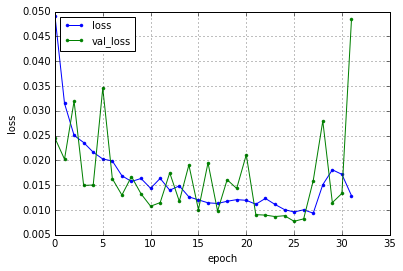

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0967 - val_loss: 0.0689
Epoch 2/50
1s - loss: 0.0549 - val_loss: 0.0376
Epoch 3/50
1s - loss: 0.0522 - val_loss: 0.0412
Epoch 4/50
1s - loss: 0.0475 - val_loss: 0.0420
Epoch 5/50
1s - loss: 0.0451 - val_loss: 0.0366
Epoch 6/50
1s - loss: 0.0446 - val_loss: 0.0431
Epoch 7/50
1s - loss: 0.0388 - val_loss: 0.0451
Epoch 8/50
1s - loss: 0.0406 - val_loss: 0.0289
Epoch 9/50
1s - loss: 0.0325 - val_loss: 0.0232
Epoch 10/50
1s - loss: 0.0260 - val_loss: 0.0223
Epoch 11/50
1s - loss: 0.0260 - val_loss: 0.0219
Epoch 12/50
1s - loss: 0.0259 - val_loss: 0.0508
Epoch 13/50
1s - loss: 0.0364 - val_loss: 0.0245
Epoch 14/50
1s - loss: 0.0258 - val_loss: 0.0394
Epoch 15/50
1s - loss: 0.0242 - val_loss: 0.0240
Epoch 16/50
1s - loss: 0.0218 - val_loss: 0.0193
Epoch 17/50
1s - loss: 0.0192 - val_loss: 0.0159
Epoch 18/50
1s - loss: 0.0170 - val_loss: 0.0132
Epoch 19/50
1s - loss: 0.0174 - val_loss: 0.0132
Epoch 20/50


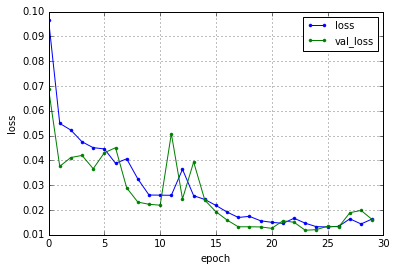

hiden node = 16
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0205 - val_loss: 0.0090
Epoch 2/50
1s - loss: 0.0112 - val_loss: 0.0394
Epoch 3/50
1s - loss: 0.0097 - val_loss: 0.0074
Epoch 4/50
1s - loss: 0.0098 - val_loss: 0.0057
Epoch 5/50
1s - loss: 0.0084 - val_loss: 0.0064
Epoch 6/50
1s - loss: 0.0090 - val_loss: 0.0074
Epoch 7/50
1s - loss: 0.0076 - val_loss: 0.0056
Epoch 8/50
1s - loss: 0.0073 - val_loss: 0.0061
Epoch 9/50
1s - loss: 0.0074 - val_loss: 0.0071
Epoch 10/50
1s - loss: 0.0071 - val_loss: 0.0048
Epoch 11/50
1s - loss: 0.0067 - val_loss: 0.0053
Epoch 12/50
1s - loss: 0.0059 - val_loss: 0.0069
Epoch 13/50
1s - loss: 0.0054 - val_loss: 0.0037
Epoch 14/50
1s - loss: 0.0052 - val_loss: 0.0038
Epoch 15/50
1s - loss: 0.0054 - val_loss: 0.0045
Epoch 16/50
1s - loss: 0.0052 - val_loss: 0.0041
Epoch 17/50
1s - loss: 0.0046 - val_loss: 0.0096
Epoch 18/50
1s - loss: 0.0049 - val_loss: 0.0036
Epoch 19/50
1s - loss: 0.0044 - val_loss: 0.0051
Epoch 20/50


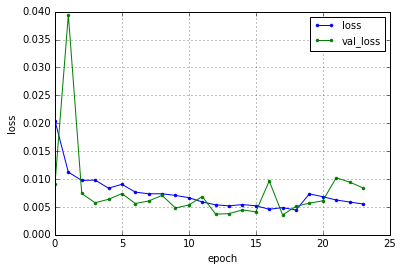

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15794
SourceData's aborting data = 6
window shape is (15794, 2048, 3)
(15794, 2048, 3)
hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.3011 - val_loss: 0.2959
Epoch 2/50
1s - loss: 0.2903 - val_loss: 0.2842
Epoch 3/50
1s - loss: 0.2776 - val_loss: 0.2707
Epoch 4/50
1s - loss: 0.2636 - val_loss: 0.2564
Epoch 5/50
1s - loss: 0.2494 - val_loss: 0.2424
Epoch 6/50
1s - loss: 0.2358 - val_loss: 0.2293
Epoch 7/50
1s - loss: 0.2231 - val_loss: 0.2172
Epoch 8/50
1s - loss: 0.2116 - val_loss: 0.2061
Epoch 9/50
1s - loss: 0.2010 - val_loss: 0.1960
Epoch 10/50
1s - loss: 0.1914 - val_loss: 0.1869
Epoch 11/50
1s - loss: 0.1826 - val_loss: 0.1785
Epoch 12/50
1s - loss: 0.1747 - val_loss: 0.1710
Epoch 13/50
1s - loss: 0.1674 - val_loss: 0.1640
Epoch 14/50
1s - loss: 0.1608 - val_loss: 0.1576
Epoch 15/50
1s - loss: 0.1547 - val_loss: 0.1518
Epoch 16/50
1

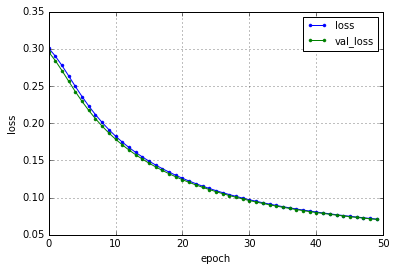

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.7202 - val_loss: 0.6810
Epoch 2/50
2s - loss: 0.6412 - val_loss: 0.6027
Epoch 3/50
2s - loss: 0.5678 - val_loss: 0.5342
Epoch 4/50
2s - loss: 0.5040 - val_loss: 0.4751
Epoch 5/50
2s - loss: 0.4491 - val_loss: 0.4242
Epoch 6/50
2s - loss: 0.4018 - val_loss: 0.3803
Epoch 7/50
2s - loss: 0.3610 - val_loss: 0.3425
Epoch 8/50
2s - loss: 0.3258 - val_loss: 0.3099
Epoch 9/50
2s - loss: 0.2954 - val_loss: 0.2816
Epoch 10/50
2s - loss: 0.2690 - val_loss: 0.2569
Epoch 11/50
2s - loss: 0.2458 - val_loss: 0.2352
Epoch 12/50
2s - loss: 0.2256 - val_loss: 0.2163
Epoch 13/50
2s - loss: 0.2078 - val_loss: 0.1996
Epoch 14/50
2s - loss: 0.1922 - val_loss: 0.1850
Epoch 15/50
2s - loss: 0.1785 - val_loss: 0.1721
Epoch 16/50
2s - loss: 0.1664 - val_loss: 0.1608
Epoch 17/50
2s - loss: 0.1557 - val_loss: 0.1508
Epoch 18/50
2s - loss: 0.1462 - val_loss: 0.1419
Epoch 19/50
2s - loss: 0.1379 - val_loss: 0.1340
Epoch 20/50


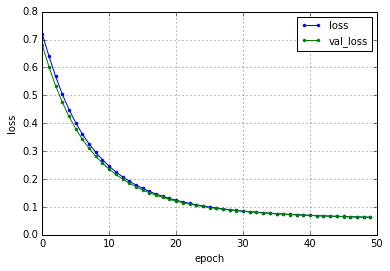

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.0828 - val_loss: 0.0824
Epoch 2/50
2s - loss: 0.0822 - val_loss: 0.0819
Epoch 3/50
2s - loss: 0.0817 - val_loss: 0.0815
Epoch 4/50
2s - loss: 0.0813 - val_loss: 0.0811
Epoch 5/50
2s - loss: 0.0808 - val_loss: 0.0806
Epoch 6/50
2s - loss: 0.0803 - val_loss: 0.0801
Epoch 7/50
2s - loss: 0.0798 - val_loss: 0.0795
Epoch 8/50
2s - loss: 0.0792 - val_loss: 0.0788
Epoch 9/50
2s - loss: 0.0785 - val_loss: 0.0781
Epoch 10/50
2s - loss: 0.0777 - val_loss: 0.0773
Epoch 11/50
2s - loss: 0.0769 - val_loss: 0.0764
Epoch 12/50
2s - loss: 0.0760 - val_loss: 0.0755
Epoch 13/50
2s - loss: 0.0751 - val_loss: 0.0746
Epoch 14/50
2s - loss: 0.0741 - val_loss: 0.0736
Epoch 15/50
2s - loss: 0.0731 - val_loss: 0.0726
Epoch 16/50
2s - loss: 0.0721 - val_loss: 0.0715
Epoch 17/50
2s - loss: 0.0710 - val_loss: 0.0705
Epoch 18/50
2s - loss: 0.0699 - val_loss: 0.0694
Epoch 19/50
2s - loss: 0.0689 - val_loss: 0.0684
Epoch 20/50


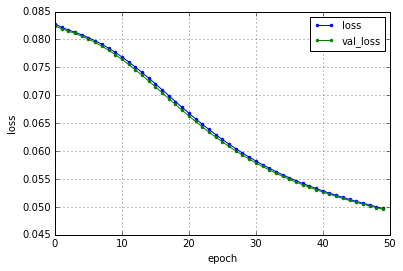

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.1024 - val_loss: 0.0529
Epoch 2/50
1s - loss: 0.0469 - val_loss: 0.0426
Epoch 3/50
1s - loss: 0.0400 - val_loss: 0.0386
Epoch 4/50
1s - loss: 0.0370 - val_loss: 0.0343
Epoch 5/50
1s - loss: 0.0345 - val_loss: 0.0315
Epoch 6/50
1s - loss: 0.0331 - val_loss: 0.0303
Epoch 7/50
1s - loss: 0.0322 - val_loss: 0.0291
Epoch 8/50
1s - loss: 0.0311 - val_loss: 0.0336
Epoch 9/50
1s - loss: 0.0300 - val_loss: 0.0277
Epoch 10/50
1s - loss: 0.0291 - val_loss: 0.0337
Epoch 11/50
1s - loss: 0.0288 - val_loss: 0.0342
Epoch 12/50
1s - loss: 0.0274 - val_loss: 0.0497
Epoch 13/50
1s - loss: 0.0276 - val_loss: 0.0245
Epoch 14/50
1s - loss: 0.0268 - val_loss: 0.0269
Epoch 15/50
1s - loss: 0.0264 - val_loss: 0.0241
Epoch 16/50
1s - loss: 0.0266 - val_loss: 0.0252
Epoch 17/50
1s - loss: 0.0264 - val_loss: 0.0238
Epoch 18/50
1s - loss: 0.0259 - val_loss: 0.0229
Epoch 19/50
1s - loss: 0.0257 - val_loss: 0.0291
Epoch 20/50


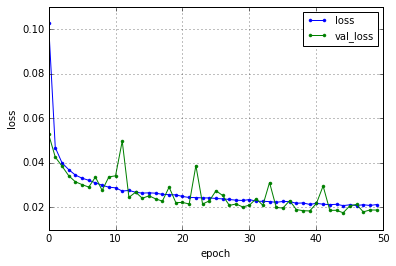

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.1514 - val_loss: 0.0561
Epoch 2/50
2s - loss: 0.0556 - val_loss: 0.0502
Epoch 3/50
2s - loss: 0.0524 - val_loss: 0.0605
Epoch 4/50
2s - loss: 0.0500 - val_loss: 0.0451
Epoch 5/50
2s - loss: 0.0483 - val_loss: 0.0469
Epoch 6/50
2s - loss: 0.0467 - val_loss: 0.0530
Epoch 7/50
2s - loss: 0.0455 - val_loss: 0.0695
Epoch 8/50
2s - loss: 0.0446 - val_loss: 0.0559
Epoch 9/50
2s - loss: 0.0442 - val_loss: 0.0390
Epoch 10/50
2s - loss: 0.0431 - val_loss: 0.0401
Epoch 11/50
2s - loss: 0.0416 - val_loss: 0.0366
Epoch 12/50
2s - loss: 0.0410 - val_loss: 0.0387
Epoch 13/50
2s - loss: 0.0395 - val_loss: 0.0527
Epoch 14/50
2s - loss: 0.0384 - val_loss: 0.0331
Epoch 15/50
2s - loss: 0.0370 - val_loss: 0.0329
Epoch 16/50
2s - loss: 0.0357 - val_loss: 0.0397
Epoch 17/50
2s - loss: 0.0347 - val_loss: 0.0311
Epoch 18/50
2s - loss: 0.0339 - val_loss: 0.0290
Epoch 19/50
2s - loss: 0.0334 - val_loss: 0.0426
Epoch 20/50


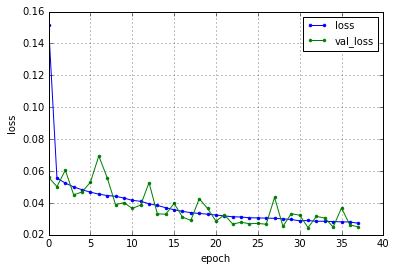

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.0550 - val_loss: 0.0397
Epoch 2/50
2s - loss: 0.0343 - val_loss: 0.0300
Epoch 3/50
2s - loss: 0.0272 - val_loss: 0.0248
Epoch 4/50
2s - loss: 0.0231 - val_loss: 0.0217
Epoch 5/50
2s - loss: 0.0207 - val_loss: 0.0200
Epoch 6/50
2s - loss: 0.0192 - val_loss: 0.0184
Epoch 7/50
2s - loss: 0.0180 - val_loss: 0.0175
Epoch 8/50
2s - loss: 0.0171 - val_loss: 0.0165
Epoch 9/50
2s - loss: 0.0163 - val_loss: 0.0158
Epoch 10/50
2s - loss: 0.0157 - val_loss: 0.0150
Epoch 11/50
2s - loss: 0.0151 - val_loss: 0.0144
Epoch 12/50
2s - loss: 0.0146 - val_loss: 0.0145
Epoch 13/50
2s - loss: 0.0142 - val_loss: 0.0134
Epoch 14/50
2s - loss: 0.0138 - val_loss: 0.0133
Epoch 15/50
2s - loss: 0.0134 - val_loss: 0.0127
Epoch 16/50
2s - loss: 0.0132 - val_loss: 0.0145
Epoch 17/50
2s - loss: 0.0128 - val_loss: 0.0123
Epoch 18/50
2s - loss: 0.0126 - val_loss: 0.0127
Epoch 19/50
2s - loss: 0.0124 - val_loss: 0.0123
Epoch 20/50


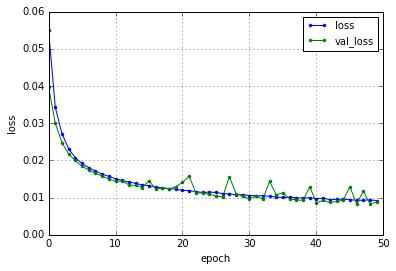

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.0488 - val_loss: 0.0327
Epoch 2/50
1s - loss: 0.0260 - val_loss: 0.0344
Epoch 3/50
1s - loss: 0.0208 - val_loss: 0.0190
Epoch 4/50
1s - loss: 0.0177 - val_loss: 0.0153
Epoch 5/50
1s - loss: 0.0150 - val_loss: 0.0136
Epoch 6/50
1s - loss: 0.0143 - val_loss: 0.0140
Epoch 7/50
1s - loss: 0.0137 - val_loss: 0.0126
Epoch 8/50
1s - loss: 0.0135 - val_loss: 0.0128
Epoch 9/50
1s - loss: 0.0127 - val_loss: 0.0135
Epoch 10/50
1s - loss: 0.0126 - val_loss: 0.0116
Epoch 11/50
1s - loss: 0.0123 - val_loss: 0.0190
Epoch 12/50
1s - loss: 0.0123 - val_loss: 0.0129
Epoch 13/50
1s - loss: 0.0123 - val_loss: 0.0130
Epoch 14/50
1s - loss: 0.0125 - val_loss: 0.0114
Epoch 15/50
1s - loss: 0.0123 - val_loss: 0.0126
Epoch 16/50
1s - loss: 0.0122 - val_loss: 0.0113
Epoch 17/50
1s - loss: 0.0119 - val_loss: 0.0114
Epoch 18/50
1s - loss: 0.0117 - val_loss: 0.0113
Epoch 19/50
1s - loss: 0.0118 - val_loss: 0.0110
Epoch 20/50


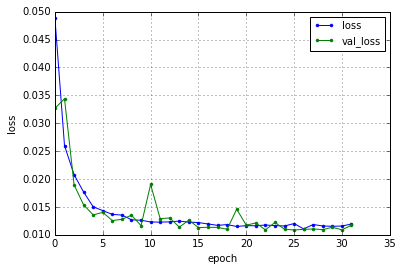

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.0822 - val_loss: 0.0466
Epoch 2/50
2s - loss: 0.0419 - val_loss: 0.0363
Epoch 3/50
2s - loss: 0.0308 - val_loss: 0.0321
Epoch 4/50
2s - loss: 0.0239 - val_loss: 0.0237
Epoch 5/50
2s - loss: 0.0198 - val_loss: 0.0175
Epoch 6/50
2s - loss: 0.0165 - val_loss: 0.0135
Epoch 7/50
2s - loss: 0.0144 - val_loss: 0.0143
Epoch 8/50
2s - loss: 0.0133 - val_loss: 0.0115
Epoch 9/50
2s - loss: 0.0120 - val_loss: 0.0105
Epoch 10/50
2s - loss: 0.0115 - val_loss: 0.0099
Epoch 11/50
2s - loss: 0.0115 - val_loss: 0.0108
Epoch 12/50
2s - loss: 0.0110 - val_loss: 0.0109
Epoch 13/50
2s - loss: 0.0107 - val_loss: 0.0239
Epoch 14/50
2s - loss: 0.0098 - val_loss: 0.0127
Epoch 15/50
2s - loss: 0.0098 - val_loss: 0.0102
Epoch 16/50
2s - loss: 0.0097 - val_loss: 0.0089
Epoch 17/50
2s - loss: 0.0098 - val_loss: 0.0102
Epoch 18/50
2s - loss: 0.0095 - val_loss: 0.0091
Epoch 19/50
2s - loss: 0.0097 - val_loss: 0.0094
Epoch 20/50


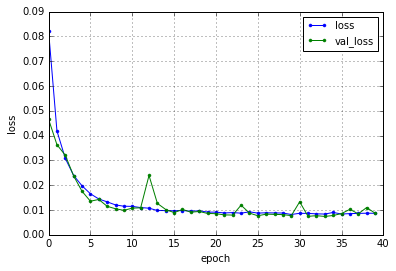

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0226 - val_loss: 0.0133
Epoch 2/50
2s - loss: 0.0117 - val_loss: 0.0099
Epoch 3/50
2s - loss: 0.0089 - val_loss: 0.0075
Epoch 4/50
2s - loss: 0.0077 - val_loss: 0.0072
Epoch 5/50
2s - loss: 0.0072 - val_loss: 0.0079
Epoch 6/50
2s - loss: 0.0068 - val_loss: 0.0069
Epoch 7/50
2s - loss: 0.0069 - val_loss: 0.0071
Epoch 8/50
2s - loss: 0.0069 - val_loss: 0.0061
Epoch 9/50
2s - loss: 0.0065 - val_loss: 0.0089
Epoch 10/50
2s - loss: 0.0066 - val_loss: 0.0064
Epoch 11/50
2s - loss: 0.0067 - val_loss: 0.0061
Epoch 12/50
2s - loss: 0.0064 - val_loss: 0.0063
Epoch 13/50
2s - loss: 0.0064 - val_loss: 0.0061
Epoch 14/50
2s - loss: 0.0064 - val_loss: 0.0059
Epoch 15/50
2s - loss: 0.0060 - val_loss: 0.0092
Epoch 16/50
2s - loss: 0.0064 - val_loss: 0.0057
Epoch 17/50
2s - loss: 0.0061 - val_loss: 0.0063
Epoch 18/50
2s - loss: 0.0064 - val_loss: 0.0061
Epoch 19/50
2s - loss: 0.0060 - val_loss: 0.0063
Epoch 20/50


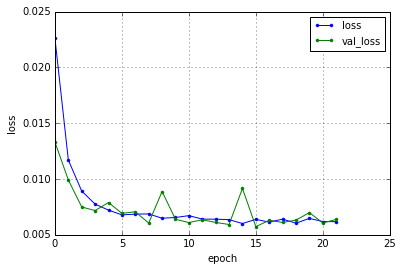

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.0525 - val_loss: 0.0333
Epoch 2/50
1s - loss: 0.0247 - val_loss: 0.0209
Epoch 3/50
1s - loss: 0.0208 - val_loss: 0.0177
Epoch 4/50
1s - loss: 0.0188 - val_loss: 0.0154
Epoch 5/50
1s - loss: 0.0170 - val_loss: 0.0161
Epoch 6/50
1s - loss: 0.0155 - val_loss: 0.0217
Epoch 7/50
1s - loss: 0.0151 - val_loss: 0.0134
Epoch 8/50
1s - loss: 0.0157 - val_loss: 0.0127
Epoch 9/50
1s - loss: 0.0146 - val_loss: 0.0130
Epoch 10/50
1s - loss: 0.0141 - val_loss: 0.0149
Epoch 11/50
1s - loss: 0.0144 - val_loss: 0.0125
Epoch 12/50
1s - loss: 0.0137 - val_loss: 0.0129
Epoch 13/50
1s - loss: 0.0150 - val_loss: 0.0128
Epoch 14/50
1s - loss: 0.0134 - val_loss: 0.0144
Epoch 15/50
1s - loss: 0.0136 - val_loss: 0.0149
Epoch 16/50
1s - loss: 0.0136 - val_loss: 0.0138
Epoch 17/50
1s - loss: 0.0135 - val_loss: 0.0122
Epoch 18/50
1s - loss: 0.0143 - val_loss: 0.0144
Epoch 19/50
1s - loss: 0.0133 - val_loss: 0.0150
Epoch 20/50


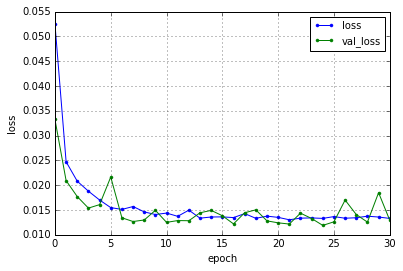

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0939 - val_loss: 0.0716
Epoch 2/50
2s - loss: 0.0460 - val_loss: 0.0372
Epoch 3/50
2s - loss: 0.0361 - val_loss: 0.0284
Epoch 4/50
2s - loss: 0.0268 - val_loss: 0.0496
Epoch 5/50
2s - loss: 0.0244 - val_loss: 0.0250
Epoch 6/50
2s - loss: 0.0218 - val_loss: 0.0266
Epoch 7/50
2s - loss: 0.0217 - val_loss: 0.0194
Epoch 8/50
2s - loss: 0.0187 - val_loss: 0.0168
Epoch 9/50
2s - loss: 0.0183 - val_loss: 0.0168
Epoch 10/50
2s - loss: 0.0156 - val_loss: 0.0130
Epoch 11/50
2s - loss: 0.0230 - val_loss: 0.0201
Epoch 12/50
2s - loss: 0.0210 - val_loss: 0.0190
Epoch 13/50
2s - loss: 0.0208 - val_loss: 0.0195
Epoch 14/50
2s - loss: 0.0205 - val_loss: 0.0225
Epoch 15/50
2s - loss: 0.0183 - val_loss: 0.0167
Epoch 16/50
2s - loss: 0.0176 - val_loss: 0.0146


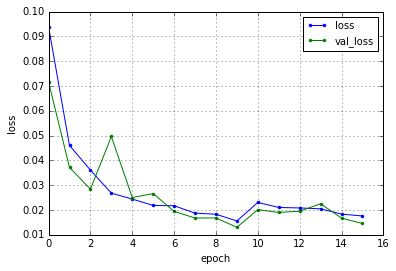

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.0229 - val_loss: 0.0132
Epoch 2/50
2s - loss: 0.0116 - val_loss: 0.0100
Epoch 3/50
2s - loss: 0.0091 - val_loss: 0.0098
Epoch 4/50
2s - loss: 0.0084 - val_loss: 0.0108
Epoch 5/50
2s - loss: 0.0083 - val_loss: 0.0080
Epoch 6/50
2s - loss: 0.0091 - val_loss: 0.0076
Epoch 7/50
2s - loss: 0.0085 - val_loss: 0.0071
Epoch 8/50
2s - loss: 0.0078 - val_loss: 0.0069
Epoch 9/50
2s - loss: 0.0080 - val_loss: 0.0098
Epoch 10/50
2s - loss: 0.0079 - val_loss: 0.0070
Epoch 11/50
2s - loss: 0.0078 - val_loss: 0.0071
Epoch 12/50
2s - loss: 0.0075 - val_loss: 0.0064
Epoch 13/50
2s - loss: 0.0077 - val_loss: 0.0095
Epoch 14/50
2s - loss: 0.0077 - val_loss: 0.0075
Epoch 15/50
2s - loss: 0.0074 - val_loss: 0.0069
Epoch 16/50
2s - loss: 0.0074 - val_loss: 0.0062
Epoch 17/50
2s - loss: 0.0080 - val_loss: 0.0100
Epoch 18/50
2s - loss: 0.0075 - val_loss: 0.0066
Epoch 19/50
2s - loss: 0.0084 - val_loss: 0.0079
Epoch 20/50


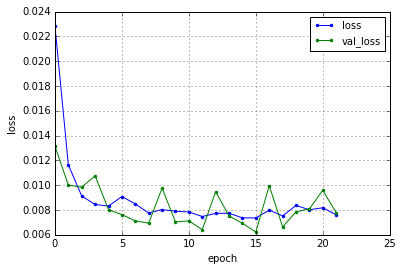

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.0558 - val_loss: 0.0402
Epoch 2/50
1s - loss: 0.0322 - val_loss: 0.0279
Epoch 3/50
1s - loss: 0.0271 - val_loss: 0.0244
Epoch 4/50
1s - loss: 0.0244 - val_loss: 0.0267
Epoch 5/50
1s - loss: 0.0224 - val_loss: 0.0408
Epoch 6/50
1s - loss: 0.0209 - val_loss: 0.0218
Epoch 7/50
1s - loss: 0.0197 - val_loss: 0.0211
Epoch 8/50
1s - loss: 0.0196 - val_loss: 0.0176
Epoch 9/50
1s - loss: 0.0185 - val_loss: 0.0182
Epoch 10/50
1s - loss: 0.0181 - val_loss: 0.0163
Epoch 11/50
1s - loss: 0.0176 - val_loss: 0.0159
Epoch 12/50
1s - loss: 0.0173 - val_loss: 0.0169
Epoch 13/50
1s - loss: 0.0173 - val_loss: 0.0156
Epoch 14/50
1s - loss: 0.0164 - val_loss: 0.0152
Epoch 15/50
1s - loss: 0.0165 - val_loss: 0.0150
Epoch 16/50
1s - loss: 0.0158 - val_loss: 0.0171
Epoch 17/50
1s - loss: 0.0160 - val_loss: 0.0145
Epoch 18/50
1s - loss: 0.0155 - val_loss: 0.0149
Epoch 19/50
1s - loss: 0.0156 - val_loss: 0.0202
Epoch 20/50


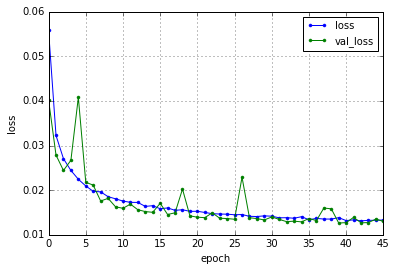

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.1018 - val_loss: 0.0629
Epoch 2/50
2s - loss: 0.0560 - val_loss: 0.0458
Epoch 3/50
2s - loss: 0.0446 - val_loss: 0.0401
Epoch 4/50
2s - loss: 0.0410 - val_loss: 0.0373
Epoch 5/50
2s - loss: 0.0375 - val_loss: 0.0330
Epoch 6/50
3s - loss: 0.0350 - val_loss: 0.0380
Epoch 7/50
2s - loss: 0.0328 - val_loss: 0.0306
Epoch 8/50
2s - loss: 0.0309 - val_loss: 0.0285
Epoch 9/50
2s - loss: 0.0293 - val_loss: 0.0291
Epoch 10/50
2s - loss: 0.0278 - val_loss: 0.0340
Epoch 11/50
2s - loss: 0.0267 - val_loss: 0.0241
Epoch 12/50
2s - loss: 0.0260 - val_loss: 0.0231
Epoch 13/50
2s - loss: 0.0250 - val_loss: 0.0270
Epoch 14/50
2s - loss: 0.0246 - val_loss: 0.0223
Epoch 15/50
2s - loss: 0.0237 - val_loss: 0.0247
Epoch 16/50
2s - loss: 0.0234 - val_loss: 0.0205
Epoch 17/50
2s - loss: 0.0229 - val_loss: 0.0208
Epoch 18/50
2s - loss: 0.0222 - val_loss: 0.0196
Epoch 19/50
2s - loss: 0.0217 - val_loss: 0.0211
Epoch 20/50


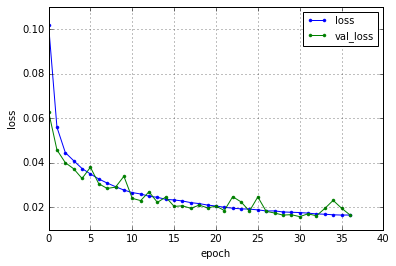

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.0227 - val_loss: 0.0139
Epoch 2/50
2s - loss: 0.0136 - val_loss: 0.0109
Epoch 3/50
2s - loss: 0.0111 - val_loss: 0.0188
Epoch 4/50
2s - loss: 0.0100 - val_loss: 0.0092
Epoch 5/50
2s - loss: 0.0092 - val_loss: 0.0086
Epoch 6/50
2s - loss: 0.0087 - val_loss: 0.0081
Epoch 7/50
2s - loss: 0.0082 - val_loss: 0.0075
Epoch 8/50
2s - loss: 0.0081 - val_loss: 0.0077
Epoch 9/50
2s - loss: 0.0075 - val_loss: 0.0071
Epoch 10/50
2s - loss: 0.0076 - val_loss: 0.0068
Epoch 11/50
2s - loss: 0.0074 - val_loss: 0.0067
Epoch 12/50
2s - loss: 0.0072 - val_loss: 0.0067
Epoch 13/50
2s - loss: 0.0071 - val_loss: 0.0066
Epoch 14/50
2s - loss: 0.0069 - val_loss: 0.0065
Epoch 15/50
2s - loss: 0.0069 - val_loss: 0.0084
Epoch 16/50
2s - loss: 0.0068 - val_loss: 0.0064
Epoch 17/50
2s - loss: 0.0068 - val_loss: 0.0063
Epoch 18/50
2s - loss: 0.0067 - val_loss: 0.0064
Epoch 19/50
2s - loss: 0.0066 - val_loss: 0.0063
Epoch 20/50


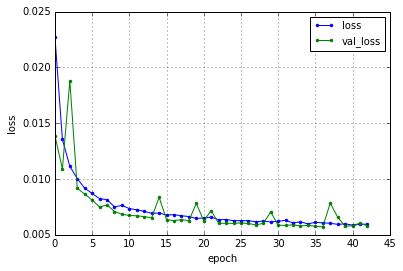

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.0588 - val_loss: 0.0585
Epoch 2/50
1s - loss: 0.0413 - val_loss: 0.0327
Epoch 3/50
1s - loss: 0.0383 - val_loss: 0.0463
Epoch 4/50
1s - loss: 0.0358 - val_loss: 0.0369
Epoch 5/50
1s - loss: 0.0347 - val_loss: 0.0316
Epoch 6/50
1s - loss: 0.0332 - val_loss: 0.0264
Epoch 7/50
1s - loss: 0.0327 - val_loss: 0.0272
Epoch 8/50
1s - loss: 0.0317 - val_loss: 0.0329
Epoch 9/50
1s - loss: 0.0311 - val_loss: 0.0239
Epoch 10/50
1s - loss: 0.0307 - val_loss: 0.0230
Epoch 11/50
1s - loss: 0.0301 - val_loss: 0.0260
Epoch 12/50
1s - loss: 0.0294 - val_loss: 0.0364
Epoch 13/50
1s - loss: 0.0296 - val_loss: 0.0213
Epoch 14/50
1s - loss: 0.0291 - val_loss: 0.0226
Epoch 15/50
1s - loss: 0.0288 - val_loss: 0.0223
Epoch 16/50
1s - loss: 0.0284 - val_loss: 0.0323
Epoch 17/50
1s - loss: 0.0280 - val_loss: 0.0211
Epoch 18/50
1s - loss: 0.0278 - val_loss: 0.0226
Epoch 19/50
1s - loss: 0.0280 - val_loss: 0.0280
Epoch 20/50


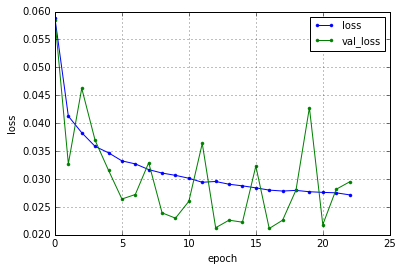

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.1046 - val_loss: 0.0671
Epoch 2/50
2s - loss: 0.0633 - val_loss: 0.0532
Epoch 3/50
2s - loss: 0.0535 - val_loss: 0.0523
Epoch 4/50
2s - loss: 0.0487 - val_loss: 0.0421
Epoch 5/50
2s - loss: 0.0459 - val_loss: 0.0363
Epoch 6/50
2s - loss: 0.0441 - val_loss: 0.0573
Epoch 7/50
2s - loss: 0.0420 - val_loss: 0.0424
Epoch 8/50
2s - loss: 0.0401 - val_loss: 0.0363
Epoch 9/50
2s - loss: 0.0396 - val_loss: 0.0396
Epoch 10/50
2s - loss: 0.0383 - val_loss: 0.0341
Epoch 11/50
2s - loss: 0.0369 - val_loss: 0.0318
Epoch 12/50
2s - loss: 0.0366 - val_loss: 0.0544
Epoch 13/50
2s - loss: 0.0359 - val_loss: 0.0332
Epoch 14/50
2s - loss: 0.0357 - val_loss: 0.0353
Epoch 15/50
2s - loss: 0.0352 - val_loss: 0.0333
Epoch 16/50
2s - loss: 0.0347 - val_loss: 0.0344
Epoch 17/50
2s - loss: 0.0342 - val_loss: 0.0358


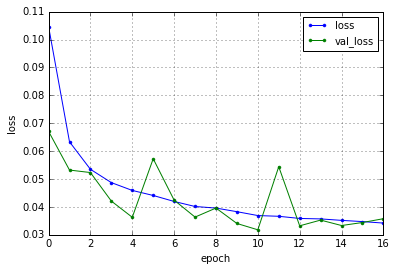

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.0238 - val_loss: 0.0234
Epoch 2/50
2s - loss: 0.0165 - val_loss: 0.0116
Epoch 3/50
2s - loss: 0.0153 - val_loss: 0.0280
Epoch 4/50
3s - loss: 0.0152 - val_loss: 0.0114
Epoch 5/50
2s - loss: 0.0150 - val_loss: 0.0114
Epoch 6/50
2s - loss: 0.0148 - val_loss: 0.0125
Epoch 7/50
2s - loss: 0.0148 - val_loss: 0.0229
Epoch 8/50
2s - loss: 0.0148 - val_loss: 0.0113
Epoch 9/50
2s - loss: 0.0148 - val_loss: 0.0122
Epoch 10/50
2s - loss: 0.0147 - val_loss: 0.0176
Epoch 11/50
2s - loss: 0.0147 - val_loss: 0.0118
Epoch 12/50
2s - loss: 0.0147 - val_loss: 0.0102
Epoch 13/50
2s - loss: 0.0147 - val_loss: 0.0106
Epoch 14/50
2s - loss: 0.0146 - val_loss: 0.0134
Epoch 15/50
2s - loss: 0.0146 - val_loss: 0.0188
Epoch 16/50
2s - loss: 0.0147 - val_loss: 0.0191
Epoch 17/50
2s - loss: 0.0144 - val_loss: 0.0150
Epoch 18/50
2s - loss: 0.0146 - val_loss: 0.0115


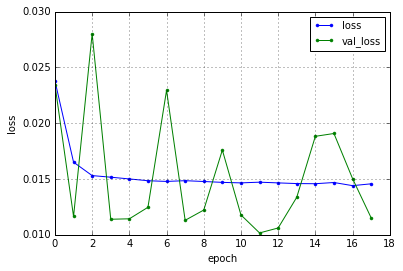

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.0767 - val_loss: 0.0701
Epoch 2/50
1s - loss: 0.0590 - val_loss: 0.0786
Epoch 3/50
1s - loss: 0.0459 - val_loss: 0.0477
Epoch 4/50
1s - loss: 0.0430 - val_loss: 0.0408
Epoch 5/50
1s - loss: 0.0422 - val_loss: 0.0301
Epoch 6/50
1s - loss: 0.0309 - val_loss: 0.0346
Epoch 7/50
1s - loss: 0.0383 - val_loss: 0.0581
Epoch 8/50
1s - loss: 0.0328 - val_loss: 0.0260
Epoch 9/50
1s - loss: 0.0326 - val_loss: 0.0417
Epoch 10/50
1s - loss: 0.0390 - val_loss: 0.0284
Epoch 11/50
1s - loss: 0.0400 - val_loss: 0.0327
Epoch 12/50
1s - loss: 0.0288 - val_loss: 0.0232
Epoch 13/50
1s - loss: 0.0289 - val_loss: 0.0501
Epoch 14/50
1s - loss: 0.0300 - val_loss: 0.0283
Epoch 15/50
1s - loss: 0.0247 - val_loss: 0.0398
Epoch 16/50
1s - loss: 0.0240 - val_loss: 0.0237
Epoch 17/50
1s - loss: 0.0235 - val_loss: 0.0198
Epoch 18/50
1s - loss: 0.0226 - val_loss: 0.0238
Epoch 19/50
1s - loss: 0.0229 - val_loss: 0.0208
Epoch 20/50


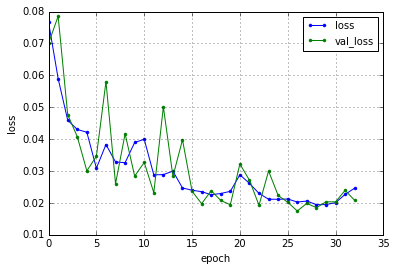

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.1153 - val_loss: 0.1027
Epoch 2/50
2s - loss: 0.0813 - val_loss: 0.0735
Epoch 3/50
2s - loss: 0.0713 - val_loss: 0.0662
Epoch 4/50
2s - loss: 0.0653 - val_loss: 0.0603
Epoch 5/50
2s - loss: 0.0598 - val_loss: 0.0510
Epoch 6/50
2s - loss: 0.0529 - val_loss: 0.0615
Epoch 7/50
2s - loss: 0.0688 - val_loss: 0.0579
Epoch 8/50
2s - loss: 0.0619 - val_loss: 0.0646
Epoch 9/50
2s - loss: 0.0677 - val_loss: 0.0741
Epoch 10/50
2s - loss: 0.0556 - val_loss: 0.0730
Epoch 11/50
2s - loss: 0.0647 - val_loss: 0.0746


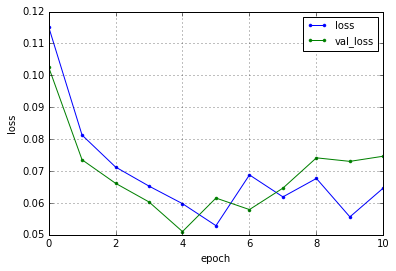

hiden node = 16
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.0265 - val_loss: 0.0247
Epoch 2/50
2s - loss: 0.0202 - val_loss: 0.0191
Epoch 3/50
2s - loss: 0.0189 - val_loss: 0.0187
Epoch 4/50
2s - loss: 0.0180 - val_loss: 0.0312
Epoch 5/50
2s - loss: 0.0193 - val_loss: 0.0213
Epoch 6/50
2s - loss: 0.0192 - val_loss: 0.0171
Epoch 7/50
2s - loss: 0.0211 - val_loss: 0.0146
Epoch 8/50
2s - loss: 0.0182 - val_loss: 0.0185
Epoch 9/50
2s - loss: 0.0170 - val_loss: 0.0133
Epoch 10/50
2s - loss: 0.0143 - val_loss: 0.0105
Epoch 11/50
2s - loss: 0.0144 - val_loss: 0.0113
Epoch 12/50
2s - loss: 0.0134 - val_loss: 0.0125
Epoch 13/50
2s - loss: 0.0130 - val_loss: 0.0095
Epoch 14/50
2s - loss: 0.0155 - val_loss: 0.0356
Epoch 15/50
2s - loss: 0.0133 - val_loss: 0.0108
Epoch 16/50
2s - loss: 0.0131 - val_loss: 0.0128
Epoch 17/50
2s - loss: 0.0124 - val_loss: 0.0139
Epoch 18/50
2s - loss: 0.0137 - val_loss: 0.0111
Epoch 19/50
2s - loss: 0.0123 - val_loss: 0.0100


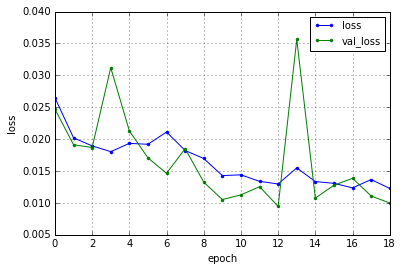

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15666
SourceData's aborting data = 6
window shape is (15666, 4096, 3)
(15666, 4096, 3)
hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.3053 - val_loss: 0.3030
Epoch 2/50
2s - loss: 0.3004 - val_loss: 0.2976
Epoch 3/50
2s - loss: 0.2943 - val_loss: 0.2908
Epoch 4/50
2s - loss: 0.2871 - val_loss: 0.2833
Epoch 5/50
2s - loss: 0.2794 - val_loss: 0.2755
Epoch 6/50
2s - loss: 0.2716 - val_loss: 0.2678
Epoch 7/50
2s - loss: 0.2641 - val_loss: 0.2603
Epoch 8/50
2s - loss: 0.2568 - val_loss: 0.2532
Epoch 9/50
2s - loss: 0.2497 - val_loss: 0.2463
Epoch 10/50
2s - loss: 0.2431 - val_loss: 0.2398
Epoch 11/50
2s - loss: 0.2367 - val_loss: 0.2336
Epoch 12/50
2s - loss: 0.2306 - val_loss: 0.2277
Epoch 13/50
2s - loss: 0.2249 - val_loss: 0.2221
Epoch 14/50
2s - loss: 0.2195 - val_loss: 0.2168
Epoch 15/50
2s - loss: 0.2143 - val_loss: 0.2118
Epoch 16/50
2

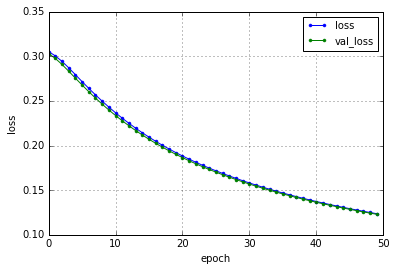

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.7405 - val_loss: 0.7226
Epoch 2/50
2s - loss: 0.7015 - val_loss: 0.6804
Epoch 3/50
2s - loss: 0.6602 - val_loss: 0.6403
Epoch 4/50
2s - loss: 0.6215 - val_loss: 0.6029
Epoch 5/50
2s - loss: 0.5854 - val_loss: 0.5682
Epoch 6/50
2s - loss: 0.5520 - val_loss: 0.5360
Epoch 7/50
2s - loss: 0.5209 - val_loss: 0.5062
Epoch 8/50
2s - loss: 0.4922 - val_loss: 0.4785
Epoch 9/50
2s - loss: 0.4656 - val_loss: 0.4529
Epoch 10/50
2s - loss: 0.4409 - val_loss: 0.4291
Epoch 11/50
2s - loss: 0.4180 - val_loss: 0.4071
Epoch 12/50
2s - loss: 0.3968 - val_loss: 0.3867
Epoch 13/50
2s - loss: 0.3771 - val_loss: 0.3677
Epoch 14/50
2s - loss: 0.3588 - val_loss: 0.3500
Epoch 15/50
2s - loss: 0.3417 - val_loss: 0.3335
Epoch 16/50
2s - loss: 0.3258 - val_loss: 0.3182
Epoch 17/50
2s - loss: 0.3109 - val_loss: 0.3038
Epoch 18/50
2s - loss: 0.2971 - val_loss: 0.2904
Epoch 19/50
2s - loss: 0.2841 - val_loss: 0.2779
Epoch 20/50


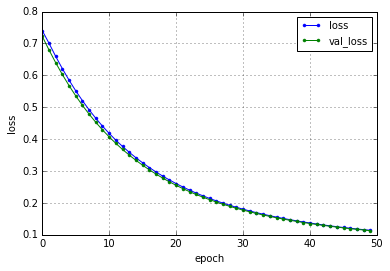

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0830 - val_loss: 0.0829
Epoch 2/50
2s - loss: 0.0828 - val_loss: 0.0827
Epoch 3/50
2s - loss: 0.0826 - val_loss: 0.0826
Epoch 4/50
2s - loss: 0.0825 - val_loss: 0.0824
Epoch 5/50
2s - loss: 0.0823 - val_loss: 0.0822
Epoch 6/50
2s - loss: 0.0821 - val_loss: 0.0821
Epoch 7/50
2s - loss: 0.0820 - val_loss: 0.0819
Epoch 8/50
2s - loss: 0.0818 - val_loss: 0.0817
Epoch 9/50
2s - loss: 0.0816 - val_loss: 0.0814
Epoch 10/50
2s - loss: 0.0813 - val_loss: 0.0812
Epoch 11/50
2s - loss: 0.0811 - val_loss: 0.0809
Epoch 12/50
2s - loss: 0.0808 - val_loss: 0.0807
Epoch 13/50
2s - loss: 0.0805 - val_loss: 0.0804
Epoch 14/50
2s - loss: 0.0802 - val_loss: 0.0800
Epoch 15/50
2s - loss: 0.0799 - val_loss: 0.0797
Epoch 16/50
2s - loss: 0.0795 - val_loss: 0.0793
Epoch 17/50
2s - loss: 0.0791 - val_loss: 0.0789
Epoch 18/50
2s - loss: 0.0787 - val_loss: 0.0785
Epoch 19/50
2s - loss: 0.0783 - val_loss: 0.0781
Epoch 20/50


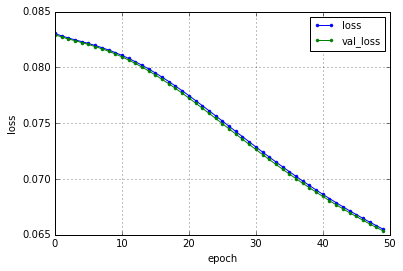

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.1467 - val_loss: 0.0873
Epoch 2/50
2s - loss: 0.0746 - val_loss: 0.0641
Epoch 3/50
2s - loss: 0.0596 - val_loss: 0.0637
Epoch 4/50
2s - loss: 0.0529 - val_loss: 0.0491
Epoch 5/50
2s - loss: 0.0493 - val_loss: 0.0471
Epoch 6/50
2s - loss: 0.0461 - val_loss: 0.0428
Epoch 7/50
2s - loss: 0.0442 - val_loss: 0.0411
Epoch 8/50
2s - loss: 0.0428 - val_loss: 0.0701
Epoch 9/50
2s - loss: 0.0415 - val_loss: 0.0389
Epoch 10/50
2s - loss: 0.0401 - val_loss: 0.0384
Epoch 11/50
2s - loss: 0.0394 - val_loss: 0.0357
Epoch 12/50
2s - loss: 0.0384 - val_loss: 0.0404
Epoch 13/50
2s - loss: 0.0378 - val_loss: 0.0405
Epoch 14/50
2s - loss: 0.0373 - val_loss: 0.0375
Epoch 15/50
2s - loss: 0.0368 - val_loss: 0.0351
Epoch 16/50
2s - loss: 0.0362 - val_loss: 0.0339
Epoch 17/50
2s - loss: 0.0357 - val_loss: 0.0380
Epoch 18/50
2s - loss: 0.0359 - val_loss: 0.0555
Epoch 19/50
2s - loss: 0.0354 - val_loss: 0.0334
Epoch 20/50


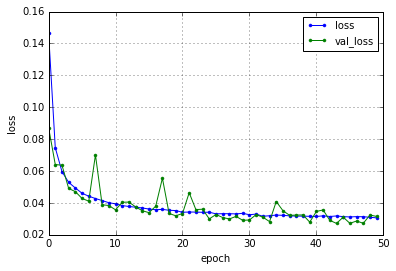

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.2036 - val_loss: 0.0789
Epoch 2/50
2s - loss: 0.0736 - val_loss: 0.0680
Epoch 3/50
2s - loss: 0.0670 - val_loss: 0.0636
Epoch 4/50
2s - loss: 0.0635 - val_loss: 0.0581
Epoch 5/50
2s - loss: 0.0607 - val_loss: 0.0564
Epoch 6/50
2s - loss: 0.0582 - val_loss: 0.0534
Epoch 7/50
2s - loss: 0.0559 - val_loss: 0.0535
Epoch 8/50
2s - loss: 0.0551 - val_loss: 0.0524
Epoch 9/50
2s - loss: 0.0535 - val_loss: 0.0742
Epoch 10/50
2s - loss: 0.0523 - val_loss: 0.0518
Epoch 11/50
2s - loss: 0.0515 - val_loss: 0.0548
Epoch 12/50
2s - loss: 0.0511 - val_loss: 0.0541
Epoch 13/50
2s - loss: 0.0504 - val_loss: 0.0464
Epoch 14/50
2s - loss: 0.0492 - val_loss: 0.0463
Epoch 15/50
2s - loss: 0.0491 - val_loss: 0.0490
Epoch 16/50
2s - loss: 0.0487 - val_loss: 0.0461
Epoch 17/50
2s - loss: 0.0481 - val_loss: 0.0478
Epoch 18/50
2s - loss: 0.0479 - val_loss: 0.0505
Epoch 19/50
2s - loss: 0.0476 - val_loss: 0.0530
Epoch 20/50


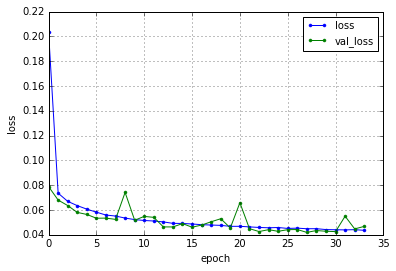

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0685 - val_loss: 0.0569
Epoch 2/50
2s - loss: 0.0516 - val_loss: 0.0471
Epoch 3/50
2s - loss: 0.0438 - val_loss: 0.0409
Epoch 4/50
2s - loss: 0.0385 - val_loss: 0.0364
Epoch 5/50
2s - loss: 0.0346 - val_loss: 0.0329
Epoch 6/50
2s - loss: 0.0316 - val_loss: 0.0303
Epoch 7/50
2s - loss: 0.0293 - val_loss: 0.0284
Epoch 8/50
2s - loss: 0.0274 - val_loss: 0.0265
Epoch 9/50
2s - loss: 0.0259 - val_loss: 0.0255
Epoch 10/50
2s - loss: 0.0247 - val_loss: 0.0242
Epoch 11/50
2s - loss: 0.0237 - val_loss: 0.0233
Epoch 12/50
2s - loss: 0.0228 - val_loss: 0.0231
Epoch 13/50
2s - loss: 0.0221 - val_loss: 0.0217
Epoch 14/50
2s - loss: 0.0215 - val_loss: 0.0218
Epoch 15/50
2s - loss: 0.0210 - val_loss: 0.0222
Epoch 16/50
2s - loss: 0.0205 - val_loss: 0.0199
Epoch 17/50
2s - loss: 0.0201 - val_loss: 0.0195
Epoch 18/50
2s - loss: 0.0197 - val_loss: 0.0202
Epoch 19/50
2s - loss: 0.0194 - val_loss: 0.0189
Epoch 20/50


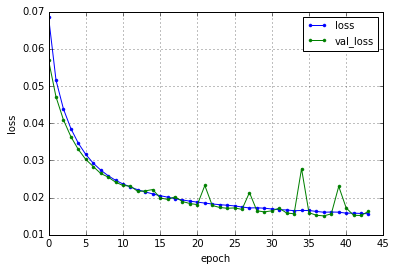

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0624 - val_loss: 0.0375
Epoch 2/50
2s - loss: 0.0329 - val_loss: 0.0297
Epoch 3/50
2s - loss: 0.0285 - val_loss: 0.0247
Epoch 4/50
2s - loss: 0.0239 - val_loss: 0.0265
Epoch 5/50
2s - loss: 0.0234 - val_loss: 0.0216
Epoch 6/50
2s - loss: 0.0221 - val_loss: 0.0204
Epoch 7/50
2s - loss: 0.0217 - val_loss: 0.0213
Epoch 8/50
2s - loss: 0.0215 - val_loss: 0.0206
Epoch 9/50
2s - loss: 0.0210 - val_loss: 0.0194
Epoch 10/50
2s - loss: 0.0208 - val_loss: 0.0235
Epoch 11/50
2s - loss: 0.0212 - val_loss: 0.0198
Epoch 12/50
2s - loss: 0.0206 - val_loss: 0.0193
Epoch 13/50
2s - loss: 0.0206 - val_loss: 0.0196
Epoch 14/50
2s - loss: 0.0207 - val_loss: 0.0197
Epoch 15/50
2s - loss: 0.0201 - val_loss: 0.0190
Epoch 16/50
2s - loss: 0.0205 - val_loss: 0.0198
Epoch 17/50
2s - loss: 0.0200 - val_loss: 0.0200
Epoch 18/50
2s - loss: 0.0202 - val_loss: 0.0237
Epoch 19/50
2s - loss: 0.0200 - val_loss: 0.0188
Epoch 20/50


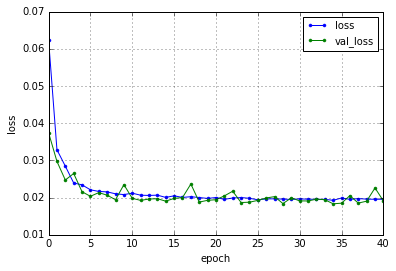

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0951 - val_loss: 0.0555
Epoch 2/50
2s - loss: 0.0493 - val_loss: 0.0573
Epoch 3/50
2s - loss: 0.0397 - val_loss: 0.0337
Epoch 4/50
2s - loss: 0.0325 - val_loss: 0.0344
Epoch 5/50
2s - loss: 0.0279 - val_loss: 0.0277
Epoch 6/50
2s - loss: 0.0256 - val_loss: 0.0244
Epoch 7/50
2s - loss: 0.0243 - val_loss: 0.0214
Epoch 8/50
2s - loss: 0.0230 - val_loss: 0.0241
Epoch 9/50
2s - loss: 0.0228 - val_loss: 0.0199
Epoch 10/50
2s - loss: 0.0219 - val_loss: 0.0269
Epoch 11/50
2s - loss: 0.0213 - val_loss: 0.0202
Epoch 12/50
2s - loss: 0.0214 - val_loss: 0.0204
Epoch 13/50
2s - loss: 0.0210 - val_loss: 0.0273
Epoch 14/50
2s - loss: 0.0212 - val_loss: 0.0194
Epoch 15/50
2s - loss: 0.0199 - val_loss: 0.0193
Epoch 16/50
2s - loss: 0.0203 - val_loss: 0.0189
Epoch 17/50
2s - loss: 0.0205 - val_loss: 0.0199
Epoch 18/50
2s - loss: 0.0202 - val_loss: 0.0191
Epoch 19/50
2s - loss: 0.0197 - val_loss: 0.0208
Epoch 20/50


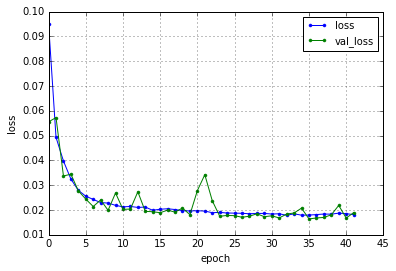

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0267 - val_loss: 0.0167
Epoch 2/50
2s - loss: 0.0154 - val_loss: 0.0131
Epoch 3/50
2s - loss: 0.0136 - val_loss: 0.0121
Epoch 4/50
2s - loss: 0.0126 - val_loss: 0.0126
Epoch 5/50
2s - loss: 0.0126 - val_loss: 0.0114
Epoch 6/50
2s - loss: 0.0120 - val_loss: 0.0121
Epoch 7/50
2s - loss: 0.0121 - val_loss: 0.0140
Epoch 8/50
2s - loss: 0.0118 - val_loss: 0.0112
Epoch 9/50
2s - loss: 0.0118 - val_loss: 0.0110
Epoch 10/50
2s - loss: 0.0117 - val_loss: 0.0119
Epoch 11/50
2s - loss: 0.0118 - val_loss: 0.0112
Epoch 12/50
2s - loss: 0.0117 - val_loss: 0.0111
Epoch 13/50
2s - loss: 0.0118 - val_loss: 0.0107
Epoch 14/50
2s - loss: 0.0117 - val_loss: 0.0116
Epoch 15/50
2s - loss: 0.0113 - val_loss: 0.0107
Epoch 16/50
2s - loss: 0.0116 - val_loss: 0.0108
Epoch 17/50
2s - loss: 0.0117 - val_loss: 0.0108
Epoch 18/50
2s - loss: 0.0111 - val_loss: 0.0109
Epoch 19/50
2s - loss: 0.0115 - val_loss: 0.0117


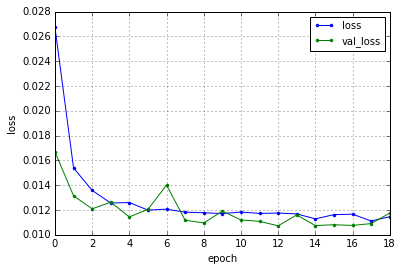

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0681 - val_loss: 0.0467
Epoch 2/50
2s - loss: 0.0403 - val_loss: 0.0389
Epoch 3/50
2s - loss: 0.0350 - val_loss: 0.0306
Epoch 4/50
2s - loss: 0.0329 - val_loss: 0.0609
Epoch 5/50
2s - loss: 0.0369 - val_loss: 0.0326
Epoch 6/50
2s - loss: 0.0308 - val_loss: 0.0270
Epoch 7/50
2s - loss: 0.0292 - val_loss: 0.0383
Epoch 8/50
2s - loss: 0.0280 - val_loss: 0.0316
Epoch 9/50
2s - loss: 0.0278 - val_loss: 0.0236
Epoch 10/50
2s - loss: 0.0272 - val_loss: 0.0366
Epoch 11/50
2s - loss: 0.0259 - val_loss: 0.0281
Epoch 12/50
2s - loss: 0.0268 - val_loss: 0.0226
Epoch 13/50
2s - loss: 0.0254 - val_loss: 0.0234
Epoch 14/50
2s - loss: 0.0257 - val_loss: 0.0243
Epoch 15/50
2s - loss: 0.0258 - val_loss: 0.0261
Epoch 16/50
2s - loss: 0.0249 - val_loss: 0.0249
Epoch 17/50
2s - loss: 0.0260 - val_loss: 0.0236
Epoch 18/50
2s - loss: 0.0244 - val_loss: 0.0229


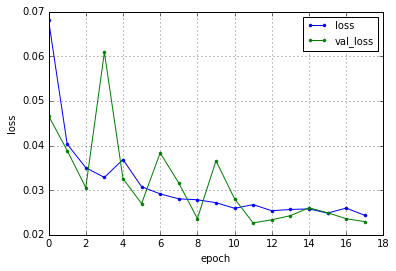

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.1231 - val_loss: 0.0702
Epoch 2/50
2s - loss: 0.0668 - val_loss: 0.0623
Epoch 3/50
2s - loss: 0.0613 - val_loss: 0.0564
Epoch 4/50
2s - loss: 0.0550 - val_loss: 0.0513
Epoch 5/50
2s - loss: 0.0533 - val_loss: 0.0532
Epoch 6/50
2s - loss: 0.0512 - val_loss: 0.0479
Epoch 7/50
2s - loss: 0.0489 - val_loss: 0.0526
Epoch 8/50
2s - loss: 0.0465 - val_loss: 0.0429
Epoch 9/50
2s - loss: 0.0468 - val_loss: 0.0453
Epoch 10/50
2s - loss: 0.0433 - val_loss: 0.0425
Epoch 11/50
2s - loss: 0.0437 - val_loss: 0.0432
Epoch 12/50
2s - loss: 0.0410 - val_loss: 0.0382
Epoch 13/50
2s - loss: 0.0392 - val_loss: 0.0371
Epoch 14/50
2s - loss: 0.0404 - val_loss: 0.0368
Epoch 15/50
2s - loss: 0.0377 - val_loss: 0.0362
Epoch 16/50
2s - loss: 0.0362 - val_loss: 0.0411
Epoch 17/50
2s - loss: 0.0359 - val_loss: 0.0345
Epoch 18/50
2s - loss: 0.0355 - val_loss: 0.0493
Epoch 19/50
2s - loss: 0.0371 - val_loss: 0.0389
Epoch 20/50


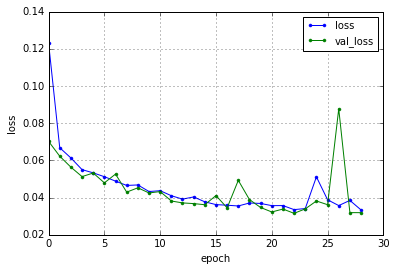

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0295 - val_loss: 0.0227
Epoch 2/50
2s - loss: 0.0200 - val_loss: 0.0182
Epoch 3/50
2s - loss: 0.0182 - val_loss: 0.0185
Epoch 4/50
2s - loss: 0.0173 - val_loss: 0.0165
Epoch 5/50
2s - loss: 0.0169 - val_loss: 0.0198
Epoch 6/50
2s - loss: 0.0161 - val_loss: 0.0156
Epoch 7/50
2s - loss: 0.0153 - val_loss: 0.0155
Epoch 8/50
2s - loss: 0.0162 - val_loss: 0.0322
Epoch 9/50
2s - loss: 0.0169 - val_loss: 0.0191
Epoch 10/50
2s - loss: 0.0157 - val_loss: 0.0151
Epoch 11/50
2s - loss: 0.0162 - val_loss: 0.0133
Epoch 12/50
2s - loss: 0.0155 - val_loss: 0.0181
Epoch 13/50
2s - loss: 0.0153 - val_loss: 0.0167
Epoch 14/50
2s - loss: 0.0157 - val_loss: 0.0151
Epoch 15/50
2s - loss: 0.0154 - val_loss: 0.0179
Epoch 16/50
2s - loss: 0.0156 - val_loss: 0.0156
Epoch 17/50
2s - loss: 0.0153 - val_loss: 0.0187


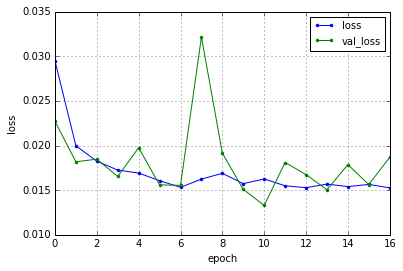

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0733 - val_loss: 0.0515
Epoch 2/50
2s - loss: 0.0476 - val_loss: 0.0500
Epoch 3/50
2s - loss: 0.0421 - val_loss: 0.0387
Epoch 4/50
2s - loss: 0.0389 - val_loss: 0.0416
Epoch 5/50
2s - loss: 0.0357 - val_loss: 0.0354
Epoch 6/50
2s - loss: 0.0341 - val_loss: 0.0384
Epoch 7/50
2s - loss: 0.0327 - val_loss: 0.0392
Epoch 8/50
2s - loss: 0.0315 - val_loss: 0.0293
Epoch 9/50
2s - loss: 0.0310 - val_loss: 0.0285
Epoch 10/50
2s - loss: 0.0294 - val_loss: 0.0326
Epoch 11/50
2s - loss: 0.0289 - val_loss: 0.0266
Epoch 12/50
2s - loss: 0.0284 - val_loss: 0.0634
Epoch 13/50
2s - loss: 0.0275 - val_loss: 0.0278
Epoch 14/50
2s - loss: 0.0269 - val_loss: 0.0276
Epoch 15/50
2s - loss: 0.0266 - val_loss: 0.0238
Epoch 16/50
2s - loss: 0.0260 - val_loss: 0.0237
Epoch 17/50
2s - loss: 0.0256 - val_loss: 0.0298
Epoch 18/50
2s - loss: 0.0251 - val_loss: 0.0229
Epoch 19/50
2s - loss: 0.0250 - val_loss: 0.0230
Epoch 20/50


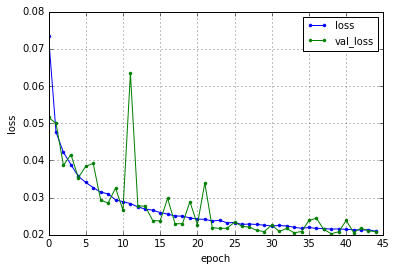

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.1108 - val_loss: 0.0820
Epoch 2/50
2s - loss: 0.0758 - val_loss: 0.0676
Epoch 3/50
2s - loss: 0.0657 - val_loss: 0.0610
Epoch 4/50
2s - loss: 0.0599 - val_loss: 0.0572
Epoch 5/50
2s - loss: 0.0564 - val_loss: 0.0573
Epoch 6/50
2s - loss: 0.0542 - val_loss: 0.0525
Epoch 7/50
2s - loss: 0.0524 - val_loss: 0.0508
Epoch 8/50
2s - loss: 0.0510 - val_loss: 0.0506
Epoch 9/50
2s - loss: 0.0499 - val_loss: 0.0501
Epoch 10/50
2s - loss: 0.0489 - val_loss: 0.0475
Epoch 11/50
2s - loss: 0.0483 - val_loss: 0.0477
Epoch 12/50
2s - loss: 0.0472 - val_loss: 0.0490
Epoch 13/50
2s - loss: 0.0462 - val_loss: 0.0477
Epoch 14/50
2s - loss: 0.0458 - val_loss: 0.0446
Epoch 15/50
2s - loss: 0.0450 - val_loss: 0.0456
Epoch 16/50
2s - loss: 0.0445 - val_loss: 0.0436
Epoch 17/50
2s - loss: 0.0440 - val_loss: 0.0446
Epoch 18/50
2s - loss: 0.0437 - val_loss: 0.0463
Epoch 19/50
2s - loss: 0.0432 - val_loss: 0.0426
Epoch 20/50


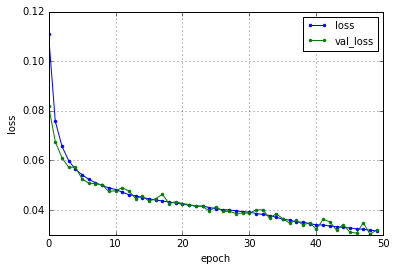

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0305 - val_loss: 0.0261
Epoch 2/50
2s - loss: 0.0222 - val_loss: 0.0220
Epoch 3/50
2s - loss: 0.0190 - val_loss: 0.0173
Epoch 4/50
2s - loss: 0.0169 - val_loss: 0.0183
Epoch 5/50
2s - loss: 0.0156 - val_loss: 0.0143
Epoch 6/50
2s - loss: 0.0149 - val_loss: 0.0134
Epoch 7/50
2s - loss: 0.0145 - val_loss: 0.0129
Epoch 8/50
2s - loss: 0.0137 - val_loss: 0.0127
Epoch 9/50
2s - loss: 0.0134 - val_loss: 0.0135
Epoch 10/50
2s - loss: 0.0131 - val_loss: 0.0125
Epoch 11/50
2s - loss: 0.0129 - val_loss: 0.0122
Epoch 12/50
2s - loss: 0.0127 - val_loss: 0.0117
Epoch 13/50
2s - loss: 0.0124 - val_loss: 0.0138
Epoch 14/50
2s - loss: 0.0123 - val_loss: 0.0114
Epoch 15/50
2s - loss: 0.0123 - val_loss: 0.0113
Epoch 16/50
2s - loss: 0.0120 - val_loss: 0.0152
Epoch 17/50
2s - loss: 0.0120 - val_loss: 0.0112
Epoch 18/50
2s - loss: 0.0118 - val_loss: 0.0116
Epoch 19/50
2s - loss: 0.0117 - val_loss: 0.0113
Epoch 20/50


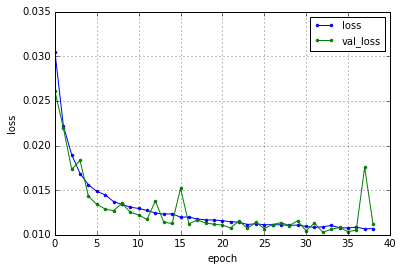

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0772 - val_loss: 0.0555
Epoch 2/50
2s - loss: 0.0575 - val_loss: 0.0459
Epoch 3/50
2s - loss: 0.0521 - val_loss: 0.0422
Epoch 4/50
2s - loss: 0.0506 - val_loss: 0.0410
Epoch 5/50
2s - loss: 0.0494 - val_loss: 0.0445
Epoch 6/50
2s - loss: 0.0489 - val_loss: 0.0440
Epoch 7/50
2s - loss: 0.0467 - val_loss: 0.0416
Epoch 8/50
2s - loss: 0.0451 - val_loss: 0.0458
Epoch 9/50
2s - loss: 0.0444 - val_loss: 0.0570
Epoch 10/50
2s - loss: 0.0437 - val_loss: 0.0374
Epoch 11/50
2s - loss: 0.0426 - val_loss: 0.0366
Epoch 12/50
2s - loss: 0.0420 - val_loss: 0.0371
Epoch 13/50
2s - loss: 0.0413 - val_loss: 0.0349
Epoch 14/50
2s - loss: 0.0412 - val_loss: 0.0363
Epoch 15/50
2s - loss: 0.0403 - val_loss: 0.0383
Epoch 16/50
2s - loss: 0.0392 - val_loss: 0.0578
Epoch 17/50
2s - loss: 0.0389 - val_loss: 0.0425
Epoch 18/50
2s - loss: 0.0386 - val_loss: 0.0358
Epoch 19/50
2s - loss: 0.0376 - val_loss: 0.0386


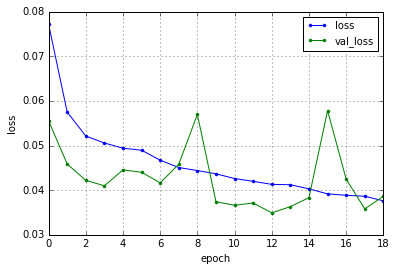

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.1305 - val_loss: 0.0851
Epoch 2/50
2s - loss: 0.0849 - val_loss: 0.0655
Epoch 3/50
2s - loss: 0.0709 - val_loss: 0.0959
Epoch 4/50
2s - loss: 0.0627 - val_loss: 0.0693
Epoch 5/50
2s - loss: 0.0586 - val_loss: 0.0523
Epoch 6/50
2s - loss: 0.0563 - val_loss: 0.0531
Epoch 7/50
2s - loss: 0.0552 - val_loss: 0.0519
Epoch 8/50
2s - loss: 0.0529 - val_loss: 0.0506
Epoch 9/50
2s - loss: 0.0523 - val_loss: 0.0531
Epoch 10/50
2s - loss: 0.0506 - val_loss: 0.0467
Epoch 11/50
2s - loss: 0.0501 - val_loss: 0.0785
Epoch 12/50
2s - loss: 0.0494 - val_loss: 0.0478
Epoch 13/50
2s - loss: 0.0489 - val_loss: 0.0509
Epoch 14/50
2s - loss: 0.0481 - val_loss: 0.0477
Epoch 15/50
2s - loss: 0.0476 - val_loss: 0.0533
Epoch 16/50
2s - loss: 0.0471 - val_loss: 0.0447
Epoch 17/50
2s - loss: 0.0467 - val_loss: 0.0459
Epoch 18/50
2s - loss: 0.0463 - val_loss: 0.0549
Epoch 19/50
2s - loss: 0.0459 - val_loss: 0.0440
Epoch 20/50


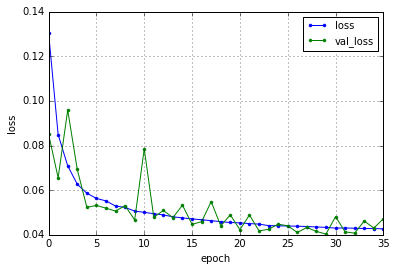

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0308 - val_loss: 0.0278
Epoch 2/50
2s - loss: 0.0244 - val_loss: 0.0316
Epoch 3/50
2s - loss: 0.0236 - val_loss: 0.0239
Epoch 4/50
2s - loss: 0.0234 - val_loss: 0.0245
Epoch 5/50
2s - loss: 0.0232 - val_loss: 0.0244
Epoch 6/50
2s - loss: 0.0233 - val_loss: 0.0203
Epoch 7/50
2s - loss: 0.0231 - val_loss: 0.0216
Epoch 8/50
2s - loss: 0.0231 - val_loss: 0.0225
Epoch 9/50
2s - loss: 0.0229 - val_loss: 0.0270
Epoch 10/50
2s - loss: 0.0229 - val_loss: 0.0221
Epoch 11/50
2s - loss: 0.0230 - val_loss: 0.0188
Epoch 12/50
2s - loss: 0.0229 - val_loss: 0.0245
Epoch 13/50
2s - loss: 0.0227 - val_loss: 0.0247
Epoch 14/50
2s - loss: 0.0227 - val_loss: 0.0183
Epoch 15/50
2s - loss: 0.0226 - val_loss: 0.0236
Epoch 16/50
2s - loss: 0.0226 - val_loss: 0.0236
Epoch 17/50
2s - loss: 0.0224 - val_loss: 0.0264
Epoch 18/50
2s - loss: 0.0223 - val_loss: 0.0214
Epoch 19/50
2s - loss: 0.0221 - val_loss: 0.0221
Epoch 20/50


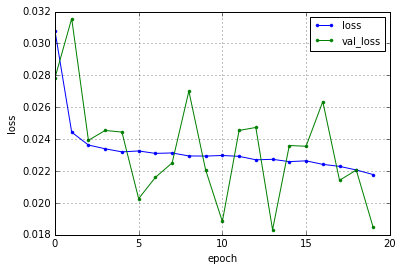

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0852 - val_loss: 0.0642
Epoch 2/50
2s - loss: 0.0621 - val_loss: 0.0701
Epoch 3/50
2s - loss: 0.0581 - val_loss: 0.0558
Epoch 4/50
2s - loss: 0.0553 - val_loss: 0.0511
Epoch 5/50
2s - loss: 0.0529 - val_loss: 0.0520
Epoch 6/50
2s - loss: 0.0510 - val_loss: 0.0521
Epoch 7/50
2s - loss: 0.0499 - val_loss: 0.0507
Epoch 8/50
2s - loss: 0.0455 - val_loss: 0.0491
Epoch 9/50
2s - loss: 0.0455 - val_loss: 0.0498
Epoch 10/50
2s - loss: 0.0448 - val_loss: 0.0506
Epoch 11/50
2s - loss: 0.0438 - val_loss: 0.0403
Epoch 12/50
2s - loss: 0.0416 - val_loss: 0.0472
Epoch 13/50
2s - loss: 0.0418 - val_loss: 0.0381
Epoch 14/50
2s - loss: 0.0426 - val_loss: 0.0511
Epoch 15/50
2s - loss: 0.0490 - val_loss: 0.0611
Epoch 16/50
2s - loss: 0.0413 - val_loss: 0.0374
Epoch 17/50
2s - loss: 0.0456 - val_loss: 0.0419
Epoch 18/50
2s - loss: 0.0446 - val_loss: 0.0414
Epoch 19/50
2s - loss: 0.0467 - val_loss: 0.0543
Epoch 20/50


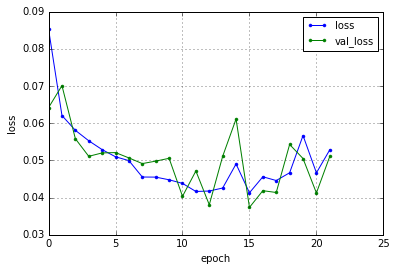

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.1325 - val_loss: 0.0911
Epoch 2/50
2s - loss: 0.0906 - val_loss: 0.0874
Epoch 3/50
2s - loss: 0.0830 - val_loss: 0.0807
Epoch 4/50
2s - loss: 0.0801 - val_loss: 0.0807
Epoch 5/50
2s - loss: 0.0766 - val_loss: 0.0744
Epoch 6/50
2s - loss: 0.0770 - val_loss: 0.0732
Epoch 7/50
2s - loss: 0.0738 - val_loss: 0.0724
Epoch 8/50
2s - loss: 0.0707 - val_loss: 0.0684
Epoch 9/50
2s - loss: 0.0692 - val_loss: 0.0650
Epoch 10/50
2s - loss: 0.0664 - val_loss: 0.0632
Epoch 11/50
2s - loss: 0.0673 - val_loss: 0.0656
Epoch 12/50
2s - loss: 0.0661 - val_loss: 0.0663
Epoch 13/50
2s - loss: 0.0655 - val_loss: 0.0631
Epoch 14/50
2s - loss: 0.0639 - val_loss: 0.0620
Epoch 15/50
2s - loss: 0.0635 - val_loss: 0.0613
Epoch 16/50
2s - loss: 0.0633 - val_loss: 0.0737
Epoch 17/50
2s - loss: 0.0639 - val_loss: 0.0609
Epoch 18/50
2s - loss: 0.0613 - val_loss: 0.0664
Epoch 19/50
2s - loss: 0.0595 - val_loss: 0.0573
Epoch 20/50


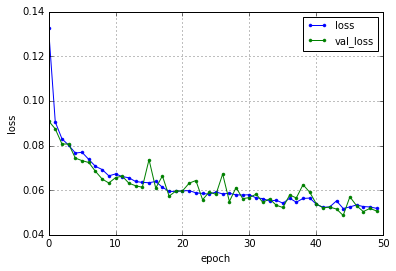

hiden node = 16
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
2s - loss: 0.0341 - val_loss: 0.0287
Epoch 2/50
2s - loss: 0.0302 - val_loss: 0.0301
Epoch 3/50
2s - loss: 0.0292 - val_loss: 0.0288
Epoch 4/50
2s - loss: 0.0293 - val_loss: 0.0288
Epoch 5/50
2s - loss: 0.0293 - val_loss: 0.0301
Epoch 6/50
2s - loss: 0.0289 - val_loss: 0.0295
Epoch 7/50
2s - loss: 0.0288 - val_loss: 0.0265
Epoch 8/50
2s - loss: 0.0285 - val_loss: 0.0299
Epoch 9/50
2s - loss: 0.0286 - val_loss: 0.0288
Epoch 10/50
2s - loss: 0.0278 - val_loss: 0.0278
Epoch 11/50
2s - loss: 0.0265 - val_loss: 0.0274
Epoch 12/50
2s - loss: 0.0258 - val_loss: 0.0240
Epoch 13/50
2s - loss: 0.0252 - val_loss: 0.0309
Epoch 14/50
2s - loss: 0.0241 - val_loss: 0.0227
Epoch 15/50
2s - loss: 0.0237 - val_loss: 0.0240
Epoch 16/50
2s - loss: 0.0224 - val_loss: 0.0200
Epoch 17/50
2s - loss: 0.0215 - val_loss: 0.0198
Epoch 18/50
2s - loss: 0.0218 - val_loss: 0.0261
Epoch 19/50
2s - loss: 0.0215 - val_loss: 0.0206
Epoch 20/50


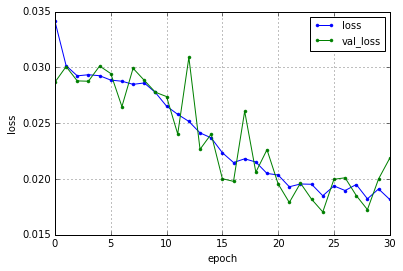

In [10]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    ArrayAxis = Axis.split(",")
    w=window.Window()
    for a in ArrayAxis:
        w.SetData(a,dic[a])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    print wind.shape
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

    # define SaveFileName
    for opt,optName in zip(optimizers,optimArray):
        for AxisName,WindowNum in zip(ArrayAxis,range(3)):
            print "hiden node = "+str(encoding_dim)
            CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName+'-'+AxisName
            SaveFileNameEncord=DataName+'_encoded'+CommonName
            SaveFileNameDecord=DataName+'_decoded'+CommonName
            SaveFileNameNet=DataName+'_net'+CommonName
            SaveFileNameTrain=DataName+'_train'+CommonName
            SaveFileNameTest=DataName+'_test'+CommonName
            SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

            window_test=wind[:,:,WindowNum]
            window_train=wind[:,:,WindowNum]
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
            shapeNum=wind.shape[1]


            # this is our input placeholder
            input_img = Input(shape=(shapeNum,))
            # "encoded" is the encoded representation of the input
            encoded = Dense(encoding_dim, activation='tanh',)(input_img)
            # "decoded" is the lossy reconstruction of the input
            decoded = Dense(shapeNum, activation='linear')(encoded)

            # this model maps an input to its reconstruction
            autoencoder = Model(input=input_img, output=decoded)

            # this model maps an input to its encoded representation
            encoder = Model(input=input_img, output=encoded)

            # create a placeholder for an encoded (32-dimensional) input
            encoded_input = Input(shape=(encoding_dim,))
            # retrieve the last layer of the autoencoder model
            decoder_layer = autoencoder.layers[-1]
            # create the decoder model
            decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

            #autoencoder.compile(optimizer='adam', loss='mse')
            autoencoder.compile(optimizer=opt(), loss='mse')
            plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

            early_stopping = EarlyStopping(monitor='val_loss', patience=5)
            hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
            time.sleep(0.1)
            encoded_imgs = encoder.predict(window_test)
            decoded_imgs = decoder.predict(encoded_imgs)

            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

            # save model and wights
            json_string = encoder.to_json()
            open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
            encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

            json_string = decoder.to_json()
            open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
            decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

            json_string = autoencoder.to_json()
            open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
            autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

            # plot loss
            loss = hist.history['loss']
            val_loss = hist.history['val_loss']

            nb_epoch = len(loss)
            plt.plot(range(nb_epoch), loss, marker='.', label='loss')
            plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
            plt.legend(loc='best', fontsize=10)
            plt.grid()
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.savefig(SaveFileNameGlaph)
            plt.show()

In [11]:
print window_test.shape

(15666, 4096)
